# Explainable Artificial Intelligence Bias Mitigation

# Summary of Contents
1. Releveant Packages & Functions
    - 1.1 [Importing Packages](#1.1-Importing-Packages)
    - 1.2 [Defining Functions](#1.2-Defining-Functions)
    
2. [Loading Datasets](#2.-Loading-Datasets)

3. Dataset Descriptions
    - 3.1 [Credit Card Default Dataset](#3.1-Credit-Card-Default-Dataset)
    - 3.2 [Diabetes Readmission Dataset](#3.2-Diabetes-Readmission-Dataset)
    
4. Exploratory Data Analysis (EDA)
    - 4.1 Credit Card Default EDA
        - 4.1.1  [CCD - Data Exploration](#4.1.1--CCD---Data-Exploration)
            - [CCD - Describing Target Variable](#CCD---Describing-Target-Variable)
        - 4.1.2 [CCD - Data Preprocessing](#4.1.2-CCD---Data-Preprocessing)
            - [CCD - Relabelling Columns](#CCD---Relabelling-Columns)
            - [CCD - Checking for Missing Data](#CCD---Checking-for-Missing-Data)
        - 4.1.3 [CCD - Data Visualisation](#4.1.3-CCD---Data-Visualisation)
    - 4.2 Diabetes Readmission EDA
        - 4.2.1 [DR - Data Exploration](#4.2.1--DR---Data-Exploration)
            - [DR - Describing Target Variable](#DR---Describing-Target-Variable)
        - 4.2.2 [DR - Data Preprocessing](#4.2.2-DR---Data-Preprocessing)
            - [DR - Dropping Irrelevant Columns](#DR---Dropping-Irrelevant-Columns)
            - [DR - Checking for Missing Data](#DR---Checking-for-Missing-Data)
        - 4.2.3 [DR - Data Visualisation](#4.2.3-DR---Data-Visualisation)
        
5. Feature Engineering (FE)
    - 5.1 [Credit Card Default FE](#5.1-Credit-Card-Default-FE)
        - [SE_MA](#SE_MA)
        - [AgeBin](#AgeBin)
        - [Avg_exp_N](#Avg_exp_N)
    - 5.2 [Diabetes Readmission FE](#5.2-Diabetes-Readmission-FE)
        - [Diagnostics 1-2-3 Transform](#Diagnostics-1-2-3-Transform)
        
6. Modelling Preparation
     - 6.1 [Train-Test Splitting](#6.1-Train-Test-Splitting)
         - 6.1.1 [CCD Train-Test Splitting](#6.1.1-CCD-Train-Test-Splitting)
         - 6.1.2 [DR Train-Test Splitting](#6.1.2-DR-Train-Test-Splitting)
             - [Encoding](#Encoding)
             - [Race and Gender Transform](#Race-and-Gender-Transform)
             - [Undersampling the Majority Class](#Undersampling-the-majority-class)

7. Model Selection
    - 7.1 [Random Forest Classifier (RF)](#7.1-Random-Forest-Classifier-(RF))
        - 7.1.1 [Credit Card Default - RF](#7.1.1-Credit-Card-Default---RF)
            - [CCD - RF Blind Run](#CCD---RF-Blind-Run)
            - [CCD - RF RandomizedSearchCV](#CCD---RF-RandomizedSearchCV)
            - [CCD - RF GridSearchCV](#CCD---RF-GridSearchCV)
        - 7.1.2 [Diabetes Readmission - RF](#7.1.2-Diabetes-Readmission---RF)
            - [DR - RF Blind Run](#DR---RF-Blind-Run)
            - [DR - RF RandomizedSearchCV](#DR---RF-RandomisedSearchCV)
            - [DR - RF GridSearchCV](#DR---RF-GridSearchCV)
    - 7.2 [LightGBM Classifier (LGBM)](#7.2-LightGBM-Classifier-(LGBM))
        - 7.2.1 [Credit Card Default - LGBM](#7.2.1-Credit-Card-Default---LGBM)
            - [CCD - LGBM Blind Run](#CCD---LGBM-Blind-Run)
            - [CCD - LGBM RandomizedSearchCV](#CCD---LGBM-RandomizedSearchCV)
            - [CCD - LGBM GridSearchCV](#CCD---LGBM-GridSearchCV)
        - 7.2.2 [Diabetes Readmission - LGBM](#7.2.2-Diabetes-Readmission---LGBM)
            - [DR - LGBM Blind Run](#DR---LGBM-Blind-Run)
            - [DR - LGBM RandomizedSearchCV](#DR---LGBM-RandomizedSearchCV)
            - [DR - LGBM GridSearchCV](#DR---LGBM-GridSearchCV)

8. Final Model & Explainability (FM)
    - 8.1 [Credit Card Default FM](#8.1-Credit-Card-Default-FM)
        - 8.1.1 [CCD Random Forest Final Model](#8.1.1-CCD-Random-Forest-Final-Model)
            - [Feature Importance & Mutual Info](#Feature-Importance-&-Mutual-Info---CCD-RF)
            - [Performance across Label](#Performance-across-Label---CCD-RF)
            - [FariML](#FairML---CCD-RF)
            - [LIME](#LIME---CCD-RF)
            
        - 8.1.2 [CCD LGBM Final Model](#8.1.2-CCD-LGBM-Final-Model)
            - [Feature Importance & Mutual Info](#Feature-Importance-&-Mutual-Info---CCD-LGB)
            - [Performance across Label](#Performance-across-Label---CCD-LGB)
            - [FariML](#FairML---CCD-LGB)
            - [LIME](#LIME---CCD-LGB)
        
    - 8.2 [Diabetes Readmission FM](#8.2-Diabetes-Readmission-FM)
        - 8.2.1 [DR Random Forest Final Model](#8.2.1-DR-Random-Forest-Final-Model)
            - [Feature Importance & Mutual Info](#Feature-Importance-&-Mutual-Info---DR-RF)
            - [Performance across Label](#Performance-across-Label---DR-RF)
            - [FariML](#FairML---DR-RF)
            - [LIME](#LIME---DR-RF)
        
        - 8.2.2 [DR LGBM Final Model](#8.2.2-DR-LGBM-Final-Model)
            - [Feature Importance & Mutual Info](#Feature-Importance-&-Mutual-Info---DR-LGB)
            - [Performance across Label](#Performance-across-Label---DR-LGB)
            - [FariML](#FairML---DR-LGB)
            - [LIME](#LIME---DR-LGB)

## 1. Relevant Packages & Functions

### 1.1 Importing Packages

[Summary of Contents](#Summary-of-Contents)

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
import re
import mock

# Visualisations
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
plt.rcParams["figure.figsize"] = (12,6)

# Data Processing
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.neighbors import LocalOutlierFactor
from category_encoders import BinaryEncoder

# Algorithms
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb

# Scoring
import sklearn.metrics as metrics
from sklearn.metrics import recall_score, roc_auc_score, accuracy_score, precision_score, recall_score,f1_score, confusion_matrix, classification_report, precision_recall_curve
from sklearn.feature_selection import mutual_info_classif

# Fairness Metric
from lightgbm import plot_importance
from fairml import audit_model
from fairml import plot_dependencies
from lime import lime_tabular
import shap

# Warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore')
warnings.warn('invalid value encountered in double_scalars')

### 1.2 Defining Functions
[Summary of Contents](#Summary-of-Contents)

In [2]:
# Summarising Missing Values
def Missing_Values(data):
    variable_name = []
    total_value = []
    total_missing_value = []
    missing_value_rate = []
    unique_value_list = []
    total_unique_value = []
    data_type = []
    
    for col in data.columns:
        variable_name.append(col)
        data_type.append(data[col].dtype)
        total_value.append(data[col].shape[0])
        total_missing_value.append(data[col].isnull().sum())
        missing_value_rate.append(round(data[col].isnull().sum()/data[col].shape[0],4))
        unique_value_list.append(data[col].unique())
        total_unique_value.append(len(data[col].unique()))
        
    missing_data=pd.DataFrame({"Variable":variable_name,\
                               "#_Total_Value":total_value,\
                               "#_Total_Missing_Value":total_missing_value,\
                               "%_Missing_Value_Rate":missing_value_rate,\
                               "Data_Type":data_type,"Unique_Value":unique_value_list,\
                               "Total_Unique_Value":total_unique_value
                              })
    
    missing_data = missing_data.set_index("Variable")
    return missing_data.sort_values("#_Total_Missing_Value",ascending=False)

# Summary Tables
def corr_2_cols(df, Col1, Col2):
    res = df.groupby([Col1, Col2]).size().unstack()
    res['perc'] = (res[res.columns[1]] / (res[res.columns[0]] + res[res.columns[1]]))
    return res

In [3]:
# Drawing Histograms
def draw_histograms(df, variables, n_rows, n_cols, n_bins):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=n_bins,ax=ax)
        ax.set_title(var_name)
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()
    
# Outlier Visualisation (BoxPlot)    
def boxplot_for_outlier(df,columns):
    count = 0
    fig, ax =plt.subplots(nrows=2,ncols=4, figsize=(16,8))
    for i in range(2):
        for j in range(4):
            sns.boxplot(x = df[columns[count]], palette="Wistia",ax=ax[i][j])
            count = count+1

In [4]:
# Summarising Performance
def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def print_report(y_actual, y_pred, thresh):
    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    fscore = f1_score(y_actual,(y_pred > thresh) )
    specificity = calc_specificity(y_actual, y_pred, thresh)
    print('AUC: %.3f'%auc)
    print('Accuracy: %.3f'%accuracy)
    print('Recall: %.3f'%recall)
    print('Precision: %.3f'%precision)
    print('F1-score: %.3f'%fscore)
    print('Specificity: %.3f'%specificity)
    print(' ')
    return auc, accuracy, recall, precision,fscore, specificity

threshold = 0.5

In [5]:
# Score Plotting
# Score Plotting
def plot_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)

## 2. Loading Datasets
[Summary of Contents](#Summary-of-Contents)

In [6]:
df_credit = pd.read_csv("./data/UCI_Credit_Card.csv")
df_diab = pd.read_csv("./data/diabetes/diabetic_data.csv")

## 3. Dataset Descriptions
### 3.1 Credit Card Default Dataset
[Summary of Contents](#Summary-of-Contents)

In [7]:
print("Shape of Credit Card Default dataset;\n",df_credit.shape)

df_credit.head()

Shape of Credit Card Default dataset;
 (30000, 25)


ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0       0.0                           1  
1    1000.0       0.0    2000.0                           1  
2    1000.0    1000.0    5000.0                           0  
3    1100.0    1069.0    1000.0                           0  
4    9000.0     689.0     679.0                           0  

[5 rows x 25 columns]

In [8]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

### 3.2 Diabetes Readmission Dataset
[Summary of Contents](#Summary-of-Contents)

In [9]:
print("Shape of Diabetes Readmission dataset;\n",df_diab.shape)

df_diab.head()

Shape of Diabetes Readmission dataset;
 (101766, 50)


encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  ...          No      No                   No   
1                 3  ...          No      Up                   No   
2                 2  ...          No      No                   No   
3                 2  ...          No      Up                   No   
4                 1  ...          No  Steady                   No   

   glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  \
0                   No                        No                       No   
1                   No                        No                       No   
2                   No                        No                       No   
3                   No                        No                       No   
4                   No                        No                       No   

   metformin-pioglitazone  change diabetesMed readmitted  
0                      No      No          No         NO  
1                      No      Ch         Yes        >30  
2                      No      No         Yes         NO  
3                      No      Ch         Yes         NO  
4                      No      Ch         Yes         NO  

[5 rows x 50 columns]

In [10]:
df_diab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

## 4. Exploratory Data Analysis (EDA)

### 4.1 Credit Card Default EDA
### 4.1.1  CCD - Data Exploration
[Summary of Contents](#Summary-of-Contents)

In [11]:
print("Description of dataset;")
df_credit.describe().T

Description of dataset;


count           mean            std       min  \
ID                          30000.0   15000.500000    8660.398374       1.0   
LIMIT_BAL                   30000.0  167484.322667  129747.661567   10000.0   
SEX                         30000.0       1.603733       0.489129       1.0   
EDUCATION                   30000.0       1.853133       0.790349       0.0   
MARRIAGE                    30000.0       1.551867       0.521970       0.0   
AGE                         30000.0      35.485500       9.217904      21.0   
PAY_0                       30000.0      -0.016700       1.123802      -2.0   
PAY_2                       30000.0      -0.133767       1.197186      -2.0   
PAY_3                       30000.0      -0.166200       1.196868      -2.0   
PAY_4                       30000.0      -0.220667       1.169139      -2.0   
PAY_5                       30000.0      -0.266200       1.133187      -2.0   
PAY_6                       30000.0      -0.291100       1.149988      -2.0   
BILL_AMT1                   30000.0   51223.330900   73635.860576 -165580.0   
BILL_AMT2                   30000.0   49179.075167   71173.768783  -69777.0   
BILL_AMT3                   30000.0   47013.154800   69349.387427 -157264.0   
BILL_AMT4                   30000.0   43262.948967   64332.856134 -170000.0   
BILL_AMT5                   30000.0   40311.400967   60797.155770  -81334.0   
BILL_AMT6                   30000.0   38871.760400   59554.107537 -339603.0   
PAY_AMT1                    30000.0    5663.580500   16563.280354       0.0   
PAY_AMT2                    30000.0    5921.163500   23040.870402       0.0   
PAY_AMT3                    30000.0    5225.681500   17606.961470       0.0   
PAY_AMT4                    30000.0    4826.076867   15666.159744       0.0   
PAY_AMT5                    30000.0    4799.387633   15278.305679       0.0   
PAY_AMT6                    30000.0    5215.502567   17777.465775       0.0   
default.payment.next.month  30000.0       0.221200       0.415062       0.0   

                                 25%       50%        75%        max  
ID                           7500.75   15000.5   22500.25    30000.0  
LIMIT_BAL                   50000.00  140000.0  240000.00  1000000.0  
SEX                             1.00       2.0       2.00        2.0  
EDUCATION                       1.00       2.0       2.00        6.0  
MARRIAGE                        1.00       2.0       2.00        3.0  
AGE                            28.00      34.0      41.00       79.0  
PAY_0                          -1.00       0.0       0.00        8.0  
PAY_2                          -1.00       0.0       0.00        8.0  
PAY_3                          -1.00       0.0       0.00        8.0  
PAY_4                          -1.00       0.0       0.00        8.0  
PAY_5                          -1.00       0.0       0.00        8.0  
PAY_6                          -1.00       0.0       0.00        8.0  
BILL_AMT1                    3558.75   22381.5   67091.00   964511.0  
BILL_AMT2                    2984.75   21200.0   64006.25   983931.0  
BILL_AMT3                    2666.25   20088.5   60164.75  1664089.0  
BILL_AMT4                    2326.75   19052.0   54506.00   891586.0  
BILL_AMT5                    1763.00   18104.5   50190.50   927171.0  
BILL_AMT6                    1256.00   17071.0   49198.25   961664.0  
PAY_AMT1                     1000.00    2100.0    5006.00   873552.0  
PAY_AMT2                      833.00    2009.0    5000.00  1684259.0  
PAY_AMT3                      390.00    1800.0    4505.00   896040.0  
PAY_AMT4                      296.00    1500.0    4013.25   621000.0  
PAY_AMT5                      252.50    1500.0    4031.50   426529.0  
PAY_AMT6                      117.75    1500.0    4000.00   528666.0  
default.payment.next.month      0.00       0.0       0.00        1.0

In [12]:
# Relabelling default.payment.next.month to def_pay
df_credit = df_credit.rename(columns={'default.payment.next.month' : 'def_pay'})

### CCD - Describing Target Variable
[Summary of Contents](#Summary-of-Contents)

In [13]:
# Describing Target Variables
perc = (df_credit.def_pay.sum()/len(df_credit.def_pay)*100)
print("The probability of default is {:.2f}%".format(perc))

The probability of default is 22.12%


In [14]:
# Describing Target (Readmitted) Variable
fig, ax =plt.subplots(nrows=1,ncols=2, figsize=(12,5))
labels=['0','1']
sns.countplot(x=df_credit.def_pay, data=df_credit, palette="pastel",ax=ax[0], edgecolor=".3")
df_credit.def_pay.value_counts().plot.pie(autopct="%1.2f%%", ax=ax[1], colors=['#66a3ff','#facc99'], 
                                        labels=labels, explode = [0,0.05], startangle=120,
                                        textprops={'fontsize': 12, 'color':'#0a0a00'})
plt.show()

In [15]:
df_credit.SEX.value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [16]:
df_credit.MARRIAGE.value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

Attribute: MARRIAGE
* Label 0 is undocumented

In [17]:
df_credit.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

Attribute: EDUCATION
Label 0 is undocumented and 5 & 6 are unlablled.

In [18]:
late = df_credit[['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
draw_histograms(late, late.columns, 2, 3, 10)

All categories have the label '-2'. As they document the numbers of months of delayed payment, a payment paid duly should be labelled as '0' - as would every negative value.

The PAY_n columns describing whether the amounts were paid duly (or not) will have the negative values adjusted to 0 to reflect that there wasn't a late payment.

### 4.1.2 CCD - Data Preprocessing

### CCD - Relabelling Columns
[Summary of Contents](#Summary-of-Contents)

In [19]:
df_credit = df_credit.rename(columns={'PAY_0' : 'PAY_1'})
df_credit.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  def_pay  
0       0.0       0.0       0.0        1  
1    1000.0       0.0    2000.0        1  
2    1000.0    1000.0    5000.0        0  
3    1100.0    1069.0    1000.0        0  
4    9000.0     689.0     679.0        0  

[5 rows x 25 columns]

#### Attribute: MARRIAGE
- Addressing the label: 0

In [20]:
df_credit.loc[df_credit.MARRIAGE == 0, 'MARRIAGE'] = 3
df_credit.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

#### Attribute: EDUCATION
- Addressing unlabelled entries

In [21]:
fil = (df_credit.EDUCATION == 5) | (df_credit.EDUCATION == 6) | (df_credit.EDUCATION == 0)
df_credit.loc[fil, 'EDUCATION'] = 4
df_credit.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

#### Attribute: PAY_n
- As these attributes document the numbers of months of delayed payment, a payment paid duly should be labelled as '0' - as would every negative value.
- The PAY_n columns describing whether the amounts were paid duly (or not) will have the negative values adjusted to 0 to reflect that there wasn't a late payment.

In [22]:
fil = (df_credit.PAY_1 == -2) | (df_credit.PAY_1 == -1) | (df_credit.PAY_1 == 0)
df_credit.loc[fil, 'PAY_1'] = 0
fil = (df_credit.PAY_2 == -2) | (df_credit.PAY_2 == -1) | (df_credit.PAY_2 == 0)
df_credit.loc[fil, 'PAY_2'] = 0
fil = (df_credit.PAY_3 == -2) | (df_credit.PAY_3 == -1) | (df_credit.PAY_3 == 0)
df_credit.loc[fil, 'PAY_3'] = 0
fil = (df_credit.PAY_4 == -2) | (df_credit.PAY_4 == -1) | (df_credit.PAY_4 == 0)
df_credit.loc[fil, 'PAY_4'] = 0
fil = (df_credit.PAY_5 == -2) | (df_credit.PAY_5 == -1) | (df_credit.PAY_5 == 0)
df_credit.loc[fil, 'PAY_5'] = 0
fil = (df_credit.PAY_6 == -2) | (df_credit.PAY_6 == -1) | (df_credit.PAY_6 == 0)
df_credit.loc[fil, 'PAY_6'] = 0
late = df_credit[['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
draw_histograms(late, late.columns, 2, 3, 10)

### CCD - Checking for Missing Data
[Summary of Contents](#Summary-of-Contents)

In [23]:
credit_missing = Missing_Values(df_credit)
credit_missing

#_Total_Value  #_Total_Missing_Value  %_Missing_Value_Rate  \
Variable                                                                
ID                 30000                      0                   0.0   
BILL_AMT2          30000                      0                   0.0   
PAY_AMT6           30000                      0                   0.0   
PAY_AMT5           30000                      0                   0.0   
PAY_AMT4           30000                      0                   0.0   
PAY_AMT3           30000                      0                   0.0   
PAY_AMT2           30000                      0                   0.0   
PAY_AMT1           30000                      0                   0.0   
BILL_AMT6          30000                      0                   0.0   
BILL_AMT5          30000                      0                   0.0   
BILL_AMT4          30000                      0                   0.0   
BILL_AMT3          30000                      0                   0.0   
BILL_AMT1          30000                      0                   0.0   
LIMIT_BAL          30000                      0                   0.0   
PAY_6              30000                      0                   0.0   
PAY_5              30000                      0                   0.0   
PAY_4              30000                      0                   0.0   
PAY_3              30000                      0                   0.0   
PAY_2              30000                      0                   0.0   
PAY_1              30000                      0                   0.0   
AGE                30000                      0                   0.0   
MARRIAGE           30000                      0                   0.0   
EDUCATION          30000                      0                   0.0   
SEX                30000                      0                   0.0   
def_pay            30000                      0                   0.0   

          Data_Type                                       Unique_Value  \
Variable                                                                 
ID            int64  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   
BILL_AMT2   float64  [3102.0, 1725.0, 14027.0, 48233.0, 5670.0, 570...   
PAY_AMT6    float64  [0.0, 2000.0, 5000.0, 1000.0, 679.0, 800.0, 13...   
PAY_AMT5    float64  [0.0, 1000.0, 1069.0, 689.0, 13750.0, 1687.0, ...   
PAY_AMT4    float64  [0.0, 1000.0, 1100.0, 9000.0, 20239.0, 581.0, ...   
PAY_AMT3    float64  [0.0, 1000.0, 1200.0, 10000.0, 657.0, 38000.0,...   
PAY_AMT2    float64  [689.0, 1000.0, 1500.0, 2019.0, 36681.0, 1815....   
PAY_AMT1    float64  [0.0, 1518.0, 2000.0, 2500.0, 55000.0, 380.0, ...   
BILL_AMT6   float64  [0.0, 3261.0, 15549.0, 29547.0, 19131.0, 20024...   
BILL_AMT5   float64  [0.0, 3455.0, 14948.0, 28959.0, 19146.0, 19619...   
BILL_AMT4   float64  [0.0, 3272.0, 14331.0, 28314.0, 20940.0, 19394...   
BILL_AMT3   float64  [689.0, 2682.0, 13559.0, 49291.0, 35835.0, 576...   
BILL_AMT1   float64  [3913.0, 2682.0, 29239.0, 46990.0, 8617.0, 644...   
LIMIT_BAL   float64  [20000.0, 120000.0, 90000.0, 50000.0, 500000.0...   
PAY_6         int64                           [0, 2, 3, 6, 4, 7, 8, 5]   
PAY_5         int64                           [0, 2, 3, 5, 4, 7, 8, 6]   
PAY_4         int64                        [0, 2, 3, 4, 5, 7, 6, 1, 8]   
PAY_3         int64                        [0, 2, 3, 4, 6, 7, 1, 5, 8]   
PAY_2         int64                        [2, 0, 3, 5, 7, 4, 1, 6, 8]   
PAY_1         int64                        [2, 0, 1, 3, 4, 8, 7, 5, 6]   
AGE           int64  [24, 26, 34, 37, 57, 29, 23, 28, 35, 51, 41, 3...   
MARRIAGE      int64                                          [1, 2, 3]   
EDUCATION     int64                                       [2, 1, 3, 4]   
SEX           int64                                             [2, 1]   
def_pay       int64                                             [1, 0]   

           Total_Unique_Value  
Variable

There are no missing values.

### 4.1.3 CCD - Data Visualisation

[Summary of Contents](#Summary-of-Contents)

Exploring numerical variables and using histograms to explore their respective distributions (to detect any possible outliers)

<AxesSubplot:>

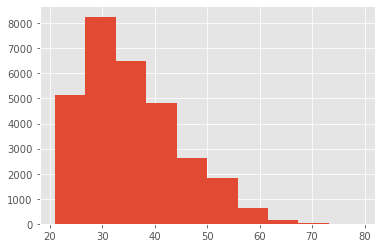

In [25]:
%matplotlib inline
df_credit.AGE.hist()

<AxesSubplot:>

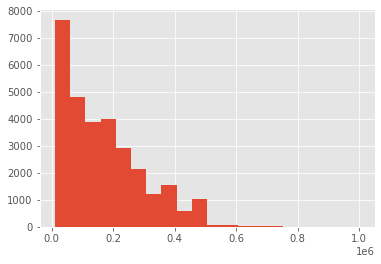

In [26]:
df_credit.LIMIT_BAL.hist(bins = 20)

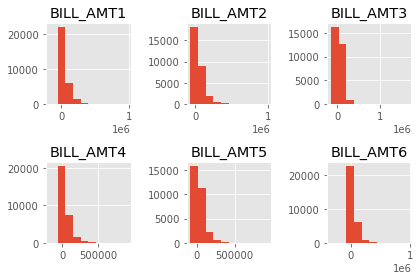

In [27]:
bills = df_credit[['BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]
draw_histograms(bills, bills.columns, 2, 3, 10)

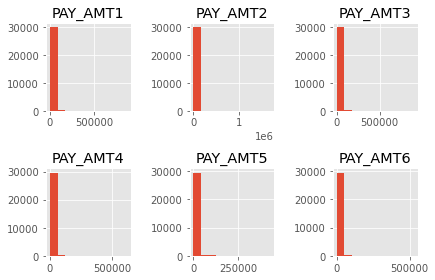

In [28]:
pay = df_credit[['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
draw_histograms(pay, pay.columns, 2, 3, 10)

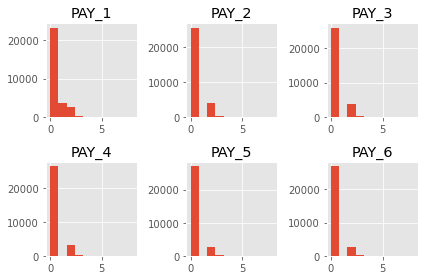

In [29]:
late = df_credit[['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
draw_histograms(late, late.columns, 2, 3, 10)

#### GENDER & TARGET VARIABLE

In [30]:
gender = df_credit.groupby(['SEX', 'def_pay']).size().unstack()
gender['perc'] = (gender[1]/(gender[0]+gender[1]))
gender

def_pay      0     1      perc
SEX                           
1         9015  2873  0.241672
2        14349  3763  0.207763

<AxesSubplot:xlabel='SEX'>

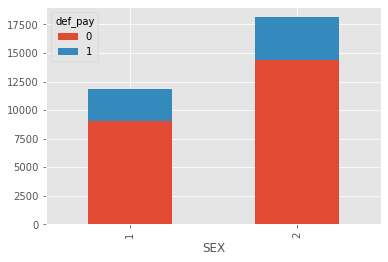

In [31]:
gender[[0,1]].plot(kind = 'bar', stacked=True)

Considering that roughly 22% of the customers will default:
- there are significantly more women than men
- men are most likely to default the next month (4% more likely)

#### EDUCATION & TARGET VARIABLE

In [32]:
corr_2_cols(df_credit, 'EDUCATION', 'def_pay')

def_pay        0     1      perc
EDUCATION                       
1           8549  2036  0.192348
2          10700  3330  0.237349
3           3680  1237  0.251576
4            435    33  0.070513

The higher is the education, the lower the probability of defaulting the next month but the only exception is for the category labelled 'Other'. According to the documentation, this would be lower than high school but numerically might not have much weight in the final result.

#### MARRIAGE & TARGET VARIABLE

In [33]:
corr_2_cols(df_credit, 'MARRIAGE', 'def_pay')

def_pay       0     1      perc
MARRIAGE                       
1         10453  3206  0.234717
2         12623  3341  0.209283
3           288    89  0.236074

Note married people and those categorised as 'Other' are most likely to default.

Overall, gender, marital status or education can determine the balance of a person's credit card and would be something to explore.

#### MARRIAGE & GENDER

In [34]:
corr_2_cols(df_credit, 'MARRIAGE', 'SEX')

SEX          1     2      perc
MARRIAGE                      
1         5190  8469  0.620031
2         6553  9411  0.589514
3          145   232  0.615385

#### EDUCATION & GENDER

In [35]:
corr_2_cols(df_credit, 'EDUCATION', 'SEX')

SEX           1     2      perc
EDUCATION                      
1          4354  6231  0.588663
2          5374  8656  0.616964
3          1990  2927  0.595282
4           170   298  0.636752

#### Exploring Payment & Bills

In [36]:
df_credit[['PAY_AMT6', 'BILL_AMT6', 'PAY_AMT5', 
     'BILL_AMT5', 'PAY_AMT4', 'BILL_AMT4', 'PAY_AMT3', 'BILL_AMT3', 
     'PAY_AMT2', 'BILL_AMT2',
     'PAY_AMT1', 'BILL_AMT1',
     'LIMIT_BAL', 'def_pay']].sample(30)

PAY_AMT6  BILL_AMT6  PAY_AMT5  BILL_AMT5  PAY_AMT4  BILL_AMT4  \
22656   13000.0   340791.0   13000.0   333278.0   13000.0   327193.0   
15447     860.0    19015.0     700.0    18615.0     700.0    18521.0   
16746       0.0      -42.0       0.0    14958.0   14958.0    15000.0   
29198    2599.0     8148.0    1148.0     7504.0    1504.0     6877.0   
14794    3000.0    56064.0    3000.0    53970.0    2000.0    52978.0   
5640      497.0     2400.0    2407.0    17628.0   17680.0    34833.0   
2926     2000.0    28130.0     500.0    28241.0    1000.0    27834.0   
13668    3500.0    97320.0    5000.0    96056.0    3500.0    94423.0   
25035     197.0     9638.0     193.0     9973.0     199.0     9774.0   
8780     2500.0    60317.0    2500.0    58957.0    2300.0    57584.0   
19965    2000.0    12847.0    2000.0    28115.0    2000.0    46629.0   
7587        0.0        0.0       0.0        0.0       0.0        0.0   
27302       0.0   294926.0   20000.0   324049.0   15010.0   316654.0   
23442       0.0        0.0       0.0        0.0       0.0    99000.0   
15652    5000.0   212027.0    7000.0   209747.0    7000.0   277300.0   
7780     2000.0    30379.0    2000.0    30053.0    2000.0    28526.0   
23617    1600.0    19155.0       0.0    19604.0    1600.0    18608.0   
877         0.0     9530.0    9530.0     3158.0    3158.0     3058.0   
14677    1100.0    20662.0    1100.0    20276.0     800.0    20325.0   
15584    1988.0     2532.0    2544.0     2685.0    2698.0    13459.0   
10095       0.0     1000.0       0.0     1150.0    1150.0      150.0   
6585    53528.0        0.0       0.0    25000.0    2000.0    23000.0   
16874   10006.0   121343.0    5002.0   121292.0      16.0   129675.0   
18992     378.0      378.0     378.0      378.0     378.0      378.0   
9235     1000.0    28779.0       0.0    29642.0    3000.0    27480.0   
4690     3000.0    23859.0     446.0    23952.0    3566.0    20724.0   
10584     264.0     9292.0     355.0     9483.0     500.0     9515.0   
13764    1500.0    15549.0    1500.0    14447.0    1500.0    13319.0   
23851       0.0    35722.0   35722.0      123.0     490.0      446.0   
26012    1200.0    12531.0       0.0    12880.0    1100.0    11979.0   

       PAY_AMT3  BILL_AMT3  PAY_AMT2  BILL_AMT2  PAY_AMT1  BILL_AMT1  \
22656   12000.0   322032.0   14000.0   314607.0   12000.0   309250.0   
15447       0.0    19121.0    1700.0    18004.0    3100.0    15481.0   
16746   15000.0    20027.0    1104.0    39451.0    9024.0    48252.0   
29198    1877.0     5117.0    2117.0     3844.0    1844.0     3179.0   
14794    7000.0    46815.0    3000.0    44565.0    5000.0    40559.0   
5640    14492.0    41616.0   21067.0    21544.0    1995.0    24708.0   
2926     1200.0    27385.0    2217.0    25891.0    2274.0    24014.0   
13668    3400.0    98052.0    3500.0    99908.0    4600.0    99660.0   
25035    1000.0     9273.0    1235.0     8595.0    1293.0     7700.0   
8780     2100.0    56424.0    2100.0    55851.0    3000.0    53718.0   
19965    2005.0    55382.0    5010.0    68207.0    5168.0    73953.0   
7587        0.0        0.0       0.0      984.0     984.0       78.0   
27302   20000.0   373137.0   25025.0   408982.0   30000.0   400780.0   
23442    2000.0   100138.0    5100.0    97503.0    4366.0    94713.0   
15652    8000.0   275748.0   12000.0   272517.0   10000.0   268498.0   
7780     2000.0    27484.0    2000.0    36105.0    4016.0    45738.0   
23617       0.0    19212.0    2000.0    17802.0    3000.0    15379.0   
877      3058.0      980.0    1078.0     5174.0    5174.0     5924.0   
14677     850.0    20475.0    3990.0   101878.0    2530.0    48688.0   
15584   13526.0     3116.0    3131.0     5438.0    5457.0     4040.0   
10095       0.0    10064.0     199.0    10181.0    2316.0     8009.0   
6585        0.0    90684.0     560.0   101755.0   14002.0    89296.0   
16874    9463.0   124901.0    4706.0   124944.0    8506.0   119965.0   
18992     378.0      569.0     569.0      376.

In [37]:
df_credit[df_credit.def_pay == 1][['BILL_AMT2',
     'PAY_AMT1', 'BILL_AMT1', 'PAY_1',
     'LIMIT_BAL']].sample(30)

BILL_AMT2  PAY_AMT1  BILL_AMT1  PAY_1  LIMIT_BAL
17473      189.0       0.0     4474.0      1    10000.0
17583     2184.0    2184.0     8046.0      0   260000.0
11368        0.0       0.0     1344.0      0   180000.0
12761    37891.0    1150.0    50000.0      0    50000.0
5218     19075.0    1600.0    18075.0      2    20000.0
16226    64484.0    2500.0    63619.0      2    80000.0
8713     18528.0    4300.0    14484.0      0    50000.0
7616     50184.0    3000.0    55028.0      2    50000.0
21458   123333.0    4500.0   120844.0      2   130000.0
10944        0.0       0.0     2500.0      2   500000.0
26773    58394.0    3000.0    61143.0      2    50000.0
28115   111306.0       0.0   114614.0      2   110000.0
22401   137327.0    3500.0   137564.0      2   150000.0
28514    25571.0    1800.0    24482.0      0    30000.0
9346      8275.0    1350.0     7199.0      0    10000.0
2895    198272.0       0.0   203393.0      1   200000.0
9457      8040.0    8040.0     2461.0      2   190000.0
28655    38491.0    1063.0    48592.0      0    50000.0
5645       390.0     390.0      390.0      0    60000.0
20010   214479.0   17580.0   201223.0      0   210000.0
25543        0.0       0.0        0.0      1   330000.0
187     202947.0    8214.0   199436.0      2   200000.0
4390      9756.0    1800.0     8660.0      0    10000.0
22740    -2650.0       0.0    -2650.0      0   190000.0
4801    237094.0       0.0   254951.0      6   190000.0
12067    19323.0    2000.0    17614.0      0    20000.0
9706     45983.0    4000.0    42674.0      2   100000.0
3785     79283.0       0.0    81071.0      7    80000.0
13399        0.0       0.0        0.0      1    80000.0
16209    17384.0    1289.0    16371.0      2    20000.0

Exploring how month of delay is assigned. Considering only people with no delays in 6 months.

In [38]:
fil = ((df_credit.PAY_6 == 0) & (df_credit.BILL_AMT6 > 0) & (df_credit.PAY_5 > 0))
df_credit[fil][['BILL_AMT6', 'PAY_AMT5', 'BILL_AMT5', 'PAY_5']].sample(20)

BILL_AMT6  PAY_AMT5  BILL_AMT5  PAY_5
12144    14823.0    1000.0    14216.0      2
29557     4110.0    4110.0      930.0      2
21416     8800.0     500.0     8758.0      2
10904    15255.0     800.0    18955.0      2
10876     4689.0    4689.0     1072.0      2
14044    79570.0    4000.0    76831.0      2
14121   191626.0   10000.0   195475.0      2
12952    33947.0    1641.0    32854.0      2
16044    12603.0    1000.0    11658.0      2
5474    163338.0    6818.0   161057.0      2
27548   148153.0    4241.0   144862.0      2
11715    24610.0    1200.0    23808.0      2
29954    47417.0   57317.0     1415.0      2
22691      249.0       0.0    27231.0      2
7707      7755.0     430.0    11011.0      2
1975     93816.0    3503.0    92853.0      2
16526    26099.0     851.0    25563.0      2
16423    30378.0    2300.0    28537.0      2
19855    68911.0    2821.0    71426.0      2
29907    57375.0    2000.0    57554.0      2

In [39]:
fil = ((df_credit.PAY_6 == 0) & (df_credit.BILL_AMT6 > 0) & (df_credit.PAY_5 > 0) & (df_credit.PAY_AMT5 == 0))
df_credit[fil][['BILL_AMT6', 'PAY_AMT5', 'BILL_AMT5', 'PAY_5']]

BILL_AMT6  PAY_AMT5  BILL_AMT5  PAY_5
2272       244.0       0.0      244.0      2
13895      950.0       0.0     1340.0      2
18795    20000.0       0.0    20000.0      2
19933     2240.0       0.0     2825.0      2
20737    18767.0       0.0    18767.0      2
22212      702.0       0.0      802.0      2
22691      249.0       0.0    27231.0      2
23887    25000.0       0.0    26000.0      2
27196     1170.0       0.0     1573.0      2

Note:
- There is no PAY_5 at 1 but only at 2 - this is the first month the client does't pay/pay enough
- The client did pay but got a delay value bigger than 0

In [40]:
fil = ((df_credit.PAY_AMT1 > df_credit.BILL_AMT2) & (df_credit.PAY_1 > 0) & (df_credit.PAY_2 == 0))
df_credit[fil][['BILL_AMT2', 'PAY_2', 'PAY_AMT2', 'BILL_AMT1', 'PAY_1', 'LIMIT_BAL', 'def_pay']].head(15)

BILL_AMT2  PAY_2  PAY_AMT2  BILL_AMT1  PAY_1  LIMIT_BAL  def_pay
26      -425.0      0    1000.0     -109.0      1    60000.0        1
68     -9850.0      0       0.0     -190.0      1   130000.0        0
109     -103.0      0       0.0     -103.0      1   360000.0        0
149    -1100.0      0   22500.0    -1100.0      1   260000.0        0
173     -709.0      0       0.0     -709.0      1    50000.0        1
186    57077.0      0    5295.0     2616.0      1   360000.0        0
216     -946.0      0       0.0     -946.0      1   240000.0        1
276     2715.0      0       0.0      171.0      2   460000.0        1
319       -2.0      0       0.0       -2.0      1   180000.0        0
330      505.0      0       0.0     -179.0      1   200000.0        1
351   -13543.0      0   47015.0   -14386.0      1   200000.0        0
365     1520.0      0    1507.0       -9.0      1   330000.0        0
391    35918.0      0    2000.0    -1312.0      1   280000.0        1
521    32991.0      0   16000.0      -58.0      1   410000.0        0
528       -8.0      0       0.0       -8.0      1   360000.0        0

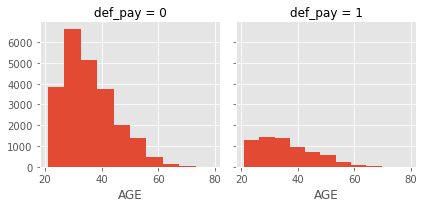

In [41]:
g = sns.FacetGrid(df_credit, col = 'def_pay')
g.map(plt.hist, 'AGE')

There are clients that paid more than required, had a negative bill in September and still have a month of delay and defaulted as well the next month.
Consider the variables PAY_n because lack of understanding to their correlation. Transform them into a binary variable (late/not late).

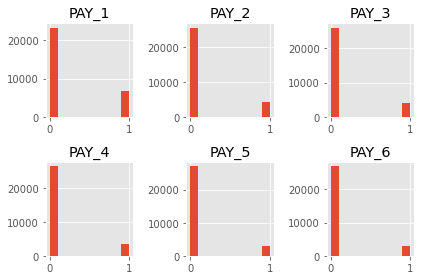

In [42]:
df_credit.loc[df_credit.PAY_1 > 0, 'PAY_1'] = 1
df_credit.loc[df_credit.PAY_2 > 0, 'PAY_2'] = 1
df_credit.loc[df_credit.PAY_3 > 0, 'PAY_3'] = 1
df_credit.loc[df_credit.PAY_4 > 0, 'PAY_4'] = 1
df_credit.loc[df_credit.PAY_5 > 0, 'PAY_5'] = 1
df_credit.loc[df_credit.PAY_6 > 0, 'PAY_6'] = 1
late = df_credit[['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
draw_histograms(late, late.columns, 2, 3, 10)

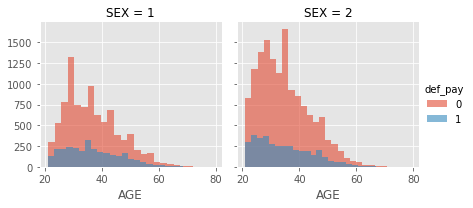

In [43]:
g = sns.FacetGrid(df_credit, col = 'SEX', hue = 'def_pay')
g.map(plt.hist, 'AGE', alpha = 0.6, bins = 25)
g.add_legend()

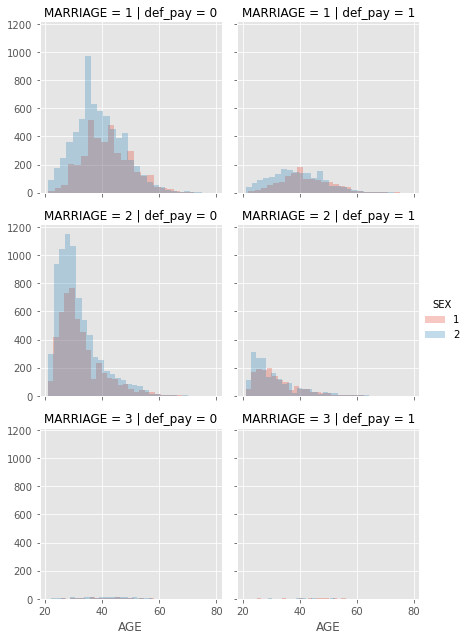

In [44]:
g = sns.FacetGrid(df_credit, col = 'def_pay', row = 'MARRIAGE', hue = 'SEX')
g.map(plt.hist, 'AGE', alpha = 0.3, bins = 25)
g.add_legend()

### 4.2 Diabetes Readmission EDA
### 4.2.1  DR - Data Exploration

[Summary of Contents](#Summary-of-Contents)

In [45]:
df_diab.describe().T

count          mean           std      min  \
encounter_id              101766.0  1.652016e+08  1.026403e+08  12522.0   
patient_nbr               101766.0  5.433040e+07  3.869636e+07    135.0   
admission_type_id         101766.0  2.024006e+00  1.445403e+00      1.0   
discharge_disposition_id  101766.0  3.715642e+00  5.280166e+00      1.0   
admission_source_id       101766.0  5.754437e+00  4.064081e+00      1.0   
time_in_hospital          101766.0  4.395987e+00  2.985108e+00      1.0   
num_lab_procedures        101766.0  4.309564e+01  1.967436e+01      1.0   
num_procedures            101766.0  1.339730e+00  1.705807e+00      0.0   
num_medications           101766.0  1.602184e+01  8.127566e+00      1.0   
number_outpatient         101766.0  3.693572e-01  1.267265e+00      0.0   
number_emergency          101766.0  1.978362e-01  9.304723e-01      0.0   
number_inpatient          101766.0  6.355659e-01  1.262863e+00      0.0   
number_diagnoses          101766.0  7.422607e+00  1.933600e+00      1.0   

                                 25%          50%           75%          max  
encounter_id              84961194.0  152388987.0  2.302709e+08  443867222.0  
patient_nbr               23413221.0   45505143.0  8.754595e+07  189502619.0  
admission_type_id                1.0          1.0  3.000000e+00          8.0  
discharge_disposition_id         1.0          1.0  4.000000e+00         28.0  
admission_source_id              1.0          7.0  7.000000e+00         25.0  
time_in_hospital                 2.0          4.0  6.000000e+00         14.0  
num_lab_procedures              31.0         44.0  5.700000e+01        132.0  
num_procedures                   0.0          1.0  2.000000e+00          6.0  
num_medications                 10.0         15.0  2.000000e+01         81.0  
number_outpatient                0.0          0.0  0.000000e+00         42.0  
number_emergency                 0.0          0.0  0.000000e+00         76.0  
number_inpatient                 0.0          0.0  1.000000e+00         21.0  
number_diagnoses                 6.0          8.0  9.000000e+00         16.0

### DR - Describing Target Variable

[Summary of Contents](#Summary-of-Contents)

In [46]:
# Updating Dataset with Target Variable (1/0)
id_mapping = pd.read_csv("./Data/diabetes/IDs_mapping.csv")
id_mapping

admission_type_id                                        description
0                  1                                          Emergency
1                  2                                             Urgent
2                  3                                           Elective
3                  4                                            Newborn
4                  5                                      Not Available
..               ...                                                ...
62                22   Transfer from hospital inpt/same fac reslt in...
63                23                          Born inside this hospital
64                24                         Born outside this hospital
65                25            Transfer from Ambulatory Surgery Center
66                26                              Transfer from Hospice

[67 rows x 2 columns]

Target content changed to 0-1

The outcome is whether or not a patient is readmitted to the hospital within 30 days.

The actual variable in the dataset has <30, >30 and No Readmission categories. The readmission after 30 days and no readmission will be combined into a single category.

In [47]:
df_diab.readmitted = [1 if each=='<30' else 0 for each in df_diab.readmitted]

df_diab.readmitted.describe()

count    101766.000000
mean          0.111599
std           0.314874
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: readmitted, dtype: float64

In [48]:
df_diab.describe().T

count          mean           std      min  \
encounter_id              101766.0  1.652016e+08  1.026403e+08  12522.0   
patient_nbr               101766.0  5.433040e+07  3.869636e+07    135.0   
admission_type_id         101766.0  2.024006e+00  1.445403e+00      1.0   
discharge_disposition_id  101766.0  3.715642e+00  5.280166e+00      1.0   
admission_source_id       101766.0  5.754437e+00  4.064081e+00      1.0   
time_in_hospital          101766.0  4.395987e+00  2.985108e+00      1.0   
num_lab_procedures        101766.0  4.309564e+01  1.967436e+01      1.0   
num_procedures            101766.0  1.339730e+00  1.705807e+00      0.0   
num_medications           101766.0  1.602184e+01  8.127566e+00      1.0   
number_outpatient         101766.0  3.693572e-01  1.267265e+00      0.0   
number_emergency          101766.0  1.978362e-01  9.304723e-01      0.0   
number_inpatient          101766.0  6.355659e-01  1.262863e+00      0.0   
number_diagnoses          101766.0  7.422607e+00  1.933600e+00      1.0   
readmitted                101766.0  1.115992e-01  3.148742e-01      0.0   

                                 25%          50%           75%          max  
encounter_id              84961194.0  152388987.0  2.302709e+08  443867222.0  
patient_nbr               23413221.0   45505143.0  8.754595e+07  189502619.0  
admission_type_id                1.0          1.0  3.000000e+00          8.0  
discharge_disposition_id         1.0          1.0  4.000000e+00         28.0  
admission_source_id              1.0          7.0  7.000000e+00         25.0  
time_in_hospital                 2.0          4.0  6.000000e+00         14.0  
num_lab_procedures              31.0         44.0  5.700000e+01        132.0  
num_procedures                   0.0          1.0  2.000000e+00          6.0  
num_medications                 10.0         15.0  2.000000e+01         81.0  
number_outpatient                0.0          0.0  0.000000e+00         42.0  
number_emergency                 0.0          0.0  0.000000e+00         76.0  
number_inpatient                 0.0          0.0  1.000000e+00         21.0  
number_diagnoses                 6.0          8.0  9.000000e+00         16.0  
readmitted                       0.0          0.0  0.000000e+00          1.0

In [49]:
del id_mapping
#id_mapping

In [50]:
# Describing Target Variables
perc = (df_diab.readmitted.sum()/len(df_diab.readmitted)*100)
print("The probability of readmission is {:.2f}%".format(perc))

The probability of readmission is 11.16%


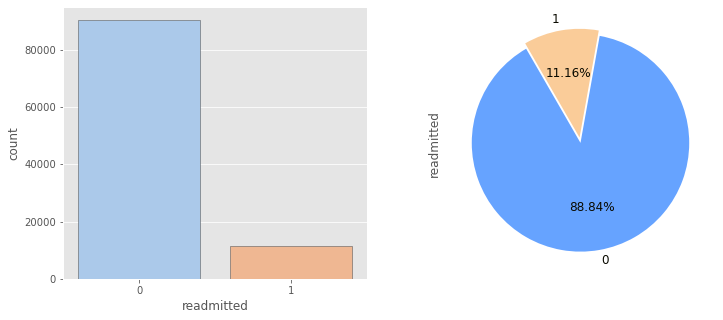

In [51]:
# Describing Target (Readmitted) Variable
fig, ax =plt.subplots(nrows=1,ncols=2, figsize=(12,5))
labels=['0','1']
sns.countplot(x=df_diab.readmitted, data=df_diab, palette="pastel",ax=ax[0], edgecolor=".3")
df_diab.readmitted.value_counts().plot.pie(autopct="%1.2f%%", ax=ax[1], colors=['#66a3ff','#facc99'], 
                                        labels=labels, explode = [0,0.05], startangle=120,
                                        textprops={'fontsize': 12, 'color':'#0a0a00'})
plt.show()

### 4.2.2 DR - Data Preprocessing
### DR - Dropping Irrelevant Columns

[Summary of Contents](#Summary-of-Contents)

#### Listing Columns by Data Type (categorical/numerical)

In [52]:
diab_cat_columns = ['race', 'diag_3','diag_2','diag_1','tolazamide','glyburide','tolbutamide','pioglitazone',
                       'rosiglitazone','acarbose','miglitol','troglitazone','acetohexamide','insulin','glyburide-metformin',
                       'glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone',
                       'change','diabetesMed','glipizide','repaglinide','glimepiride','gender','age','admission_type_id',
                       'discharge_disposition_id','admission_source_id','chlorpropamide','max_glu_serum','A1Cresult',
                       'metformin','nateglinide','readmitted']

diab_num_columns = ['num_medications','time_in_hospital','num_lab_procedures','num_procedures','number_outpatient',
                     'number_emergency','number_inpatient','number_diagnoses']

#### Dropping columns that may not be relevant

In [53]:
drop_list = ['examide' , 'citoglipton', 'weight','encounter_id','patient_nbr','payer_code','medical_specialty']  
df_diab.drop(drop_list,axis=1, inplace=True)

### DR - Checking for Missing Data
[Summary of Contents](#Summary-of-Contents)

In [54]:
df_diab.replace('?', np.nan, inplace = True)

In [55]:
diab_missing = Missing_Values(df_diab)
diab_missing

#_Total_Value  #_Total_Missing_Value  \
Variable                                                         
race                             101766                   2273   
diag_3                           101766                   1423   
diag_2                           101766                    358   
diag_1                           101766                     21   
miglitol                         101766                      0   
glipizide                        101766                      0   
glyburide                        101766                      0   
tolbutamide                      101766                      0   
pioglitazone                     101766                      0   
rosiglitazone                    101766                      0   
acarbose                         101766                      0   
troglitazone                     101766                      0   
glimepiride                      101766                      0   
tolazamide                       101766                      0   
insulin                          101766                      0   
glyburide-metformin              101766                      0   
glipizide-metformin              101766                      0   
glimepiride-pioglitazone         101766                      0   
metformin-rosiglitazone          101766                      0   
metformin-pioglitazone           101766                      0   
change                           101766                      0   
diabetesMed                      101766                      0   
acetohexamide                    101766                      0   
nateglinide                      101766                      0   
chlorpropamide                   101766                      0   
num_medications                  101766                      0   
age                              101766                      0   
admission_type_id                101766                      0   
discharge_disposition_id         101766                      0   
admission_source_id              101766                      0   
time_in_hospital                 101766                      0   
num_lab_procedures               101766                      0   
num_procedures                   101766                      0   
number_outpatient                101766                      0   
gender                           101766                      0   
number_emergency                 101766                      0   
number_inpatient                 101766                      0   
number_diagnoses                 101766                      0   
max_glu_serum                    101766                      0   
A1Cresult                        101766                      0   
metformin                        101766                      0   
repaglinide                      101766                      0   
readmitted                       101766                      0   

                          %_Missing_Value_Rate Data_Type  \
Variable                                                   
race                                    0.0223    object   
diag_3                                  0.0140    object   
diag_2                                  0.0035    object   
diag_1                                  0.0002    object   
miglitol                                0.0000    object   
glipizide                               0.0000    object   
glyburide                               0.0000    object   
tolbutamide                             0.0000    object   
pioglitazone                            0.0000    object   
rosiglitazone                           0.0000    object   
acarbose                                0.0000    object   
troglitazone                            0.0000    object   
glimepiride                             0.0000    object   
tolazamide                              0.0000    object   
insulin                                 0.0000    object   
glyburide-metformin                

In [56]:
df_diab["race"].fillna(df_diab["race"].mode()[0], inplace = True)

df_diab["race"].isnull().sum()

0

In [57]:
df_diab = df_diab.loc[~df_diab.discharge_disposition_id.isin([11,13,14,19,20,21])]

### 4.2.3 DR - Data Visualisation
[Summary of Contents](#Summary-of-Contents)

#### Outlier Visualisation

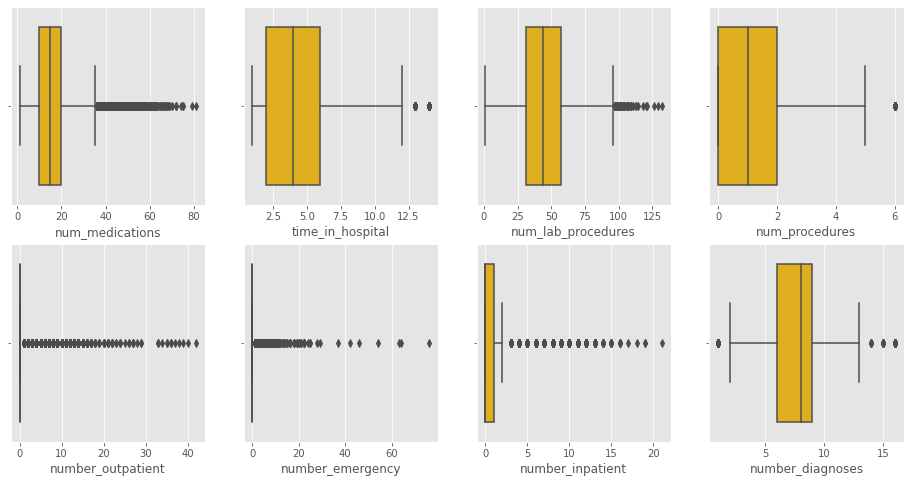

In [58]:
boxplot_for_outlier(df_diab,diab_num_columns)

#### Heatmap

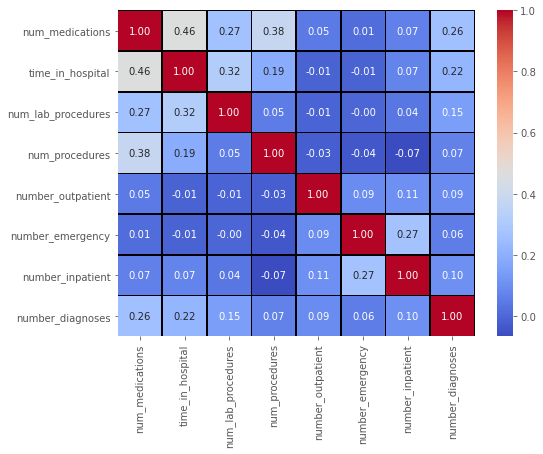

In [59]:
f,ax = plt.subplots(figsize=(8, 6))
sns.heatmap(df_diab[diab_num_columns].corr(), annot=True, linewidths=0.5,linecolor="black", fmt= '.2f',ax=ax,cmap="coolwarm")
plt.show()

#### Gender Distribution

In [60]:
df_diab.gender.replace('Unknown/Invalid', np.nan , inplace=True)
df_diab.dropna(subset=['gender'], how='all', inplace = True)

df_diab.gender.value_counts()

Female    53454
Male      45886
Name: gender, dtype: int64

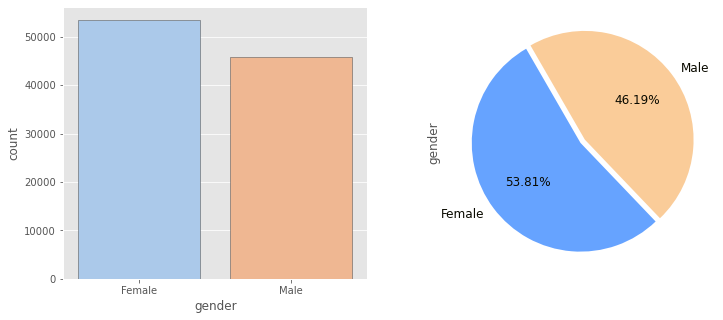

In [61]:
fig, ax =plt.subplots(nrows=1,ncols=2, figsize=(12,5))
labels=['Female','Male']
sns.countplot(x=df_diab.gender, data=df_diab, palette="pastel",ax=ax[0], edgecolor=".3")
df_diab.gender.value_counts().plot.pie(autopct="%1.2f%%", ax=ax[1], colors=['#66a3ff','#facc99'], 
                                        labels=labels, explode = (0, 0.05), startangle=120,
                                        textprops={'fontsize': 12, 'color':'#0a0a00'})
plt.show()

#### Gender, Age and Race Visualisation

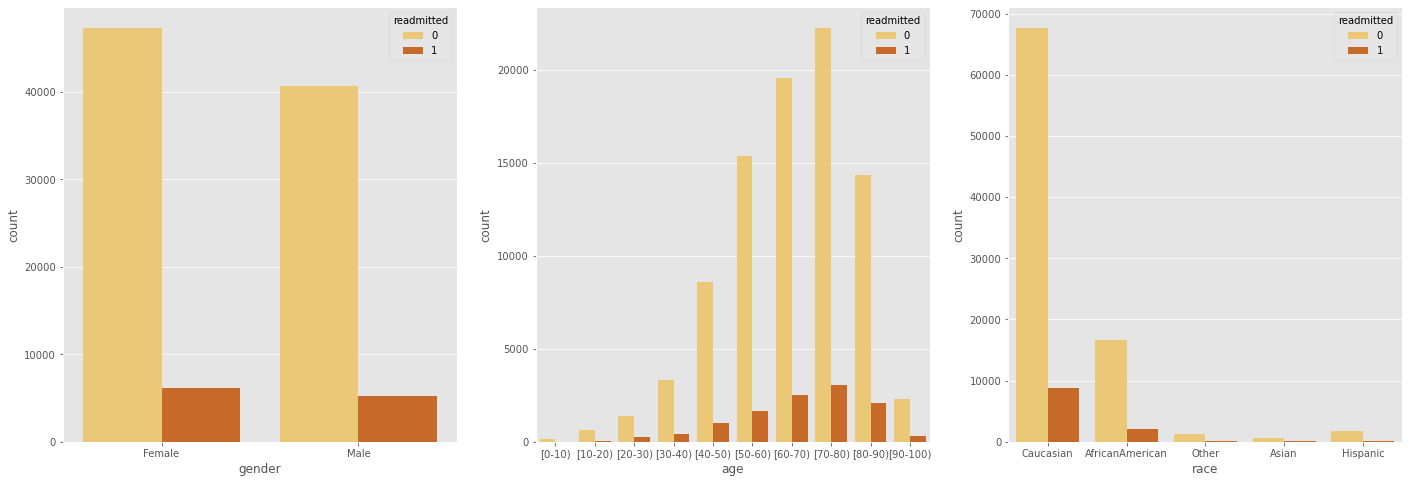

In [62]:
visual_list = ['gender','age','race']
fig, ax =plt.subplots(nrows=1,ncols=3,figsize=(24,8))
count =0
for i in visual_list:
    sns.countplot(df_diab[i], hue=df_diab.readmitted, palette='YlOrBr', ax=ax[count]);
    count = count+1

### Updating 'Gender' Column to change Male/Female to Labels 1 or 2

In [63]:
df_diab.gender.value_counts()

Female    53454
Male      45886
Name: gender, dtype: int64

In [64]:
df_diab.loc[df_diab.gender == 'Male', 'gender'] = 1
df_diab.loc[df_diab.gender == 'Female', 'gender'] = 2
df_diab.gender.value_counts()

2    53454
1    45886
Name: gender, dtype: int64

In [65]:
df_diab.head()

race gender      age  admission_type_id  \
0        Caucasian      2   [0-10)                  6   
1        Caucasian      2  [10-20)                  1   
2  AfricanAmerican      2  [20-30)                  1   
3        Caucasian      1  [30-40)                  1   
4        Caucasian      1  [40-50)                  1   

   discharge_disposition_id  admission_source_id  time_in_hospital  \
0                        25                    1                 1   
1                         1                    7                 3   
2                         1                    7                 2   
3                         1                    7                 2   
4                         1                    7                 1   

   num_lab_procedures  num_procedures  num_medications  ...  tolazamide  \
0                  41               0                1  ...          No   
1                  59               0               18  ...          No   
2                  11               5               13  ...          No   
3                  44               1               16  ...          No   
4                  51               0                8  ...          No   

   insulin  glyburide-metformin glipizide-metformin glimepiride-pioglitazone  \
0       No                   No                  No                       No   
1       Up                   No                  No                       No   
2       No                   No                  No                       No   
3       Up                   No                  No                       No   
4   Steady                   No                  No                       No   

  metformin-rosiglitazone  metformin-pioglitazone change diabetesMed  \
0                      No                      No     No          No   
1                      No                      No     Ch         Yes   
2                      No                      No     No         Yes   
3                      No                      No     Ch         Yes   
4                      No                      No     Ch         Yes   

  readmitted  
0          0  
1          0  
2          0  
3          0  
4          0  

[5 rows x 43 columns]

#### Updating 'Race' Column to categorise categorical labels

In [66]:
df_diab.race.value_counts()

Caucasian          76452
AfricanAmerican    18772
Hispanic            2017
Other               1471
Asian                628
Name: race, dtype: int64

In [67]:
df_diab.loc[df_diab.race == 'Caucasian', 'race'] = 1
df_diab.loc[df_diab.race == 'AfricanAmerican', 'race'] = 2
df_diab.loc[df_diab.race == 'Hispanic', 'race'] = 3
df_diab.loc[df_diab.race == 'Asian', 'race'] = 4
df_diab.loc[df_diab.race == 'Other', 'race'] = 5
df_diab.race.value_counts()

1    76452
2    18772
3     2017
5     1471
4      628
Name: race, dtype: int64

In [68]:
corr_2_cols(df_diab, 'race', 'readmitted')

readmitted      0     1      perc
race                             
1           67708  8744  0.114372
2           16623  2149  0.114479
3            1805   212  0.105107
4             563    65  0.103503
5            1327   144  0.097893

In [69]:
print(df_diab.dtypes)

race                        object
gender                      object
age                         object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide                   object
tolbutamide                 object
pioglitazone        

## 5. Feature Engineering (FE)
### 5.1 Credit Card Default FE

[Summary of Contents](#Summary-of-Contents)

From the EDA, men nad married people are most likely to default. Consider combining them in a single variable given by the product of the two. Both variables decrease the probability of defaulting as their value increase. 

Combining SEX and MARRIAGE to create categories for married men, married women, single men, etc.

### SE_MA
[Summary of Contents](#Summary-of-Contents)

In [70]:
df_credit['SE_MA'] = 0
df_credit.loc[((df_credit.SEX == 1) & (df_credit.MARRIAGE == 1)) , 'SE_MA'] = 1 #married man
df_credit.loc[((df_credit.SEX == 1) & (df_credit.MARRIAGE == 2)) , 'SE_MA'] = 2 #single man
df_credit.loc[((df_credit.SEX == 1) & (df_credit.MARRIAGE == 3)) , 'SE_MA'] = 3 #divorced man
df_credit.loc[((df_credit.SEX == 2) & (df_credit.MARRIAGE == 1)) , 'SE_MA'] = 4 #married woman
df_credit.loc[((df_credit.SEX == 2) & (df_credit.MARRIAGE == 2)) , 'SE_MA'] = 5 #single woman
df_credit.loc[((df_credit.SEX == 2) & (df_credit.MARRIAGE == 3)) , 'SE_MA'] = 6 #divorced woman
corr_2_cols(df_credit, 'SE_MA', 'def_pay')

def_pay     0     1      perc
SE_MA                        
1        3844  1346  0.259345
2        5068  1485  0.226614
3         103    42  0.289655
4        6609  1860  0.219625
5        7555  1856  0.197216
6         185    47  0.202586

- Married men have a higher probability of defaulting than married women
- Single men have a higher probability of defaulting than single women
- Divorced men a much higher probability of defaulting than divorced women
** Note the divorced category was not very populated

### AgeBin
[Summary of Contents](#Summary-of-Contents)
Further exploring the AGE feature:

In [71]:
df_credit['AgeBin'] = pd.cut(df_credit['AGE'], 6)
df_credit.AgeBin.value_counts()

(20.942, 30.667]    11013
(30.667, 40.333]    10713
(40.333, 50.0]       6005
(50.0, 59.667]       1930
(59.667, 69.333]      314
(69.333, 79.0]         25
Name: AgeBin, dtype: int64

<AxesSubplot:>

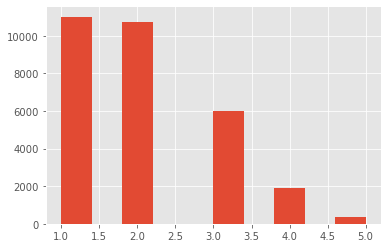

In [72]:
df_credit['AgeBin'] = pd.cut(df_credit['AGE'], 6, labels = [1,2,3,4,5,6])
df_credit['AgeBin'] = pd.to_numeric(df_credit['AgeBin'])
# combining groups 5&6 treat those aged over 60 equally
df_credit.loc[(df_credit['AgeBin'] == 6) , 'AgeBin'] = 5
df_credit.AgeBin.hist()

In [73]:
corr_2_cols(df_credit, 'AgeBin', 'def_pay')

def_pay     0     1      perc
AgeBin                       
1        8542  2471  0.224371
2        8524  2189  0.204331
3        4606  1399  0.232973
4        1449   481  0.249223
5         243    96  0.283186

The probability of defaulting decreases as people age.

In [74]:
corr_2_cols(df_credit, 'AgeBin', 'SEX')

SEX        1     2      perc
AgeBin                      
1       3842  7171  0.651140
2       4363  6350  0.592738
3       2587  3418  0.569192
4        917  1013  0.524870
5        179   160  0.471976

The percentage of men increases with the age category.

### Avg_exp_N
[Summary of Contents](#Summary-of-Contents)

Next is to describe the expenditure of a client in term so of their average expenses at any given month by dividing that number by LIMIT_BAL. This gets an indication fo how "careless" a client is.

In [75]:
df_credit['Avg_exp_5'] = ((df_credit['BILL_AMT5'] - (df_credit['BILL_AMT6'] - df_credit['PAY_AMT5']))) / df_credit['LIMIT_BAL']
df_credit['Avg_exp_4'] = (((df_credit['BILL_AMT5'] - (df_credit['BILL_AMT6'] - df_credit['PAY_AMT5'])) +
                 (df_credit['BILL_AMT4'] - (df_credit['BILL_AMT5'] - df_credit['PAY_AMT4']))) / 2) / df_credit['LIMIT_BAL']
df_credit['Avg_exp_3'] = (((df_credit['BILL_AMT5'] - (df_credit['BILL_AMT6'] - df_credit['PAY_AMT5'])) +
                 (df_credit['BILL_AMT4'] - (df_credit['BILL_AMT5'] - df_credit['PAY_AMT4'])) +
                 (df_credit['BILL_AMT3'] - (df_credit['BILL_AMT4'] - df_credit['PAY_AMT3']))) / 3) / df_credit['LIMIT_BAL']
df_credit['Avg_exp_2'] = (((df_credit['BILL_AMT5'] - (df_credit['BILL_AMT6'] - df_credit['PAY_AMT5'])) +
                 (df_credit['BILL_AMT4'] - (df_credit['BILL_AMT5'] - df_credit['PAY_AMT4'])) +
                 (df_credit['BILL_AMT3'] - (df_credit['BILL_AMT4'] - df_credit['PAY_AMT3'])) +
                 (df_credit['BILL_AMT2'] - (df_credit['BILL_AMT3'] - df_credit['PAY_AMT2']))) / 4) / df_credit['LIMIT_BAL']
df_credit['Avg_exp_1'] = (((df_credit['BILL_AMT5'] - (df_credit['BILL_AMT6'] - df_credit['PAY_AMT5'])) +
                 (df_credit['BILL_AMT4'] - (df_credit['BILL_AMT5'] - df_credit['PAY_AMT4'])) +
                 (df_credit['BILL_AMT3'] - (df_credit['BILL_AMT4'] - df_credit['PAY_AMT3'])) +
                 (df_credit['BILL_AMT2'] - (df_credit['BILL_AMT3'] - df_credit['PAY_AMT2'])) +
                 (df_credit['BILL_AMT1'] - (df_credit['BILL_AMT2'] - df_credit['PAY_AMT1']))) / 5) / df_credit['LIMIT_BAL']
df_credit[['LIMIT_BAL', 'Avg_exp_5', 'BILL_AMT5', 'Avg_exp_4', 'BILL_AMT4','Avg_exp_3', 'BILL_AMT3',
    'Avg_exp_2', 'BILL_AMT2', 'Avg_exp_1', 'BILL_AMT1', 'def_pay']].sample(20)

LIMIT_BAL  Avg_exp_5  BILL_AMT5  Avg_exp_4  BILL_AMT4  Avg_exp_3  \
17516    90000.0   0.005389    30120.0   0.005339    28596.0   0.006404   
22390   500000.0   0.011496    15721.0   0.012414    16638.0   0.008943   
10082   290000.0   0.003217     4030.0   0.005291      166.0   0.006402   
8454     80000.0   0.119413     9390.0   0.110088     8061.0   0.073392   
19101    10000.0   0.023800     5543.0   0.023750     5280.0   0.018267   
7905    170000.0   0.006659     1132.0   0.006659     1132.0   0.008302   
7716    130000.0   0.020923    80733.0   0.087200    97685.0   0.090115   
20403   200000.0   0.064045    13677.0   0.043215    18154.0   0.029143   
2155    110000.0   0.028318   103591.0   0.027409   106506.0   0.027879   
26304    90000.0   0.306622    27847.0   0.204406    12044.0   0.166611   
8218     30000.0   0.015500    28075.0   0.017667    27570.0   0.016744   
1336     70000.0   0.013057    47298.0   0.012879    46487.0   0.013648   
5003     80000.0   0.012563    44469.0   0.041737    48532.0   0.051446   
27654    10000.0   0.028700     8989.0   0.627000    -8758.0   1.019000   
29001    50000.0   0.020000     5557.0   0.020000     1000.0   0.064953   
28470   230000.0   0.000000        0.0   0.000000        0.0   0.001449   
13588    30000.0   0.543500    16305.0   0.321867    18471.0   0.240633   
2931    230000.0   0.019074     4387.0   0.024193     6742.0   0.021781   
16443    20000.0   0.000000        0.0   0.000000        0.0   0.000000   
25243   140000.0   0.006364    45687.0   0.006907    43730.0   0.007007   

       BILL_AMT3  Avg_exp_2  BILL_AMT2  Avg_exp_1  BILL_AMT1  def_pay  
17516    29364.0   0.006883    28613.0   0.007178    27565.0        1  
22390      967.0   0.009514     5609.0   0.011466     9609.0        0  
10082     2467.0   0.023294    21451.0   0.019205    22277.0        0  
8454      8061.0   0.055044        0.0   0.044035        0.0        1  
19101     4116.0   0.015125     3100.0   0.016040     2240.0        1  
7905      1970.0   0.006691      316.0   0.007364      736.0        0  
7716    106158.0   0.125985   130522.0   0.106303   129099.0        0  
20403      198.0   0.022107      200.0   0.026853     9167.0        0  
2155    105676.0   0.028239   105101.0   0.025480    95690.0        1  
26304    10220.0   0.149692     9124.0   0.137093     8927.0        0  
8218     26882.0   0.301700    60079.0   0.065907    32006.0        0  
1336     47550.0   0.013986    43600.0   0.013997    42583.0        1  
5003     52660.0   0.041862    43709.0   0.039950    44508.0        0  
27654     9272.0   0.809025    10063.0   0.650360     7720.0        1  
29001     8743.0   0.049645     6929.0   0.084688    16986.0        1  
28470     1000.0   0.022901    20069.0   0.027912    30099.0        0  
13588    19816.0   0.186983    19097.0   0.154133    17779.0        0  
2931     10507.0   0.055190    45253.0   0.045348    46628.0        0  
16443        0.0   0.000000        0.0   0.000000        0.0        0  
25243    41739.0   0.006970    42699.0   0.006950    38661.0        1

### 5.2 Diabetes Readmission FE
### Diagnostics 1-2-3 Transform
[Summary of Contents](#Summary-of-Contents)

In [76]:
diag_list = ['diag_1','diag_2','diag_3']

for col in diag_list:
    df_diab[col].fillna('NaN', inplace=True)

In [77]:
def transformFunc(value):
    value = re.sub("V[0-9]*", "0", value) # V 
    value = re.sub("E[0-9]*", "0", value) # E 
    value = re.sub('NaN', "-1", value) # Nan 
    return value

def transformCategory(value):
    if value>=390 and value<=459 or value==785:
        category = 'Circulatory'
    elif value>=460 and value<=519 or value==786:
        category = 'Respiratory'
    elif value>=520 and value<=579 or value==787:
        category = 'Digestive'
    elif value==250:
        category = 'Diabetes'
    elif value>=800 and value<=999:
        category = 'Injury'          
    elif value>=710 and value<=739:
        category = 'Musculoskeletal'   
    elif value>=580 and value<=629 or value==788:
        category = 'Genitourinary'
    elif value>=140 and value<=239 :
        category = 'Neoplasms'
    elif value==-1:
        category = 'NAN'
    else :
        category = 'Other'

    return category

In [78]:
for col in diag_list:
    df_diab[col] = df_diab[col].apply(transformFunc)
    df_diab[col] = df_diab[col].astype(float)

In [79]:
for col in diag_list:
    df_diab[col] = df_diab[col].apply(transformCategory)

#### Distribution of Diag_1, Diag_2 and Diag_3 Variables by Target Variable

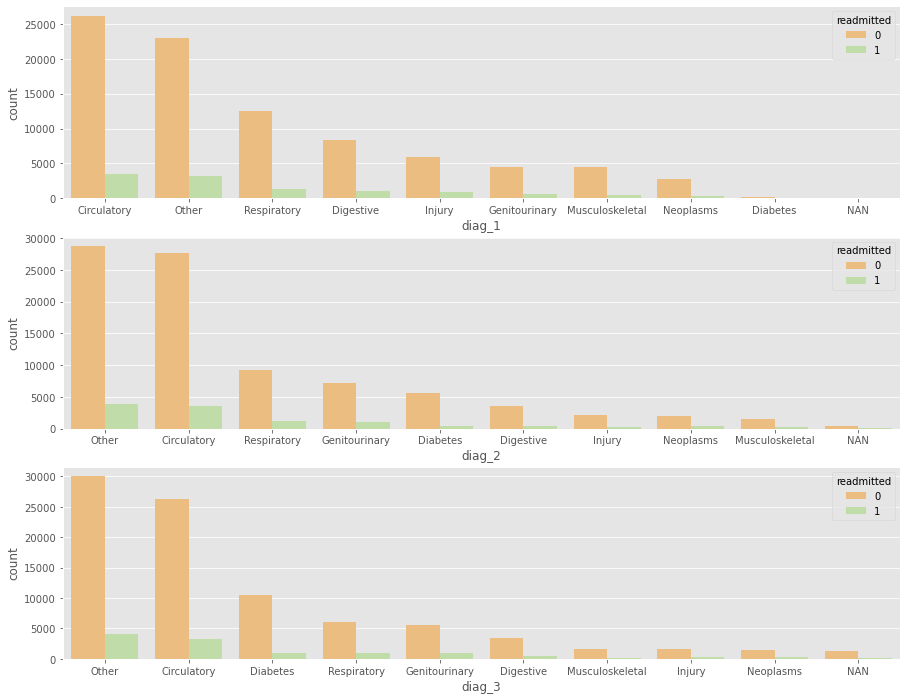

In [80]:
fig, ax =plt.subplots(nrows=3,ncols=1,figsize=(15,12))
count =0
for i in diag_list:
    sns.countplot(df_diab[i], hue=df_diab.readmitted, palette='Spectral', ax=ax[count], order = df_diab[i].value_counts().index);
    count = count+1

#### Local outlier Factor

In [81]:
clf = LocalOutlierFactor(n_neighbors = 2 , contamination = 0.1)
clf.fit_predict(df_diab[diab_num_columns])

array([-1, -1,  1, ..., -1,  1,  1])

In [82]:
df_scores = clf.negative_outlier_factor_
df_scores[0:30]

array([-1.57313218e+00, -5.00000000e+09, -1.21803487e+00, -1.00000000e+00,
       -1.00000000e+00, -1.20710678e+00, -1.11237244e+00, -1.41421356e+00,
       -1.00000000e+00, -1.19553853e+00, -8.53553391e-01, -1.00000000e+00,
       -1.29289322e+00, -1.15973961e+00, -1.14322501e+00, -1.05511154e+00,
       -1.20710678e+00, -9.26776695e-01, -8.53553391e-01, -1.03033009e+00,
       -1.29289322e+00, -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
       -1.00000000e+00, -1.00000000e+00, -1.05618622e+00, -1.00000000e+00,
       -1.07647405e+00, -1.00000000e+00])

In [83]:
np.sort(df_scores)[0:30]

array([-4.00000000e+10, -3.51776695e+10, -2.91421356e+10, -2.79110350e+10,
       -2.44948974e+10, -2.23606798e+10, -2.23606798e+10, -2.23536866e+10,
       -2.00000000e+10, -2.00000000e+10, -2.00000000e+10, -1.75000000e+10,
       -1.73205081e+10, -1.73205081e+10, -1.73205081e+10, -1.73205081e+10,
       -1.73205081e+10, -1.73205081e+10, -1.41421356e+10, -1.41421356e+10,
       -1.41421356e+10, -1.41421356e+10, -1.41421356e+10, -1.41421356e+10,
       -1.41421356e+10, -1.41421356e+10, -1.41421356e+10, -1.41421356e+10,
       -1.41421356e+10, -1.41421356e+10])

In [84]:
threshold_value = np.sort(df_scores)[2]

outlier_tf = df_scores > threshold_value
outlier_tf

array([ True,  True,  True, ...,  True,  True,  True])

In [85]:
new_df = df_diab[df_scores > threshold_value]

In [86]:
df_diab[df_scores < threshold_value]

race gender      age  admission_type_id  discharge_disposition_id  \
93655    1      2  [70-80)                  3                         6   
97761    1      1  [60-70)                  1                         1   

       admission_source_id  time_in_hospital  num_lab_procedures  \
93655                    1                 5                  35   
97761                    7                 3                  65   

       num_procedures  num_medications  ...  tolazamide  insulin  \
93655               0               15  ...          No       Up   
97761               0                8  ...          No       No   

       glyburide-metformin glipizide-metformin glimepiride-pioglitazone  \
93655                   No                  No                       No   
97761                   No                  No                       No   

      metformin-rosiglitazone  metformin-pioglitazone change diabetesMed  \
93655                      No                      No     Ch         Yes   
97761                      No                      No     No          No   

      readmitted  
93655          0  
97761          0  

[2 rows x 43 columns]

In [87]:
# Custom encoding for the 21 Drug Features
drugs = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
        'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone',
        'metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']

for col in drugs:
    df_diab[col] = df_diab[col].replace(['No','Steady','Up','Down'],[0,1,1,1])
    df_diab[col] = df_diab[col].astype(int)

In [88]:
# A1Cresult and max_glu_serum
df_diab['A1Cresult'] = df_diab['A1Cresult'].replace(['>7','>8','Norm','None'],[1,1,0,-99])
df_diab['max_glu_serum'] = df_diab['max_glu_serum'].replace(['>200','>300','Norm','None'],[1,1,0,-99])

## 6. Modelling Preparation
### 6.1 Train-Test Splitting
### 6.1.1 CCD Train-Test Splitting
[Summary of Contents](#Summary-of-Contents)

In [89]:
features = ['LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'PAY_1','PAY_2', 'PAY_3', 
            'PAY_4', 'PAY_5', 'PAY_6','BILL_AMT1', 'BILL_AMT2',
            'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
            'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 
            'SE_MA', 'AgeBin', 'Avg_exp_5', 'Avg_exp_4',
            'Avg_exp_3', 'Avg_exp_2', 'Avg_exp_1']
y_credit = df_credit['def_pay'].copy() # target
X_credit = df_credit[features].copy()
Xtrain_credit, Xtest_credit, ytrain_credit, ytest_credit = train_test_split(X_credit, y_credit, test_size=0.20, random_state=42)

### 6.1.2 DR Train-Test Splitting
[Summary of Contents](#Summary-of-Contents)

In [90]:
X_diab = df_diab.drop(columns="readmitted", axis=1)
y_diab = df_diab.readmitted

Xtrain_diab, Xtest_diab, ytrain_diab, ytest_diab = train_test_split(X_diab, y_diab, test_size = 0.20, random_state = 42)

### Encoding
[Summary of Contents](#Summary-of-Contents)

In [91]:
ordinal_enc = OrdinalEncoder()
Xtrain_diab.age = ordinal_enc.fit_transform(Xtrain_diab.age.values.reshape(-1, 1))
Xtest_diab.age = ordinal_enc.transform(Xtest_diab.age.values.reshape(-1, 1))

In [92]:
for col in diag_list:
    label_enc = LabelEncoder()
    Xtrain_diab[col] = label_enc.fit_transform(Xtrain_diab[col])
    Xtest_diab[col] = label_enc.fit_transform(Xtest_diab[col]) 

### Race and Gender Transform
[Summary of Contents](#Summary-of-Contents)

In [93]:
obj_list = ['race', 'gender']

In [94]:
for col in obj_list:
    label_enc = LabelEncoder()
    Xtrain_diab[col] = label_enc.fit_transform(Xtrain_diab[col])
    Xtest_diab[col] = label_enc.fit_transform(Xtest_diab[col]) 

In [95]:
#binary = ['change', 'diabetesMed', 'gender']
binary = ['change', 'diabetesMed']

binary_enc = BinaryEncoder(cols=binary)
binary_enc.fit_transform(Xtrain_diab)
Xtrain_diab = binary_enc.fit_transform(Xtrain_diab)
Xtest_diab = binary_enc.transform(Xtest_diab)

### Undersampling the majority class
[Summary of Contents](#Summary-of-Contents)

In [96]:
X_diab = pd.concat([Xtrain_diab, ytrain_diab], axis=1)

not_readmitted = X_diab[X_diab.readmitted==0]
readmitted = X_diab[X_diab.readmitted==1]

not_readmitted_sampled = resample(not_readmitted,
                                replace = False, 
                                n_samples = len(readmitted),
                                random_state = 42)

downsampled = pd.concat([not_readmitted_sampled, readmitted])

downsampled.readmitted.value_counts()

0    9077
1    9077
Name: readmitted, dtype: int64

In [97]:
ytrain_diab = downsampled.readmitted
Xtrain_diab = downsampled.drop('readmitted', axis=1)

## 7 Model Selection

### 7.1 Random Forest Classifier (RF)

### 7.1.1 Credit Card Default - RF

### CCD - RF Blind Run
[Summary of Contents](#Summary-of-Contents)

In [98]:
rf_blind_credit = RandomForestClassifier(random_state = 42)
rf_blind_credit.fit(Xtrain_credit, ytrain_credit)

RandomForestClassifier(random_state=42)

In [99]:
y_rfblindtest_credit = rf_blind_credit.predict(Xtest_credit)

In [100]:
print_report(ytest_credit, y_rfblindtest_credit, threshold)
print(classification_report(ytest_credit, y_rfblindtest_credit))

matrix = confusion_matrix(ytest_credit, y_rfblindtest_credit)
print("Confusion Matrix \n", matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis])

AUC: 0.649
Accuracy: 0.809
Recall: 0.363
Precision: 0.608
F1-score: 0.455
Specificity: 0.934
 
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      4687
           1       0.61      0.36      0.45      1313

    accuracy                           0.81      6000
   macro avg       0.72      0.65      0.67      6000
weighted avg       0.79      0.81      0.79      6000

Confusion Matrix 
 [[0.93428632 0.06571368]
 [0.63670982 0.36329018]]


### ROC Curve

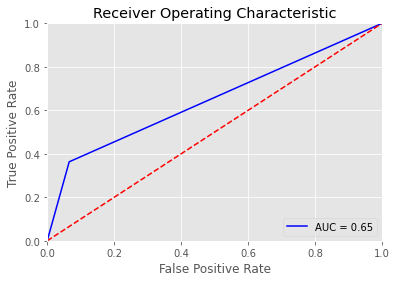

In [101]:
fpr, tpr, threshold = metrics.roc_curve(ytest_credit, y_rfblindtest_credit)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Precision-Recall Curve

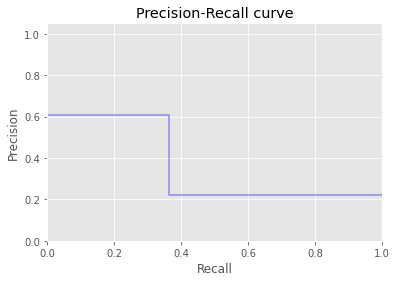

In [102]:
precision, recall, thresholds = precision_recall_curve(ytest_credit, y_rfblindtest_credit)

thresholds = np.append(thresholds, 1)
f1_scores = 2*(precision*recall)/(precision+recall)
plt.step(recall, precision, color='b', alpha=0.4, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')
plt.show()

### CCD - RF RandomizedSearchCV
[Summary of Contents](#Summary-of-Contents)

In [103]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 100)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
rf_random_grid_credit = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [104]:
rf_rand_credit = RandomForestClassifier(random_state=42)
rf_randcv_credit = RandomizedSearchCV(estimator = rf_rand_credit, param_distributions = rf_random_grid_credit, n_iter = 50, cv = 3, verbose = 10, random_state=42, n_jobs=-1)

In [ ]:
rf_randcv_credit.fit(Xtrain_credit, ytrain_credit)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


In [ ]:
y_rfrandcv_creditpred = rf_randcv_credit.predict(Xtest_credit)

In [ ]:
print_report(ytest_credit, y_rfrandcv_creditpred, threshold)
print(classification_report(ytest_credit, y_rfrandcv_creditpred))
matrix = confusion_matrix(ytest_credit, y_rfrandcv_creditpred)
print("Confusion Matrix \n", matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis])

In [103]:
credit_rfrandcv_bestparams = rf_randcv_credit.best_params_
credit_rfrandcv_bestparams

{'n_estimators': 919,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

In [105]:
credit_random_rf = RandomForestClassifier(n_estimators= 919,
 min_samples_split= 5,
 min_samples_leaf= 1,
 max_features= 'auto',
 max_depth= 10,
 bootstrap= True)

credit_random_rf.fit(Xtrain_credit, ytrain_credit)
y_rfrandom_creditpred = credit_random_rf.predict(Xtest_credit)

In [108]:
print_report(ytest_credit, y_rfrandom_creditpred, threshold)
print(classification_report(ytest_credit, y_rfrandom_creditpred))

matrix = confusion_matrix(ytest_credit, y_rfrandom_creditpred)
print("Confusion Matrix \n", matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis])

AUC: 0.649
Accuracy: 0.815
Recall: 0.355
Precision: 0.637
F1-score: 0.456
Specificity: 0.943
 
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4687
           1       0.64      0.35      0.46      1313

    accuracy                           0.81      6000
   macro avg       0.74      0.65      0.67      6000
weighted avg       0.79      0.81      0.79      6000

Confusion Matrix 
 [[0.94324728 0.05675272]
 [0.64508759 0.35491241]]


### ROC Curve

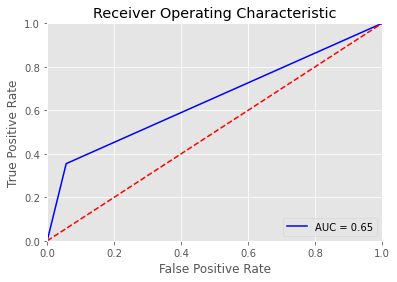

In [109]:
fpr, tpr, threshold = metrics.roc_curve(ytest_credit, y_rfrandom_creditpred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Precision-Recall Curve

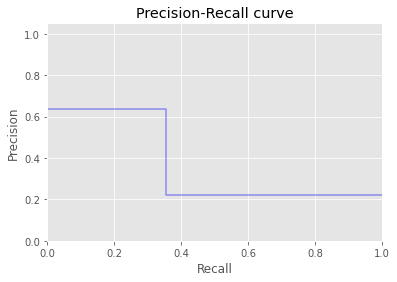

In [110]:
precision, recall, thresholds = precision_recall_curve(ytest_credit, y_rfrandom_creditpred)

thresholds = np.append(thresholds, 1)
f1_scores = 2*(precision*recall)/(precision+recall)
plt.step(recall, precision, color='b', alpha=0.4, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')
plt.show()

### CCD - RF GridSearchCV
[Summary of Contents](#Summary-of-Contents)

In [ ]:
rf_grid_param_credit = {
'n_estimators': [600,700,800],
 'min_samples_split': [2,4,6],
 'min_samples_leaf': [1,2,3],
 'max_features': ['sqrt'],
 'max_depth': [10,20,30],
 'bootstrap': [True]}

rf_grid_credit = RandomForestClassifier(random_state=42)
rf_gridcv_credit = GridSearchCV(estimator = rf_grid_credit, param_grid = rf_grid_param_credit,
                          cv = 3, n_jobs=-1, verbose = 10)

In [106]:
rf_gridcv_credit.fit(Xtrain_credit, ytrain_credit)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [10, 20, 30],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [600, 700, 800]},
             verbose=10)

In [107]:
y_rfgridcv_creditpred = rf_gridcv_credit.predict(Xtest_credit)

In [108]:
print_report(ytest_credit, y_rfgridcv_creditpred, threshold)
print(classification_report(ytest_credit, y_rfgridcv_creditpred))
matrix = confusion_matrix(ytest_credit, y_rfgridcv_creditpred)
print("Confusion Matrix \n", matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis])

AUC: 0.648
Accuracy: 0.814
Recall: 0.354
Precision: 0.634
F1-score: 0.454
Specificity: 0.943
 
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4687
           1       0.63      0.35      0.45      1313

    accuracy                           0.81      6000
   macro avg       0.74      0.65      0.67      6000
weighted avg       0.79      0.81      0.79      6000

Confusion Matrix 
 [[0.94260721 0.05739279]
 [0.6458492  0.3541508 ]]


In [109]:
credit_rfgridcv_bestparams = rf_gridcv_credit.best_params_
credit_rfgridcv_bestparams

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 800}

In [111]:
credit_gridcv_rf = RandomForestClassifier(bootstrap = True,
 max_depth = 10, max_features = 'sqrt',
 min_samples_leaf = 1, min_samples_split = 6, n_estimators = 800)

credit_gridcv_rf.fit(Xtrain_credit, ytrain_credit)
y_rfgrid_creditpred = credit_gridcv_rf.predict(Xtest_credit)

In [114]:
print_report(ytest_credit, y_rfgrid_creditpred, threshold)
print(classification_report(ytest_credit, y_rfgrid_creditpred))

matrix = confusion_matrix(ytest_credit, y_rfgrid_creditpred)
print("Confusion Matrix \n", matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis])

AUC: 0.648
Accuracy: 0.813
Recall: 0.354
Precision: 0.628
F1-score: 0.453
Specificity: 0.941
 
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4687
           1       0.63      0.35      0.45      1313

    accuracy                           0.81      6000
   macro avg       0.73      0.65      0.67      6000
weighted avg       0.79      0.81      0.79      6000

Confusion Matrix 
 [[0.94132707 0.05867293]
 [0.6458492  0.3541508 ]]


### ROC Curve

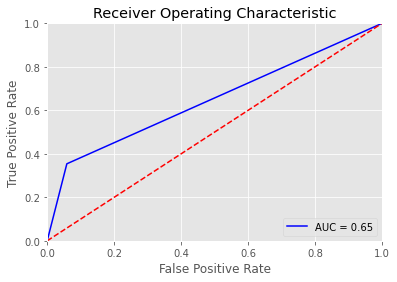

In [115]:
fpr, tpr, threshold = metrics.roc_curve(ytest_credit, y_rfgrid_creditpred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Precision-Recall Curve

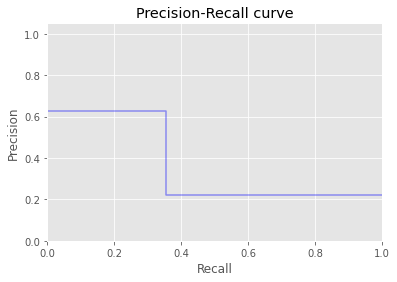

In [116]:
precision, recall, thresholds = precision_recall_curve(ytest_credit, y_rfgrid_creditpred)

thresholds = np.append(thresholds, 1)
f1_scores = 2*(precision*recall)/(precision+recall)
plt.step(recall, precision, color='b', alpha=0.4, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')
plt.show()

### 7.1.2 Diabetes Readmission - RF

### DR - RF Blind Run
[Summary of Contents](#Summary-of-Contents)

In [117]:
rf_blind_diab = RandomForestClassifier(random_state = 42)
rf_blind_diab.fit(Xtrain_diab, ytrain_diab)

RandomForestClassifier(random_state=42)

In [118]:
y_rfblindtest_diab = rf_blind_diab.predict(Xtest_diab)

In [121]:
print_report(ytest_diab, y_rfblindtest_diab, threshold)
print(classification_report(ytest_diab, y_rfblindtest_diab))

matrix = confusion_matrix(ytest_diab, y_rfblindtest_diab)
print("Confusion Matrix \n", matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis])

AUC: 0.605
Accuracy: 0.622
Recall: 0.584
Precision: 0.166
F1-score: 0.258
Specificity: 0.627
 
              precision    recall  f1-score   support

           0       0.92      0.63      0.75     17631
           1       0.17      0.58      0.26      2237

    accuracy                           0.62     19868
   macro avg       0.54      0.61      0.50     19868
weighted avg       0.84      0.62      0.69     19868

Confusion Matrix 
 [[0.62662356 0.37337644]
 [0.41573536 0.58426464]]


### ROC Curve

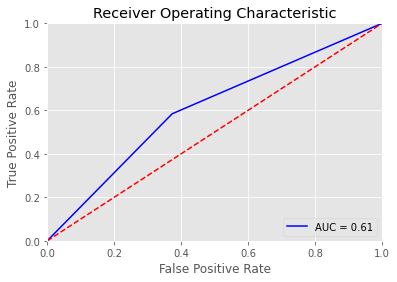

In [122]:
fpr, tpr, threshold = metrics.roc_curve(ytest_diab, y_rfblindtest_diab)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Precision-Recall Curve

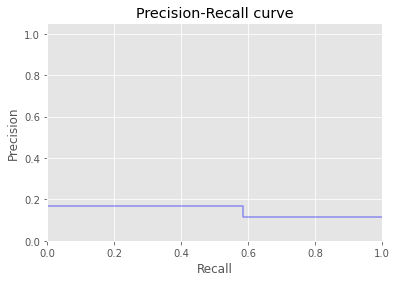

In [123]:
precision, recall, thresholds = precision_recall_curve(ytest_diab, y_rfblindtest_diab)

thresholds = np.append(thresholds, 1)
f1_scores = 2*(precision*recall)/(precision+recall)
plt.step(recall, precision, color='b', alpha=0.4, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')
plt.show()

### DR - RF RandomisedSearchCV
[Summary of Contents](#Summary-of-Contents)

In [114]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 100)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
rf_random_grid_diab = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [115]:
rf_rand_diab = RandomForestClassifier(random_state=42)
rf_randcv_diab = RandomizedSearchCV(estimator = rf_rand_diab, param_distributions = rf_random_grid_diab, n_iter = 50, cv = 3, verbose = 10, random_state=42, n_jobs=-1)

In [116]:
rf_randcv_diab.fit(Xtrain_diab, ytrain_diab)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 208, 216, 224,
                                                         232, 240, 248, 256,
                                                         264, 272, 280, 288,
                                                         296, 305, 313, 321,
                                                         329, 337, 345, 353,
                                                        

In [117]:
y_rfrandcv_diabpred = rf_randcv_diab.predict(Xtest_diab)

In [118]:
print_report(ytest_diab, y_rfrandcv_diabpred, threshold)
print(classification_report(ytest_diab, y_rfrandcv_diabpred))
matrix = confusion_matrix(ytest_diab, y_rfrandcv_diabpred)
print("Confusion Matrix \n", matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis])

AUC: 0.620
Accuracy: 0.619
Recall: 0.620
Precision: 0.171
F1-score: 0.268
Specificity: 0.619
 
              precision    recall  f1-score   support

           0       0.93      0.62      0.74     17631
           1       0.17      0.62      0.27      2237

    accuracy                           0.62     19868
   macro avg       0.55      0.62      0.51     19868
weighted avg       0.84      0.62      0.69     19868

Confusion Matrix 
 [[0.61908003 0.38091997]
 [0.37997318 0.62002682]]


In [119]:
diab_rfrandcv_bestparams = rf_randcv_diab.best_params_
diab_rfrandcv_bestparams

{'n_estimators': 652,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': True}

In [124]:
diab_random_rf = RandomForestClassifier(n_estimators = 846,
 min_samples_split = 5, min_samples_leaf = 2,
 max_features = 'auto', max_depth = 50, bootstrap = False)

diab_random_rf.fit(Xtrain_diab, ytrain_diab)
y_rfrandom_diabpred = diab_random_rf.predict(Xtest_diab)

In [127]:
print_report(ytest_diab, y_rfrandom_diabpred, threshold)
print(classification_report(ytest_diab, y_rfrandom_diabpred))

matrix = confusion_matrix(ytest_diab, y_rfrandom_diabpred)
print("Confusion Matrix \n", matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis])

AUC: 0.617
Accuracy: 0.616
Recall: 0.618
Precision: 0.169
F1-score: 0.266
Specificity: 0.616
 
              precision    recall  f1-score   support

           0       0.93      0.62      0.74     17631
           1       0.17      0.62      0.27      2237

    accuracy                           0.62     19868
   macro avg       0.55      0.62      0.50     19868
weighted avg       0.84      0.62      0.69     19868

Confusion Matrix 
 [[0.61579037 0.38420963]
 [0.38220831 0.61779169]]


### ROC Curve

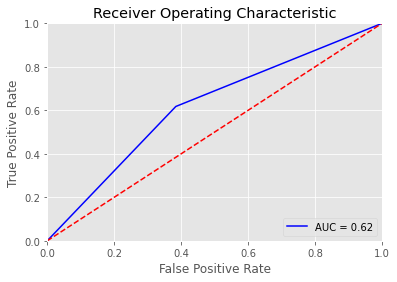

In [128]:
fpr, tpr, threshold = metrics.roc_curve(ytest_diab, y_rfrandom_diabpred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Precision-Recall Curve

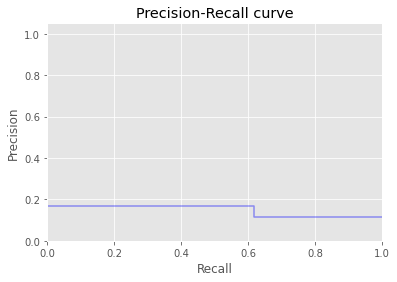

In [129]:
precision, recall, thresholds = precision_recall_curve(ytest_diab, y_rfrandom_diabpred)

thresholds = np.append(thresholds, 1)
f1_scores = 2*(precision*recall)/(precision+recall)
plt.step(recall, precision, color='b', alpha=0.4, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')
plt.show()

### DR - RF GridSearchCV
[Summary of Contents](#Summary-of-Contents)

In [121]:
rf_grid_param_diab = {
'n_estimators': [400,500,600],
 'min_samples_split': [2,4,6],
 'min_samples_leaf': [2,3,4],
 'max_features': ['sqrt'],
 'max_depth': [50,60,70],
 'bootstrap': [True]}

rf_grid_diab = RandomForestClassifier(random_state=42)
rf_gridcv_diab = GridSearchCV(estimator = rf_grid_diab, param_grid = rf_grid_param_diab,
                          cv = 3, n_jobs=-1, verbose = 10)

In [122]:
rf_gridcv_diab.fit(Xtrain_diab, ytrain_diab)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [50, 60, 70],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [400, 500, 600]},
             verbose=10)

In [123]:
y_rfgridcv_diabpred = rf_gridcv_diab.predict(Xtest_diab)

In [124]:
print_report(ytest_diab, y_rfgridcv_diabpred, threshold)
print(classification_report(ytest_diab, y_rfgridcv_diabpred))
matrix = confusion_matrix(ytest_diab, y_rfgridcv_diabpred)
print("Confusion Matrix \n", matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis])

AUC: 0.621
Accuracy: 0.620
Recall: 0.622
Precision: 0.172
F1-score: 0.270
Specificity: 0.620
 
              precision    recall  f1-score   support

           0       0.93      0.62      0.74     17631
           1       0.17      0.62      0.27      2237

    accuracy                           0.62     19868
   macro avg       0.55      0.62      0.51     19868
weighted avg       0.84      0.62      0.69     19868

Confusion Matrix 
 [[0.62004424 0.37995576]
 [0.37773804 0.62226196]]


In [125]:
diab_rfgridcv_bestparams = rf_gridcv_diab.best_params_
diab_rfgridcv_bestparams

{'bootstrap': True,
 'max_depth': 50,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 600}

In [130]:
diab_gridcv_rf = RandomForestClassifier(bootstrap = True,
 max_depth = 70, max_features = 'sqrt',
 min_samples_leaf = 3, min_samples_split = 6, n_estimators = 500)

diab_gridcv_rf.fit(Xtrain_diab, ytrain_diab)
y_rfgrid_diabpred = diab_gridcv_rf.predict(Xtest_diab)

In [133]:
print_report(ytest_diab, y_rfgrid_diabpred, threshold)
print(classification_report(ytest_diab, y_rfgrid_diabpred))

matrix = confusion_matrix(ytest_diab, y_rfgrid_diabpred)
print("Confusion Matrix \n", matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis])

AUC: 0.626
Accuracy: 0.621
Recall: 0.632
Precision: 0.174
F1-score: 0.273
Specificity: 0.619
 
              precision    recall  f1-score   support

           0       0.93      0.62      0.74     17631
           1       0.17      0.63      0.27      2237

    accuracy                           0.62     19868
   macro avg       0.55      0.63      0.51     19868
weighted avg       0.84      0.62      0.69     19868

Confusion Matrix 
 [[0.61913675 0.38086325]
 [0.36790344 0.63209656]]


### ROC Curve

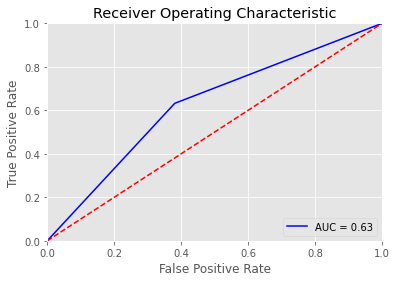

In [134]:
fpr, tpr, threshold = metrics.roc_curve(ytest_diab, y_rfgrid_diabpred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Precision-Recall Curve

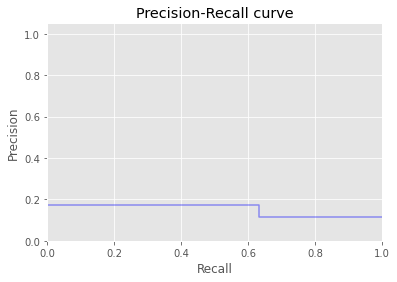

In [135]:
precision, recall, thresholds = precision_recall_curve(ytest_diab, y_rfgrid_diabpred)

thresholds = np.append(thresholds, 1)
f1_scores = 2*(precision*recall)/(precision+recall)
plt.step(recall, precision, color='b', alpha=0.4, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')
plt.show()

### 7.2 LightGBM Classifier (LGBM)

### 7.2.1 Credit Card Default - LGBM

### CCD - LGBM Blind Run
[Summary of Contents](#Summary-of-Contents)

In [136]:
lgb_blind_credit = lgb.LGBMClassifier(random_state = 42)
lgb_blind_credit.fit(Xtrain_credit, ytrain_credit)

LGBMClassifier(random_state=42)

In [137]:
y_lgbblindtest_credit = lgb_blind_credit.predict(Xtest_credit)

In [139]:
print_report(ytest_credit, y_lgbblindtest_credit, threshold)
print(classification_report(ytest_credit, y_lgbblindtest_credit))

matrix = confusion_matrix(ytest_credit, y_lgbblindtest_credit)
print("Confusion Matrix \n", matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis])

AUC: 0.654
Accuracy: 0.814
Recall: 0.369
Precision: 0.628
F1-score: 0.464
Specificity: 0.939
 
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4687
           1       0.63      0.37      0.46      1313

    accuracy                           0.81      6000
   macro avg       0.73      0.65      0.68      6000
weighted avg       0.79      0.81      0.79      6000

Confusion Matrix 
 [[0.9387668  0.0612332 ]
 [0.63137852 0.36862148]]


### ROC Curve

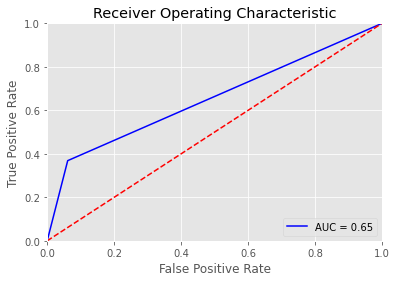

In [141]:
fpr, tpr, threshold = metrics.roc_curve(ytest_credit, y_lgbblindtest_credit)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Precision-Recall Curve

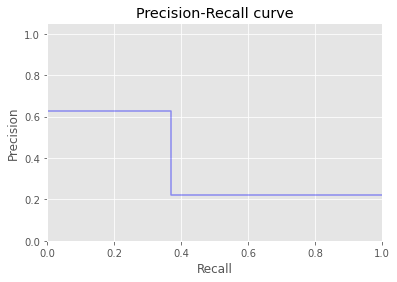

In [143]:
precision, recall, thresholds = precision_recall_curve(ytest_credit, y_lgbblindtest_credit)

thresholds = np.append(thresholds, 1)
f1_scores = 2*(precision*recall)/(precision+recall)
plt.step(recall, precision, color='b', alpha=0.4, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')
plt.show()

### CCD - LGBM RandomizedSearchCV
[Summary of Contents](#Summary-of-Contents)

In [137]:
lgb_random_grid_credit ={'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

In [138]:
lgb_rand_credit = lgb.LGBMClassifier(random_state=42)
lgb_randcv_credit = RandomizedSearchCV(estimator = lgb_rand_credit, 
                          param_distributions = lgb_random_grid_credit,
                          n_iter=50, scoring='roc_auc', cv=3, refit=True,
                             random_state=42, verbose=True)

In [139]:
lgb_randcv_credit.fit(Xtrain_credit, ytrain_credit)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=LGBMClassifier(random_state=42), n_iter=50,
                   param_distributions={'colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000218076DF0C8>,
                                        'min_child_samples': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021803031288>,
                                        'min_child_weight': [1e-05, 0.001, 0.01,
                                                             0.1, 1, 10.0,
                                                             100.0, 1000.0,
                                                             10000.0],
                                        'num_leaves': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000218051C4F88>,
                                        'reg_alpha': [0, 0.1, 1, 2, 5, 7, 10,
                                                      50, 100],
                                        'reg_lambda': [0, 0.1, 1, 5, 10, 

In [140]:
y_lgbrandcv_creditpred = lgb_randcv_credit.predict(Xtest_credit)

In [141]:
print_report(ytest_credit, y_lgbrandcv_creditpred, threshold)
print(classification_report(ytest_credit, y_lgbrandcv_creditpred))
matrix = confusion_matrix(ytest_credit, y_lgbrandcv_creditpred)
print("Confusion Matrix \n", matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis])

AUC: 0.652
Accuracy: 0.815
Recall: 0.363
Precision: 0.635
F1-score: 0.461
Specificity: 0.942
 
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4687
           1       0.63      0.36      0.46      1313

    accuracy                           0.81      6000
   macro avg       0.74      0.65      0.67      6000
weighted avg       0.80      0.81      0.79      6000

Confusion Matrix 
 [[0.94154043 0.05845957]
 [0.63747144 0.36252856]]


In [142]:
credit_lgbrandcv_bestparams = lgb_randcv_credit.best_params_
credit_lgbrandcv_bestparams

{'colsample_bytree': 0.7852189876925726,
 'min_child_samples': 174,
 'min_child_weight': 1e-05,
 'num_leaves': 13,
 'reg_alpha': 2,
 'reg_lambda': 20,
 'subsample': 0.7351906037713829}

In [145]:
credit_random_lgb = lgb.LGBMClassifier(colsample_bytree = 0.532144628539329,
 min_child_samples = 445, min_child_weight = 0.01,
 num_leaves = 24, reg_alpha = 2,
 reg_lambda = 100, subsample = 0.27694124087313665)

credit_random_lgb.fit(Xtrain_credit, ytrain_credit)
y_lgbrandom_creditpred = credit_random_lgb.predict(Xtest_credit)

In [146]:
print_report(ytest_credit, y_lgbrandom_creditpred, threshold)
print(classification_report(ytest_credit, y_lgbrandom_creditpred))

matrix = confusion_matrix(ytest_credit, y_lgbrandom_creditpred)
print("Confusion Matrix \n", matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis])

AUC: 0.655
Accuracy: 0.817
Recall: 0.366
Precision: 0.644
F1-score: 0.466
Specificity: 0.943
 
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4687
           1       0.64      0.37      0.47      1313

    accuracy                           0.82      6000
   macro avg       0.74      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000

Confusion Matrix 
 [[0.94346064 0.05653936]
 [0.63442498 0.36557502]]


### ROC Curve

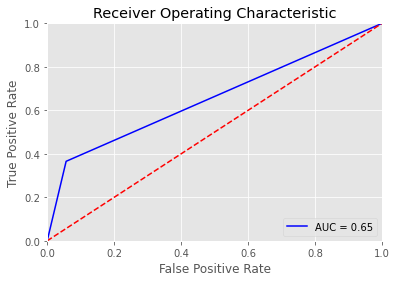

In [148]:
fpr, tpr, threshold = metrics.roc_curve(ytest_credit, y_lgbrandom_creditpred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Precision-Recall Curve

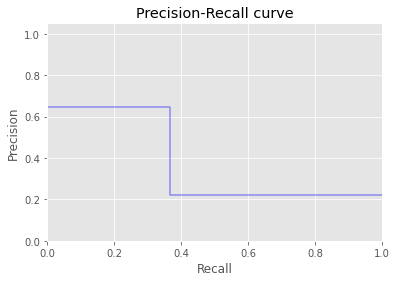

In [149]:
precision, recall, thresholds = precision_recall_curve(ytest_credit, y_lgbrandom_creditpred)

thresholds = np.append(thresholds, 1)
f1_scores = 2*(precision*recall)/(precision+recall)
plt.step(recall, precision, color='b', alpha=0.4, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')
plt.show()

### CCD - LGBM GridSearchCV
[Summary of Contents](#Summary-of-Contents)

In [159]:
lgb_grid_param_credit = {'colsample_bytree': [0.5,1],
 'min_child_samples': [100,200,300],
 'min_child_weight': [1e-5, 1e-3, 1e-1, 1],
 'num_leaves': [10,20,30],
 'reg_alpha': [0,2,4,6],
 'reg_lambda': [10,20,30],
 'subsample': [0.2,0.4,0.6,0.8]}

lgb_grid_credit = lgb.LGBMClassifier(random_state=42)
lgb_gridcv_credit = GridSearchCV(estimator = lgb_grid_credit, param_grid = lgb_grid_param_credit,
                          cv = 3, n_jobs=-1, verbose = 10)

In [160]:
lgb_gridcv_credit.fit(Xtrain_credit, ytrain_credit)

Fitting 3 folds for each of 3456 candidates, totalling 10368 fits


GridSearchCV(cv=3, estimator=LGBMClassifier(random_state=42), n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 1],
                         'min_child_samples': [100, 200, 300],
                         'min_child_weight': [1e-05, 0.001, 0.1, 1],
                         'num_leaves': [10, 20, 30], 'reg_alpha': [0, 2, 4, 6],
                         'reg_lambda': [10, 20, 30],
                         'subsample': [0.2, 0.4, 0.6, 0.8]},
             verbose=10)

In [161]:
y_lgbgridcv_creditpred = lgb_gridcv_credit.predict(Xtest_credit)

In [162]:
print_report(ytest_credit, y_lgbgridcv_creditpred, threshold)
print(classification_report(ytest_credit, y_lgbgridcv_creditpred))
matrix = confusion_matrix(ytest_credit, y_lgbgridcv_creditpred)
print("Confusion Matrix \n", matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis])

AUC: 0.652
Accuracy: 0.814
Recall: 0.364
Precision: 0.631
F1-score: 0.462
Specificity: 0.940
 
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4687
           1       0.63      0.36      0.46      1313

    accuracy                           0.81      6000
   macro avg       0.74      0.65      0.67      6000
weighted avg       0.79      0.81      0.79      6000

Confusion Matrix 
 [[0.94047365 0.05952635]
 [0.63594821 0.36405179]]


In [163]:
credit_lgbgridcv_bestparams = lgb_gridcv_credit.best_params_
credit_lgbgridcv_bestparams

{'colsample_bytree': 0.5,
 'min_child_samples': 100,
 'min_child_weight': 1e-05,
 'num_leaves': 20,
 'reg_alpha': 2,
 'reg_lambda': 10,
 'subsample': 0.2}

In [151]:
credit_gridcv_lgb = lgb.LGBMClassifier(colsample_bytree = 0.5,
 min_child_samples = 100, min_child_weight = 1e-05,
 num_leaves = 20, reg_alpha = 2,
 reg_lambda = 10, subsample = 0.2)

credit_gridcv_lgb.fit(Xtrain_credit, ytrain_credit)
y_lgbgrid_creditpred = credit_gridcv_lgb.predict(Xtest_credit)

In [152]:
print_report(ytest_credit, y_lgbgrid_creditpred, threshold)
print(classification_report(ytest_credit, y_lgbgrid_creditpred))

matrix = confusion_matrix(ytest_credit, y_lgbgrid_creditpred)
print("Confusion Matrix \n", matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis])

AUC: 0.656
Accuracy: 0.817
Recall: 0.369
Precision: 0.642
F1-score: 0.469
Specificity: 0.942
 
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4687
           1       0.64      0.37      0.47      1313

    accuracy                           0.82      6000
   macro avg       0.74      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000

Confusion Matrix 
 [[0.94239386 0.05760614]
 [0.63061691 0.36938309]]


### ROC Curve

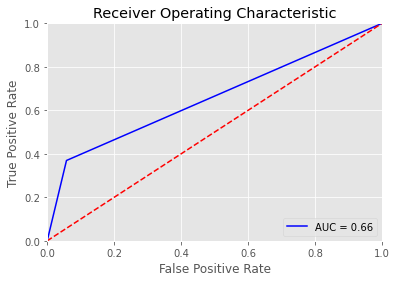

In [153]:
fpr, tpr, threshold = metrics.roc_curve(ytest_credit, y_lgbgrid_creditpred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Precision-Recall Curve

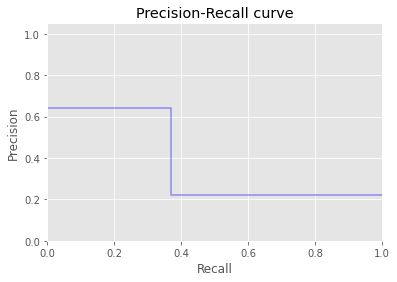

In [154]:
precision, recall, thresholds = precision_recall_curve(ytest_credit, y_lgbgrid_creditpred)

thresholds = np.append(thresholds, 1)
f1_scores = 2*(precision*recall)/(precision+recall)
plt.step(recall, precision, color='b', alpha=0.4, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')
plt.show()

### 7.2.2 Diabetes Readmission - LGBM

### DR - LGBM Blind Run
[Summary of Contents](#Summary-of-Contents)

In [155]:
lgb_blind_diab = lgb.LGBMClassifier(random_state = 42)
lgb_blind_diab.fit(Xtrain_diab, ytrain_diab)

LGBMClassifier(random_state=42)

In [156]:
y_lgbblindtest_diab = lgb_blind_diab.predict(Xtest_diab)

In [158]:
print_report(ytest_diab, y_lgbblindtest_diab, threshold)
print(classification_report(ytest_diab, y_lgbblindtest_diab))

matrix = confusion_matrix(ytest_diab, y_lgbblindtest_diab)
print("Confusion Matrix \n", matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis])

AUC: 0.618
Accuracy: 0.629
Recall: 0.605
Precision: 0.173
F1-score: 0.269
Specificity: 0.632
 
              precision    recall  f1-score   support

           0       0.93      0.63      0.75     17631
           1       0.17      0.60      0.27      2237

    accuracy                           0.63     19868
   macro avg       0.55      0.62      0.51     19868
weighted avg       0.84      0.63      0.70     19868

Confusion Matrix 
 [[0.6320118  0.3679882 ]
 [0.39517211 0.60482789]]


### ROC Curve

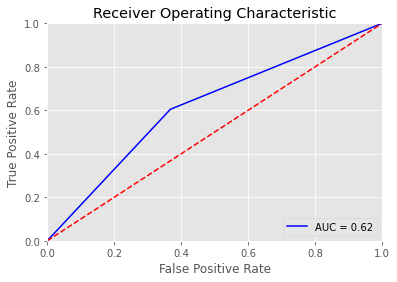

In [159]:
fpr, tpr, threshold = metrics.roc_curve(ytest_diab, y_lgbblindtest_diab)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Precision-Recall Curve

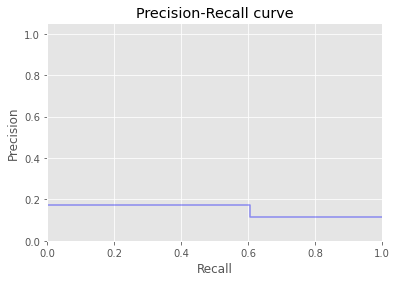

In [160]:
precision, recall, thresholds = precision_recall_curve(ytest_diab, y_lgbblindtest_diab)

thresholds = np.append(thresholds, 1)
f1_scores = 2*(precision*recall)/(precision+recall)
plt.step(recall, precision, color='b', alpha=0.4, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')
plt.show()

### DR - LGBM RandomizedSearchCV
[Summary of Contents](#Summary-of-Contents)

In [169]:
lgb_random_grid_diab ={'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

In [170]:
lgb_rand_diab = lgb.LGBMClassifier(random_state=42)
lgb_randcv_diab = RandomizedSearchCV(estimator = lgb_rand_diab, 
                          param_distributions = lgb_random_grid_diab,
                          n_iter=50, scoring='roc_auc', cv=3, refit=True,
                             random_state=42, verbose=True)

In [171]:
lgb_randcv_diab.fit(Xtrain_diab, ytrain_diab)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=LGBMClassifier(random_state=42), n_iter=50,
                   param_distributions={'colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000218750DD348>,
                                        'min_child_samples': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021874FD9608>,
                                        'min_child_weight': [1e-05, 0.001, 0.01,
                                                             0.1, 1, 10.0,
                                                             100.0, 1000.0,
                                                             10000.0],
                                        'num_leaves': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000218750DDE48>,
                                        'reg_alpha': [0, 0.1, 1, 2, 5, 7, 10,
                                                      50, 100],
                                        'reg_lambda': [0, 0.1, 1, 5, 10, 

In [172]:
y_lgbrandcv_diabpred = lgb_randcv_diab.predict(Xtest_diab)

In [173]:
print_report(ytest_diab, y_lgbrandcv_diabpred, threshold)
print(classification_report(ytest_diab, y_lgbrandcv_diabpred))
matrix = confusion_matrix(ytest_diab, y_lgbrandcv_diabpred)
print("Confusion Matrix \n", matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis])

AUC: 0.623
Accuracy: 0.634
Recall: 0.610
Precision: 0.176
F1-score: 0.273
Specificity: 0.637
 
              precision    recall  f1-score   support

           0       0.93      0.64      0.76     17631
           1       0.18      0.61      0.27      2237

    accuracy                           0.63     19868
   macro avg       0.55      0.62      0.51     19868
weighted avg       0.84      0.63      0.70     19868

Confusion Matrix 
 [[0.6366627  0.3633373 ]
 [0.39025481 0.60974519]]


In [174]:
diab_lgbrandcv_bestparams = lgb_randcv_diab.best_params_
diab_lgbrandcv_bestparams

{'colsample_bytree': 0.9053708647569991,
 'min_child_samples': 143,
 'min_child_weight': 0.001,
 'num_leaves': 15,
 'reg_alpha': 2,
 'reg_lambda': 20,
 'subsample': 0.7818175966851368}

In [162]:
diab_random_lgb = lgb.LGBMClassifier(colsample_bytree = 0.7554487413172255,
 min_child_samples = 230, min_child_weight = 1,
 num_leaves = 12, reg_alpha = 5,
 reg_lambda = 0, subsample = 0.25204127438822366)

diab_random_lgb.fit(Xtrain_diab, ytrain_diab)
y_lgbrandom_diabpred = diab_random_lgb.predict(Xtest_diab)

In [163]:
print_report(ytest_diab, y_lgbrandom_diabpred, threshold)
print(classification_report(ytest_diab, y_lgbrandom_diabpred))

matrix = confusion_matrix(ytest_diab, y_lgbrandom_diabpred)
print("Confusion Matrix \n", matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis])

AUC: 0.621
Accuracy: 0.630
Recall: 0.610
Precision: 0.174
F1-score: 0.271
Specificity: 0.633
 
              precision    recall  f1-score   support

           0       0.93      0.63      0.75     17631
           1       0.17      0.61      0.27      2237

    accuracy                           0.63     19868
   macro avg       0.55      0.62      0.51     19868
weighted avg       0.84      0.63      0.70     19868

Confusion Matrix 
 [[0.63308944 0.36691056]
 [0.39025481 0.60974519]]


### ROC Curve

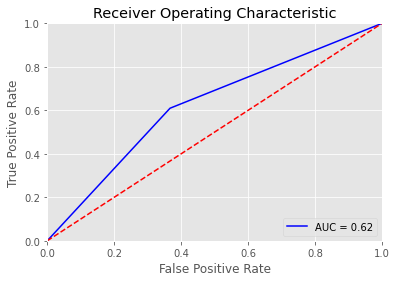

In [164]:
fpr, tpr, threshold = metrics.roc_curve(ytest_diab, y_lgbrandom_diabpred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Precision-Recall Curve

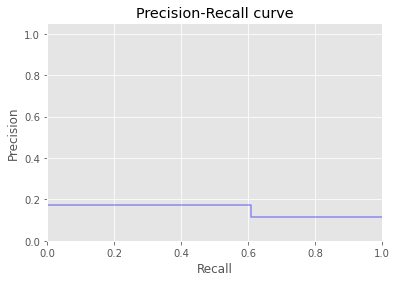

In [165]:
precision, recall, thresholds = precision_recall_curve(ytest_diab, y_lgbrandom_diabpred)

thresholds = np.append(thresholds, 1)
f1_scores = 2*(precision*recall)/(precision+recall)
plt.step(recall, precision, color='b', alpha=0.4, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')
plt.show()

### DR - LGBM GridSearchCV
[Summary of Contents](#Summary-of-Contents)

In [176]:
lgb_grid_param_diab = {'colsample_bytree': [0.5,1], # ok up to 1
 'min_child_samples': [200,300,400], # ok uip to 400
 'min_child_weight': [0.1,1], #ok up to 1
 'num_leaves': [10,20,30], #ok
 'reg_alpha': [2,4,6,8,10], #ok
 'reg_lambda': [0,10,50,100], #ok
 'subsample': [0.2,0.4,0.6,0.8]} #ok

lgb_grid_diab = lgb.LGBMClassifier(random_state=42)
lgb_gridcv_diab = GridSearchCV(estimator = lgb_grid_diab, param_grid = lgb_grid_param_diab,
                          cv = 3, n_jobs=-1, verbose = 10)

In [177]:
lgb_gridcv_diab.fit(Xtrain_diab, ytrain_diab)

Fitting 3 folds for each of 2880 candidates, totalling 8640 fits


GridSearchCV(cv=3, estimator=LGBMClassifier(random_state=42), n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 1],
                         'min_child_samples': [200, 300, 400],
                         'min_child_weight': [0.1, 1],
                         'num_leaves': [10, 20, 30],
                         'reg_alpha': [2, 4, 6, 8, 10],
                         'reg_lambda': [0, 10, 50, 100],
                         'subsample': [0.2, 0.4, 0.6, 0.8]},
             verbose=10)

In [178]:
y_lgbgridcv_diabpred = lgb_gridcv_diab.predict(Xtest_diab)

In [179]:
print_report(ytest_diab, y_lgbgridcv_diabpred, threshold)
print(classification_report(ytest_diab, y_lgbgridcv_diabpred))
matrix = confusion_matrix(ytest_diab, y_lgbgridcv_diabpred)
print("Confusion Matrix \n", matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis])

AUC: 0.620
Accuracy: 0.627
Recall: 0.610
Precision: 0.173
F1-score: 0.269
Specificity: 0.630
 
              precision    recall  f1-score   support

           0       0.93      0.63      0.75     17631
           1       0.17      0.61      0.27      2237

    accuracy                           0.63     19868
   macro avg       0.55      0.62      0.51     19868
weighted avg       0.84      0.63      0.70     19868

Confusion Matrix 
 [[0.62957291 0.37042709]
 [0.39025481 0.60974519]]


In [180]:
diab_lgbgridcv_bestparams = lgb_gridcv_diab.best_params_
diab_lgbgridcv_bestparams

{'colsample_bytree': 0.5,
 'min_child_samples': 300,
 'min_child_weight': 0.1,
 'num_leaves': 10,
 'reg_alpha': 2,
 'reg_lambda': 100,
 'subsample': 0.2}

In [167]:
diab_gridcv_lgb = lgb.LGBMClassifier(colsample_bytree = 1,
 min_child_samples = 200, min_child_weight = 0.1,
 num_leaves = 20, reg_alpha = 2,
 reg_lambda = 10, subsample = 0.2)

diab_gridcv_lgb.fit(Xtrain_diab, ytrain_diab)
y_lgbgrid_diabpred = diab_gridcv_lgb.predict(Xtest_diab)

In [168]:
print_report(ytest_diab, y_lgbgrid_diabpred, threshold)
print(classification_report(ytest_diab, y_lgbgrid_diabpred))

matrix = confusion_matrix(ytest_diab, y_lgbgrid_diabpred)
print("Confusion Matrix \n", matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis])

AUC: 0.623
Accuracy: 0.631
Recall: 0.613
Precision: 0.175
F1-score: 0.272
Specificity: 0.633
 
              precision    recall  f1-score   support

           0       0.93      0.63      0.75     17631
           1       0.18      0.61      0.27      2237

    accuracy                           0.63     19868
   macro avg       0.55      0.62      0.51     19868
weighted avg       0.84      0.63      0.70     19868

Confusion Matrix 
 [[0.63348647 0.36651353]
 [0.38712561 0.61287439]]


### ROC Curve

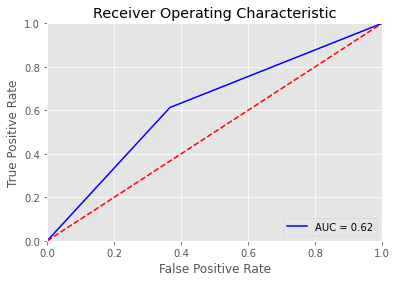

In [169]:
fpr, tpr, threshold = metrics.roc_curve(ytest_diab, y_lgbgrid_diabpred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Precision-Recall Curve

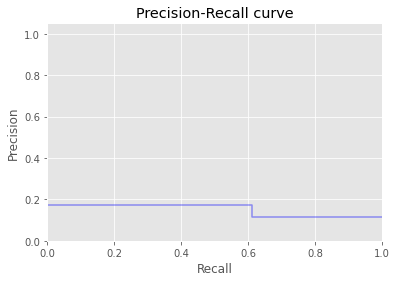

In [170]:
precision, recall, thresholds = precision_recall_curve(ytest_diab, y_lgbgrid_diabpred)

thresholds = np.append(thresholds, 1)
f1_scores = 2*(precision*recall)/(precision+recall)
plt.step(recall, precision, color='b', alpha=0.4, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')
plt.show()

## 8. Final Model (FM)

### 8.1 Credit Card Default FM
### 8.1.1 CCD Random Forest Final Model
[Summary of Contents](#Summary-of-Contents)

In [171]:
credit_gridcv_rf = RandomForestClassifier(bootstrap = True,
 max_depth = 10, max_features = 'sqrt',
 min_samples_leaf = 1, min_samples_split = 6, n_estimators = 800)
credit_gridcv_rf.fit(Xtrain_credit, ytrain_credit)

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_split=6,
                       n_estimators=800)

### Feature Importance - CCD RF

Text(0, 0.5, 'Feature Names')

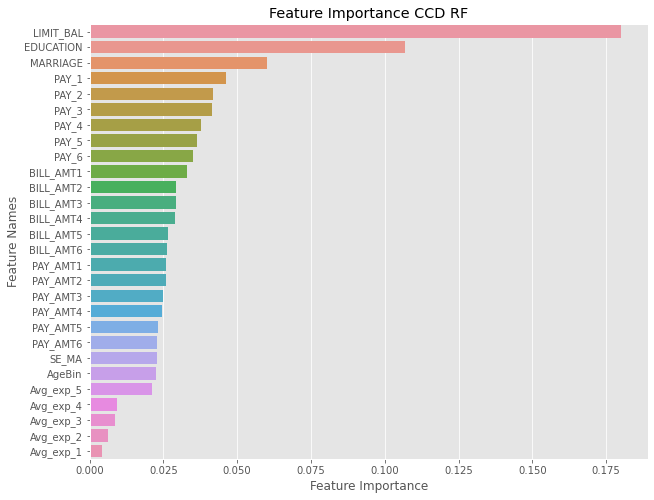

In [283]:
importances = credit_gridcv_rf.feature_importances_
forest_importances = pd.Series(importances, index=Xtrain_credit.columns).sort_values(ascending=False)

plt.figure(figsize=(10,8))
sns.barplot(x = forest_importances, y = Xtrain_credit.columns)
plt.title('Feature Importance CCD RF')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')

### Feature Importance & Mutual Info - CCD RF

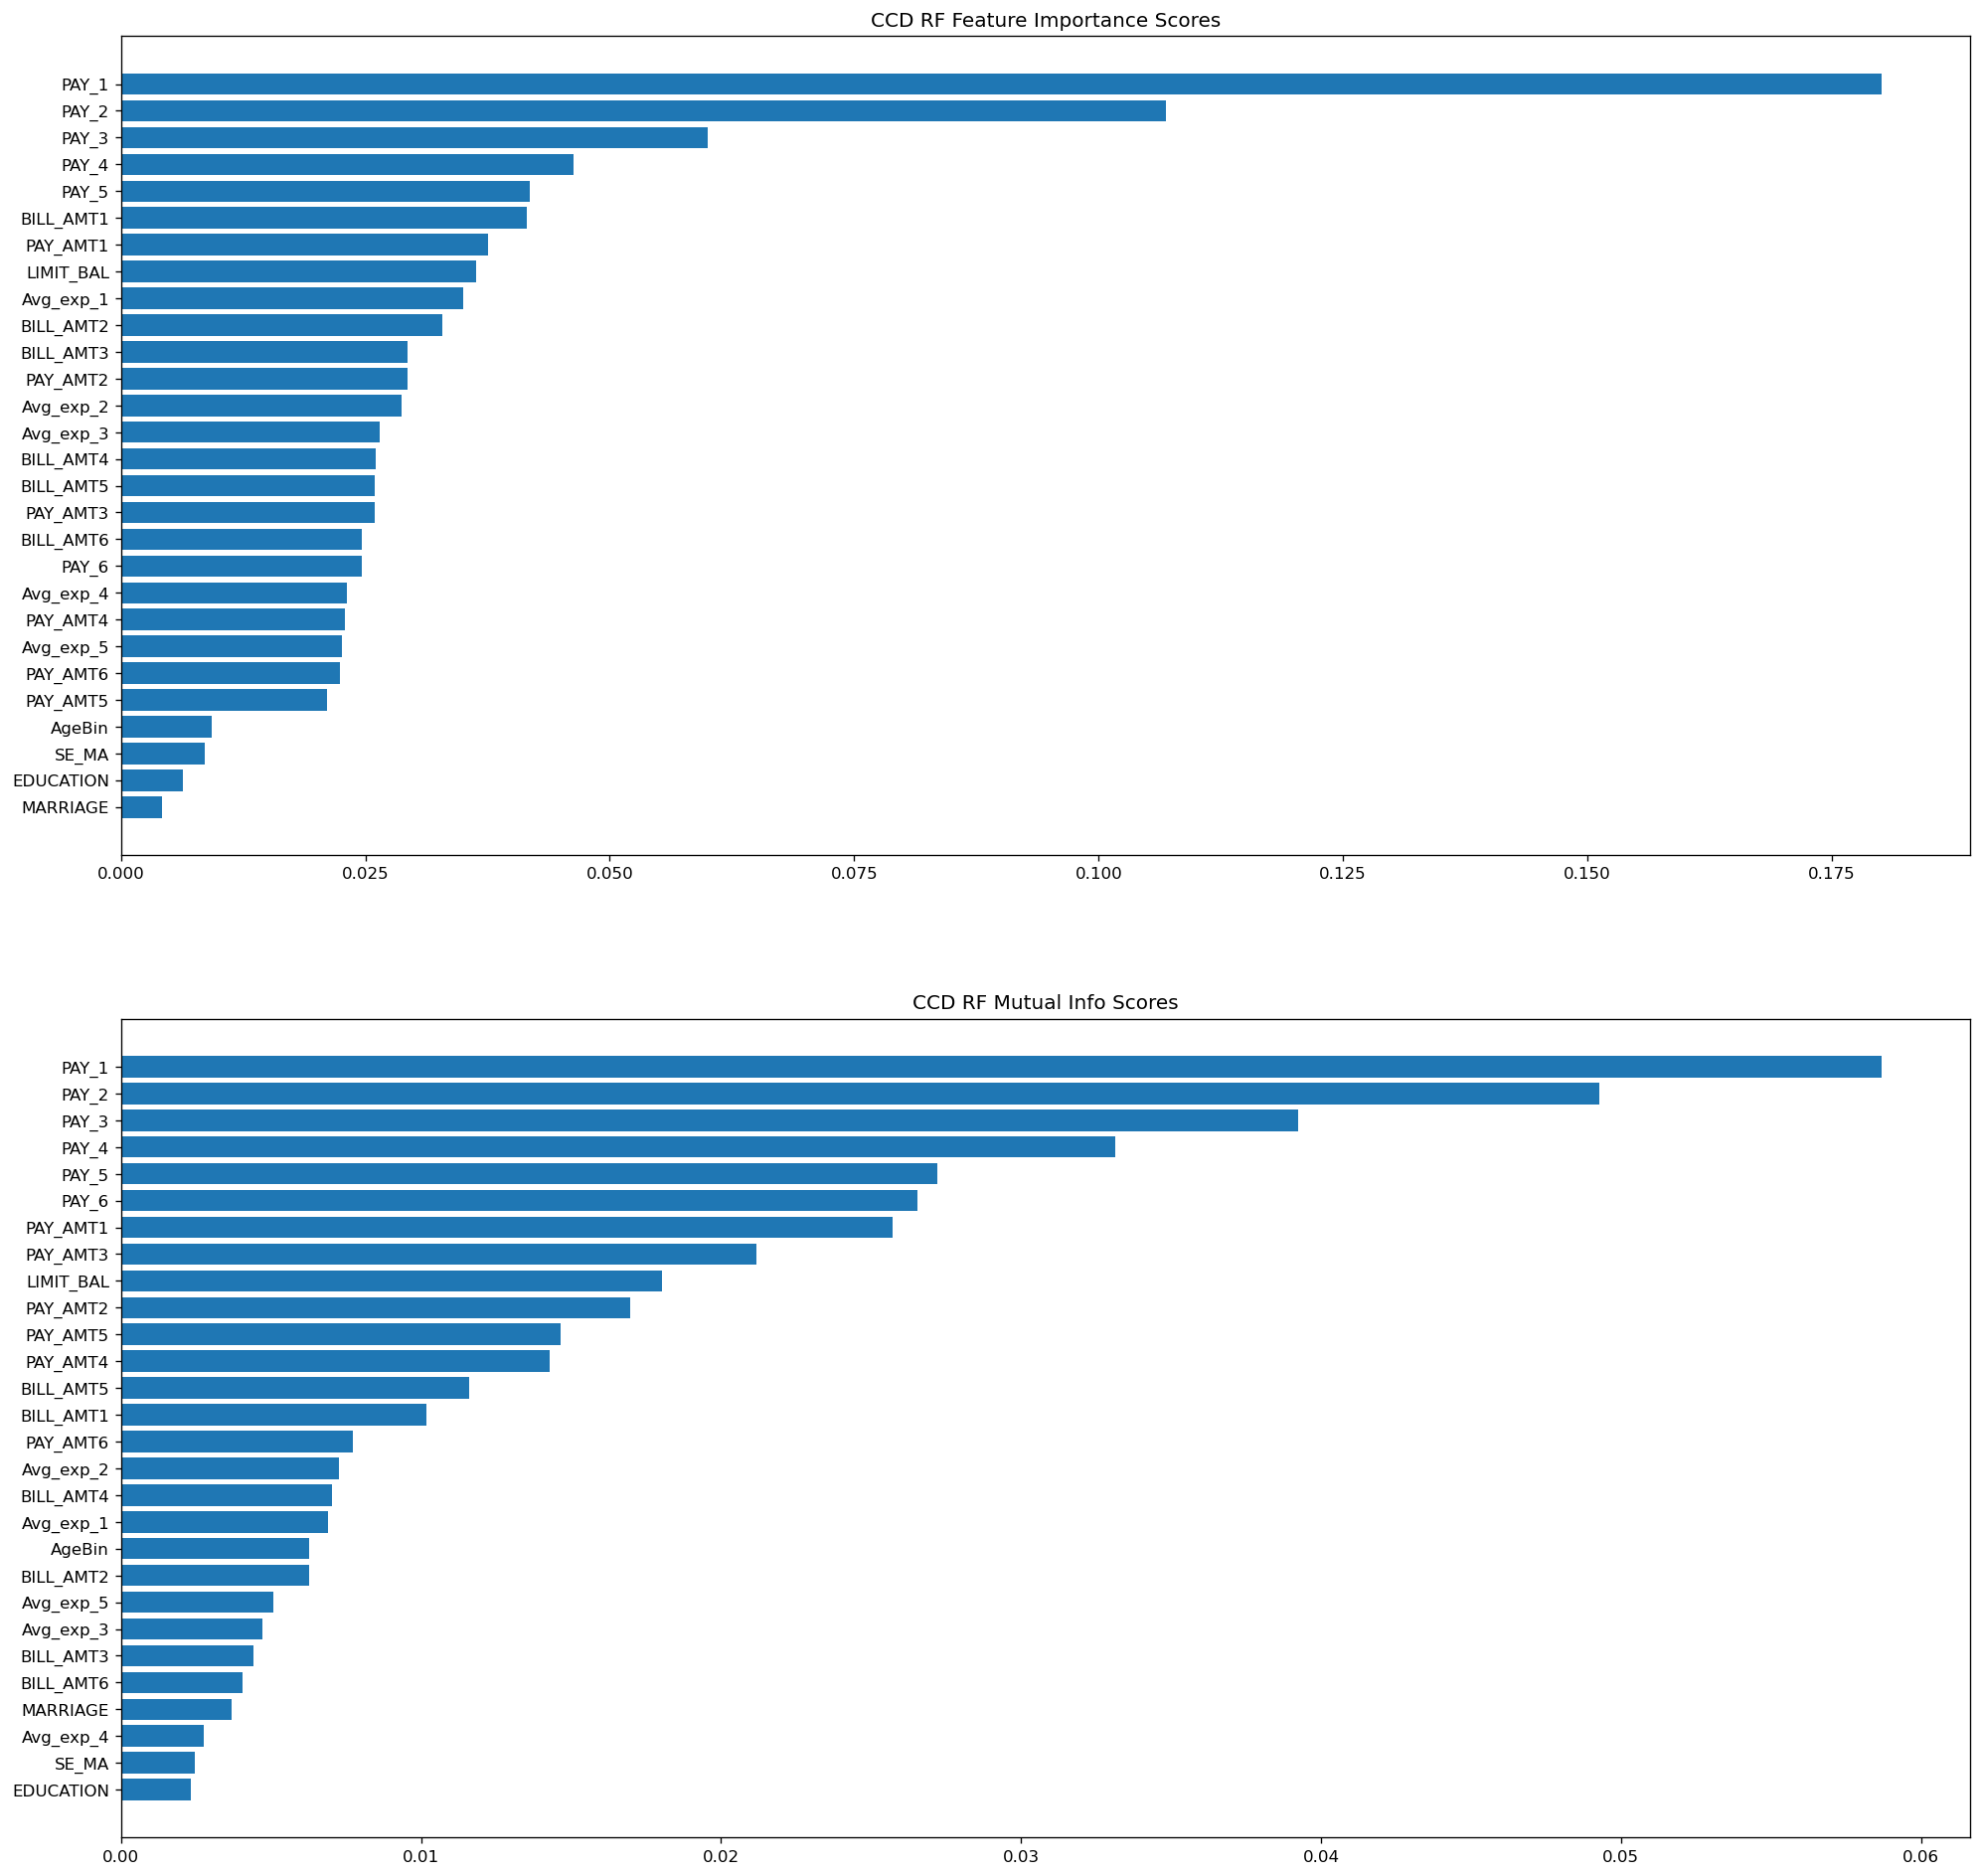

In [131]:
FI_credit_rf = pd.Series(credit_gridcv_rf.feature_importances_, index = Xtrain_credit.columns).sort_values(ascending = False)
MI_credit_rf = mutual_info_classif(Xtrain_credit, ytrain_credit, discrete_features=Xtrain_credit.dtypes == int)
MI_credit_rf = pd.Series(MI_credit_rf, name='MI Scores', index=Xtrain_credit.columns).sort_values(ascending = False)

figure(figsize=(20,20), dpi = 120)
plt.subplot(2,1,1)
plt.title("CCD RF Feature Importance Scores")
plot_scores(FI_credit_rf)

plt.subplot(2,1,2)
plt.title("CCD RF Mutual Info Scores")
plot_scores(MI_credit_rf)

plt.show()

### Performance across Label - CCD RF

In [172]:
predict_credit_rf = credit_gridcv_rf.predict(Xtest_credit)
y_credit_rf = (pd.DataFrame(predict_credit_rf, columns = ['def_pay'])).copy()
credit_rf = Xtest_credit.join(y_credit_rf)

#### Label = 0

In [148]:
credit_rf_0 = credit_rf[credit_rf['def_pay'] == 0.0]
credit_rf_0.describe().T

count           mean            std           min           25%  \
LIMIT_BAL  1036.0  165424.710425  128691.343760  10000.000000  50000.000000   
EDUCATION  1036.0       1.818533       0.732862      1.000000      1.000000   
MARRIAGE   1036.0       1.573359       0.530631      1.000000      1.000000   
PAY_1      1036.0       0.237452       0.425727      0.000000      0.000000   
PAY_2      1036.0       0.138996       0.346110      0.000000      0.000000   
PAY_3      1036.0       0.144788       0.352057      0.000000      0.000000   
PAY_4      1036.0       0.106178       0.308214      0.000000      0.000000   
PAY_5      1036.0       0.104247       0.305728      0.000000      0.000000   
PAY_6      1036.0       0.106178       0.308214      0.000000      0.000000   
BILL_AMT1  1036.0   54595.298263   77429.828444 -14386.000000   3970.750000   
BILL_AMT2  1036.0   52447.901544   74920.317146 -13543.000000   2711.000000   
BILL_AMT3  1036.0   50166.913127   70894.063701  -4617.000000   3260.500000   
BILL_AMT4  1036.0   43829.487452   64980.096320  -3684.000000   2801.750000   
BILL_AMT5  1036.0   42276.469112   63392.538283  -4020.000000   1973.500000   
BILL_AMT6  1036.0   40467.436293   63271.874157 -51183.000000   1250.750000   
PAY_AMT1   1036.0    6457.073359   18325.130010      0.000000    685.250000   
PAY_AMT2   1036.0    6466.995174   21372.637869      0.000000    735.000000   
PAY_AMT3   1036.0    4676.875483   12023.853600      0.000000    326.000000   
PAY_AMT4   1036.0    4846.772201   11465.788760      0.000000    354.000000   
PAY_AMT5   1036.0    4768.965251   13584.385951      0.000000    316.000000   
PAY_AMT6   1036.0    6051.422780   24315.937200      0.000000     46.250000   
SE_MA      1036.0       3.331081       1.568851      1.000000      2.000000   
AgeBin     1036.0       2.013514       0.978913      1.000000      1.000000   
Avg_exp_5  1036.0       0.053507       0.141080     -0.541550      0.004216   
Avg_exp_4  1036.0       0.053425       0.105927     -0.236800      0.006876   
Avg_exp_3  1036.0       0.065325       0.098145     -0.149283      0.008502   
Avg_exp_2  1036.0       0.063608       0.083747     -0.108512      0.009982   
Avg_exp_1  1036.0       0.063608       0.076571     -0.084790      0.011455   
def_pay    1036.0       0.000000       0.000000      0.000000      0.000000   

                     50%            75%            max  
LIMIT_BAL  140000.000000  240000.000000  700000.000000  
EDUCATION       2.000000       2.000000       4.000000  
MARRIAGE        2.000000       2.000000       3.000000  
PAY_1           0.000000       0.000000       1.000000  
PAY_2           0.000000       0.000000       1.000000  
PAY_3           0.000000       0.000000       1.000000  
PAY_4           0.000000       0.000000       1.000000  
PAY_5           0.000000       0.000000       1.000000  
PAY_6           0.000000       0.000000       1.000000  
BILL_AMT1   24362.500000   71052.000000  506787.000000  
BILL_AMT2   24161.000000   68947.000000  511629.000000  
BILL_AMT3   23318.000000   64690.000000  478965.000000  
BILL_AMT4   18953.000000   51777.750000  542653.000000  
BILL_AMT5   18534.500000   50939.750000  483003.000000  
BILL_AMT6   17356.500000   50430.000000  527566.000000  
PAY_AMT1     2198.000000    5131.250000  302000.000000  
PAY_AMT2     2013.000000    5000.000000  344261.000000  
PAY_AMT3     1609.500000    4843.000000  160042.000000  
PAY_AMT4     1600.000000    4137.500000  125009.000000  
PAY_AMT5     1544.000000    4952.000000  200000.000000  
PAY_AMT6     1500.000000    4273.250000  528666.000000  
SE_MA           4.000000       5.000000       6.000000  
AgeBin          2.000000       3.000000       5.000000  
Avg_exp_5       0.013758       0.037421       1.666667  
Avg_exp_4       0.017182       0.049079       1.562500  
Avg_exp_3       0.024633       0.079799       1.054667  
Avg_exp_2       0.029370       0.088429       0.827875  
Avg_exp_1       0.032301       0.090074      

#### Label = 1

In [149]:
credit_rf_1 = credit_rf[credit_rf['def_pay'] == 1.0]
credit_rf_1.describe().T

count           mean            std       min           25%  \
LIMIT_BAL  143.0  152027.972028  127575.216370   10000.0  50000.000000   
EDUCATION  143.0       1.713287       0.698312       1.0      1.000000   
MARRIAGE   143.0       1.622378       0.486496       1.0      1.000000   
PAY_1      143.0       0.265734       0.443276       0.0      0.000000   
PAY_2      143.0       0.153846       0.362069       0.0      0.000000   
PAY_3      143.0       0.125874       0.332873       0.0      0.000000   
PAY_4      143.0       0.083916       0.278236       0.0      0.000000   
PAY_5      143.0       0.111888       0.316337       0.0      0.000000   
PAY_6      143.0       0.097902       0.298227       0.0      0.000000   
BILL_AMT1  143.0   46938.923077   58760.950779   -2000.0   3103.500000   
BILL_AMT2  143.0   47125.083916   57403.838738    -680.0   2597.500000   
BILL_AMT3  143.0   44154.937063   54758.953786   -1523.0   2714.000000   
BILL_AMT4  143.0   41472.132867   53185.827223   -1523.0   1175.000000   
BILL_AMT5  143.0   40697.167832   55824.690017   -2946.0   1337.500000   
BILL_AMT6  143.0   37171.496503   65932.531389 -339603.0    563.000000   
PAY_AMT1   143.0    4950.657343    9379.365823       0.0    673.000000   
PAY_AMT2   143.0    3002.034965    4872.899041       0.0    528.500000   
PAY_AMT3   143.0    2921.881119    4710.373348       0.0    414.000000   
PAY_AMT4   143.0    5640.748252   28866.044053       0.0      0.000000   
PAY_AMT5   143.0    4805.027972   18396.029806       0.0      0.000000   
PAY_AMT6   143.0    5660.643357   29728.229834       0.0      0.000000   
SE_MA      143.0       3.237762       1.592049       1.0      2.000000   
AgeBin     143.0       1.909091       0.829976       1.0      1.000000   
Avg_exp_5  143.0       0.075334       0.175894       0.0      0.004677   
Avg_exp_4  143.0       0.065559       0.108286       0.0      0.005503   
Avg_exp_3  143.0       0.067088       0.090552       0.0      0.008524   
Avg_exp_2  143.0       0.065454       0.080039       0.0      0.009225   
Avg_exp_1  143.0       0.062542       0.069491       0.0      0.010083   
def_pay    143.0       1.000000       0.000000       1.0      1.000000   

                     50%            75%            max  
LIMIT_BAL  120000.000000  200000.000000  710000.000000  
EDUCATION       2.000000       2.000000       4.000000  
MARRIAGE        2.000000       2.000000       2.000000  
PAY_1           0.000000       1.000000       1.000000  
PAY_2           0.000000       0.000000       1.000000  
PAY_3           0.000000       0.000000       1.000000  
PAY_4           0.000000       0.000000       1.000000  
PAY_5           0.000000       0.000000       1.000000  
PAY_6           0.000000       0.000000       1.000000  
BILL_AMT1   22578.000000   70362.000000  258364.000000  
BILL_AMT2   28048.000000   71705.000000  279322.000000  
BILL_AMT3   24056.000000   65080.500000  282092.000000  
BILL_AMT4   20270.000000   61342.000000  255409.000000  
BILL_AMT5   17825.000000   60320.000000  330982.000000  
BILL_AMT6   17357.000000   58866.500000  355339.000000  
PAY_AMT1     2500.000000    4677.500000   80004.000000  
PAY_AMT2     2000.000000    3500.000000   50000.000000  
PAY_AMT3     1788.000000    3184.500000   40420.000000  
PAY_AMT4     1700.000000    3250.000000  330982.000000  
PAY_AMT5     1500.000000    3072.000000  189600.000000  
PAY_AMT6     1156.000000    3582.500000  345293.000000  
SE_MA           4.000000       5.000000       5.000000  
AgeBin          2.000000       2.000000       4.000000  
Avg_exp_5       0.016000       0.059958       1.214029  
Avg_exp_4       0.023898       0.076359       0.608618  
Avg_exp_3       0.035233       0.088617       0.501483  
Avg_exp_2       0.037209       0.091508       0.478137  
Avg_exp_1       0.040089       0.090724       0.408470  
def_pay         1.000000       1.000000       1.000000

### FairML - CCD RF

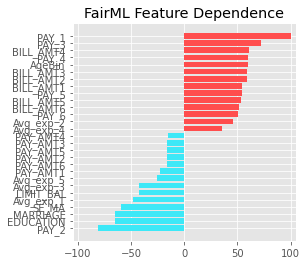

In [180]:
total, _ = audit_model(credit_gridcv_rf.predict, Xtest_credit)

fig = plot_dependencies(
    total.median(),
    reverse_values=False,
    title="FairML Feature Dependence")
plt.show()

### LIME - CCD RF

In [174]:
predict_ccd_rf = lambda x: credit_gridcv_rf.predict_proba(x).astype(float)
X = Xtrain_credit.values
ccd_rf_explainer = lime_tabular.LimeTabularExplainer(X, feature_names = Xtrain_credit.columns, class_names=['Default','Not Default'], kernel_width=5)

In [175]:
chosen_inst = Xtest_credit.iloc[[500]].values[0]
ccd_rf_exp = ccd_rf_explainer.explain_instance(chosen_inst, predict_ccd_rf, num_features = 10)
ccd_rf_exp.show_in_notebook(show_all=False)

### 8.1.2 CCD LGBM Final Model

In [117]:
credit_gridcv_lgb = lgb.LGBMClassifier(colsample_bytree = 0.5,
 min_child_samples = 100, min_child_weight = 1e-05,
 num_leaves = 20, reg_alpha = 2,
 reg_lambda = 10, subsample = 0.2)

credit_gridcv_lgb.fit(Xtrain_credit, ytrain_credit)

AUC: 0.656
Accuracy: 0.817
Recall: 0.369
Precision: 0.642
F1-score: 0.469
Specificity: 0.942
 
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4687
           1       0.64      0.37      0.47      1313

    accuracy                           0.82      6000
   macro avg       0.74      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000

Confusion Matrix 
 [[0.94239386 0.05760614]
 [0.63061691 0.36938309]]


### Feature Importance - CCD LGB

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

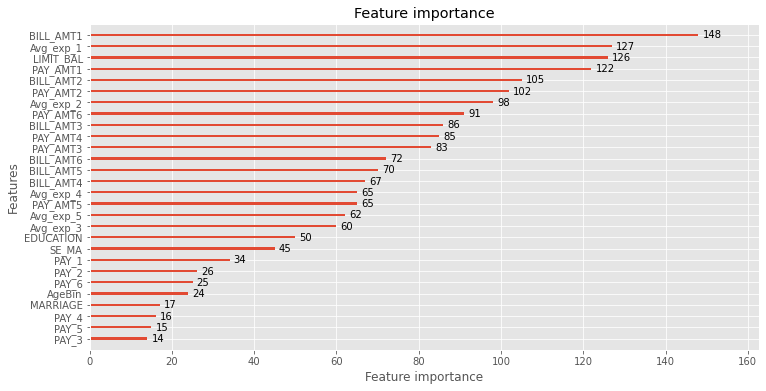

In [276]:
plot_importance(credit_gridcv_lgb)

### Feature Importance & Mutual Info - CCD LGB

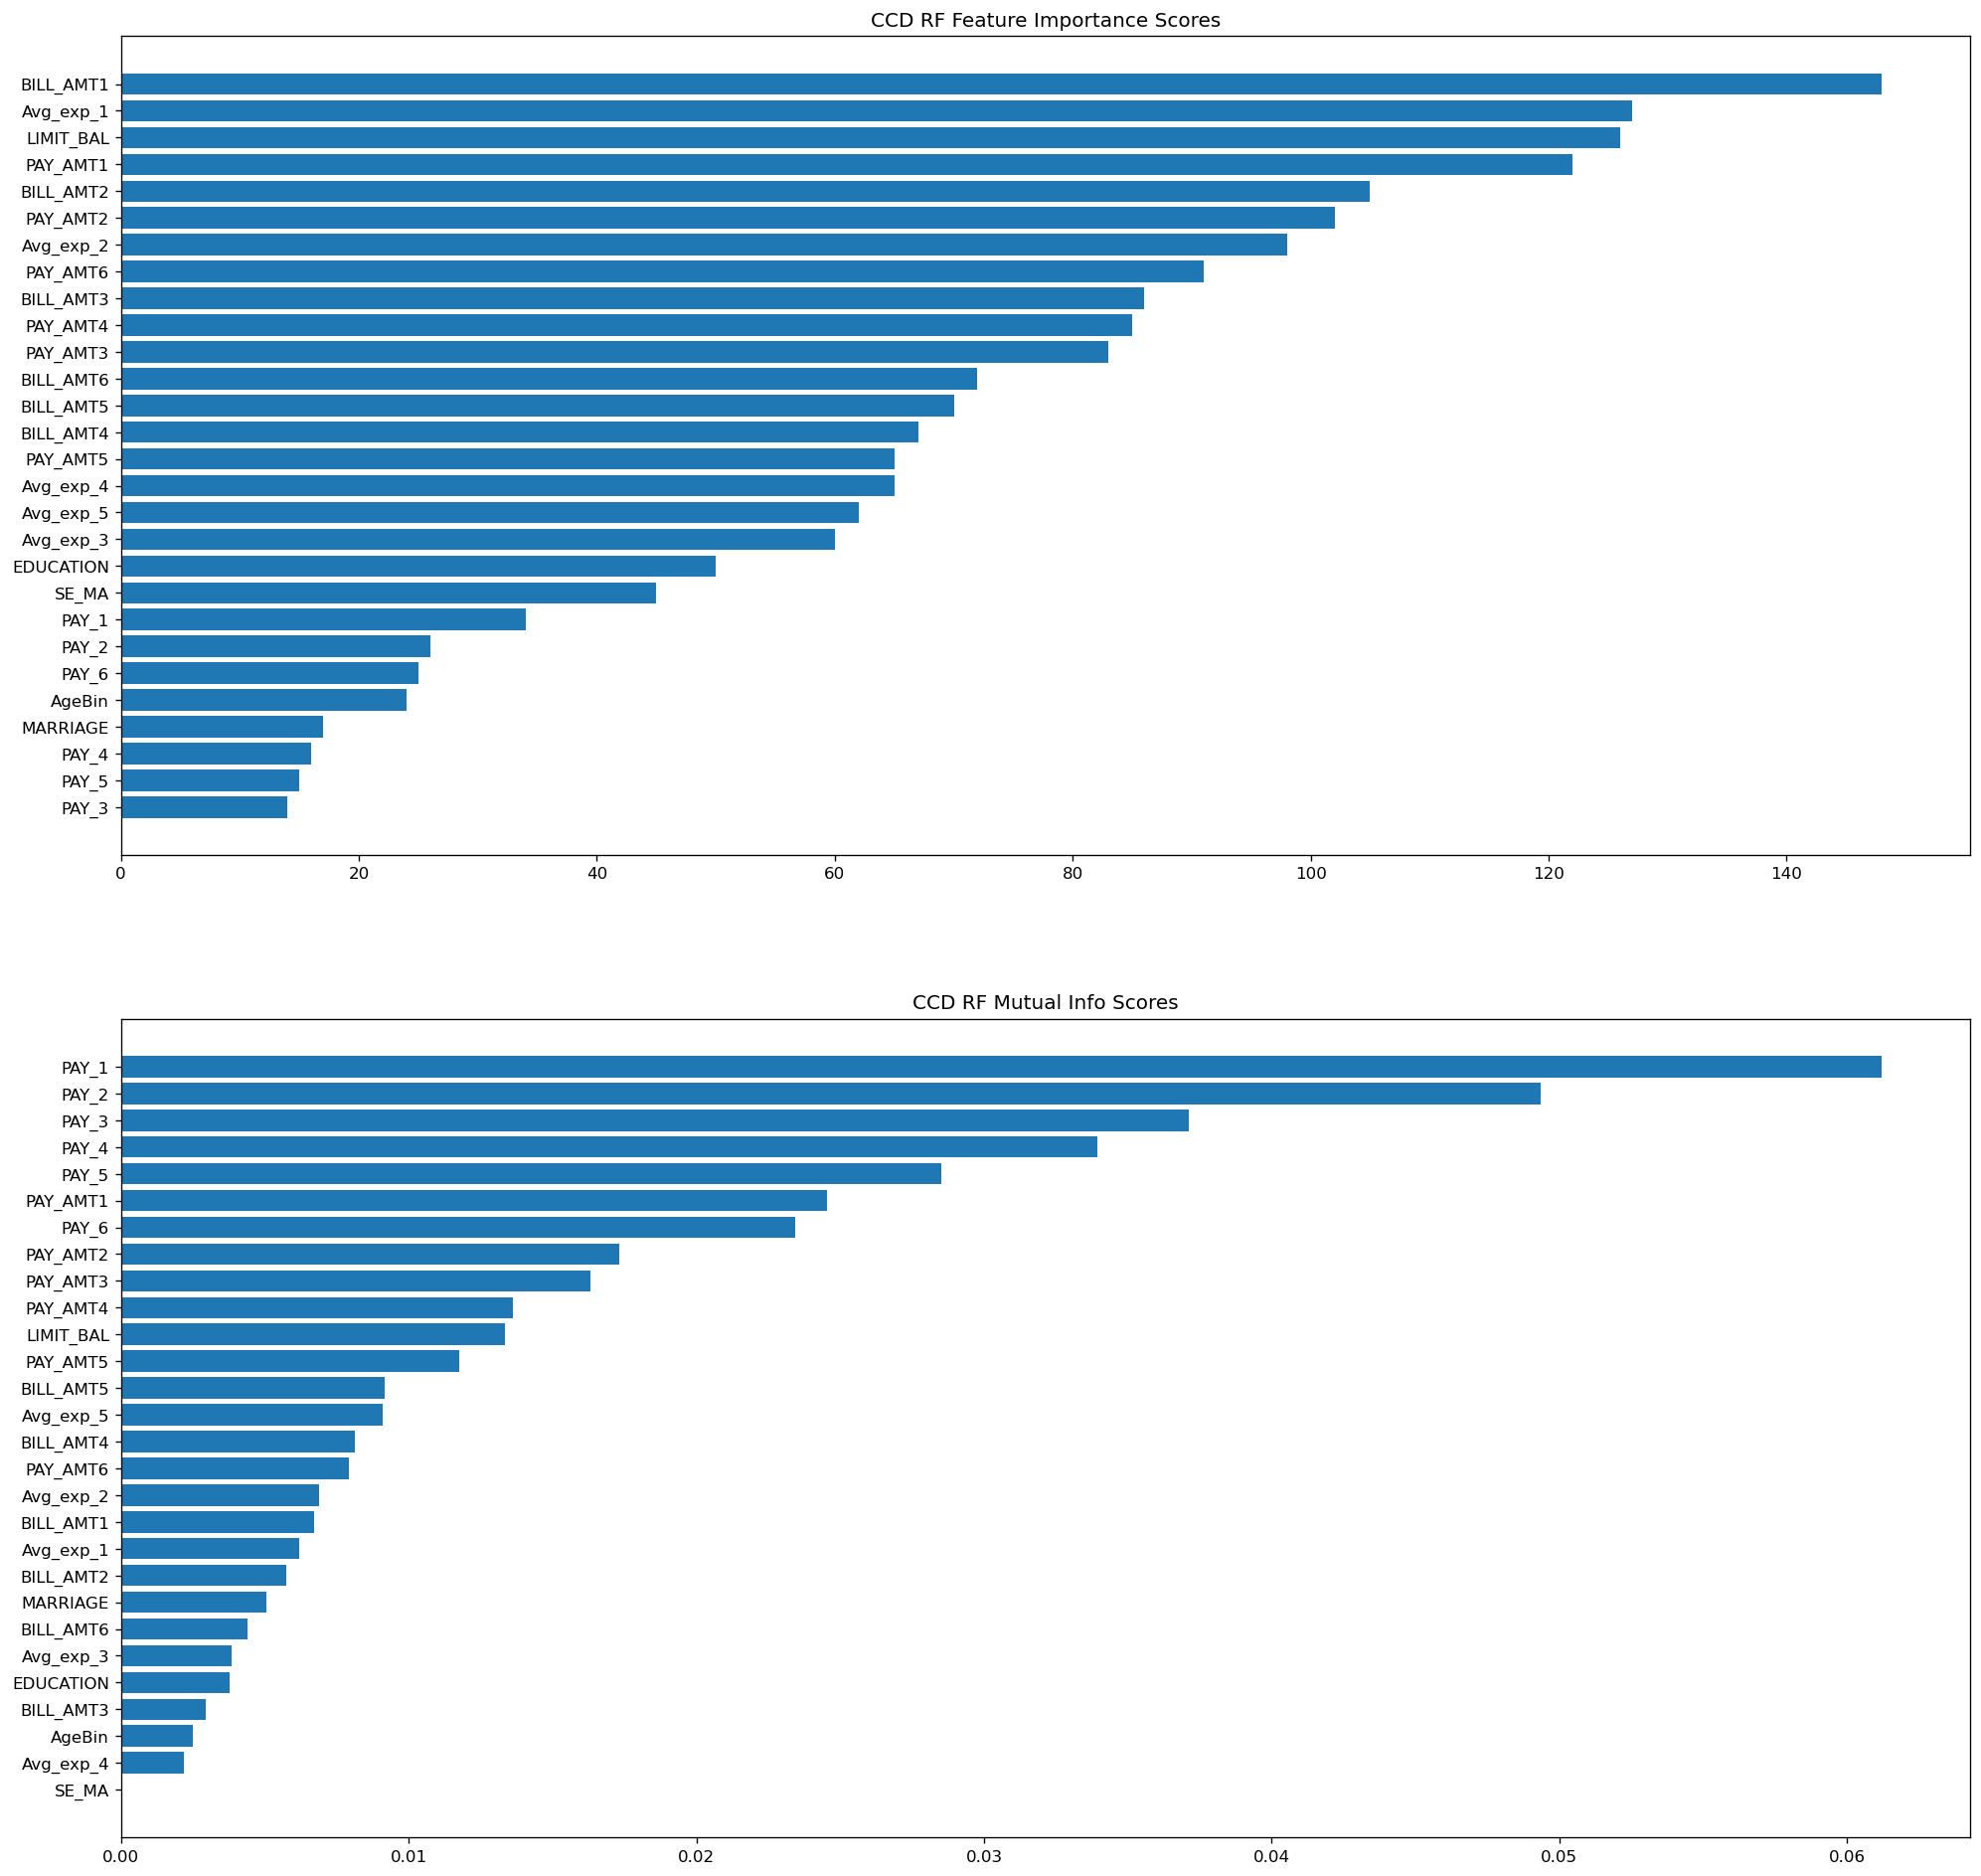

In [133]:
FI_credit_lgbm = pd.Series(credit_gridcv_lgb.feature_importances_, index = Xtrain_credit.columns).sort_values(ascending = False)
MI_credit_lgbm = mutual_info_classif(Xtrain_credit, ytrain_credit, discrete_features=Xtrain_credit.dtypes == int)
MI_credit_lgbm = pd.Series(MI_credit_lgbm, name='MI Scores', index=Xtrain_credit.columns).sort_values(ascending = False)

figure(figsize=(20,20), dpi = 120)
plt.subplot(2,1,1)
plt.title("CCD RF Feature Importance Scores")
plot_scores(FI_credit_lgbm)

plt.subplot(2,1,2)
plt.title("CCD RF Mutual Info Scores")
plot_scores(MI_credit_lgbm)

plt.show()

### Performance across Label - CCD LGB

In [154]:
predict_credit_lgb = credit_gridcv_lgb.predict(Xtest_credit)
y_credit_lgb = (pd.DataFrame(predict_credit_lgb, columns = ['def_pay'])).copy()
credit_lgb = Xtest_credit.join(y_credit_lgb)

#### Label = 0

In [155]:
credit_lgb_0 = credit_lgb[credit_lgb['def_pay'] == 0.0]
credit_lgb_0.describe().T

count           mean            std           min           25%  \
LIMIT_BAL  1030.0  164912.621359  128076.682782  10000.000000  50000.000000   
EDUCATION  1030.0       1.820388       0.737561      1.000000      1.000000   
MARRIAGE   1030.0       1.570874       0.531172      1.000000      1.000000   
PAY_1      1030.0       0.235922       0.424780      0.000000      0.000000   
PAY_2      1030.0       0.137864       0.344925      0.000000      0.000000   
PAY_3      1030.0       0.143689       0.350945      0.000000      0.000000   
PAY_4      1030.0       0.106796       0.309004      0.000000      0.000000   
PAY_5      1030.0       0.104854       0.306515      0.000000      0.000000   
PAY_6      1030.0       0.105825       0.307763      0.000000      0.000000   
BILL_AMT1  1030.0   54932.419417   77797.109713 -14386.000000   3975.750000   
BILL_AMT2  1030.0   52733.502913   75240.420638 -13543.000000   2721.750000   
BILL_AMT3  1030.0   50441.238835   71241.687104  -4617.000000   3239.500000   
BILL_AMT4  1030.0   44233.098058   65309.007459  -3684.000000   2806.250000   
BILL_AMT5  1030.0   42735.727184   63713.597265  -4020.000000   2002.000000   
BILL_AMT6  1030.0   40962.049515   63589.939386 -51183.000000   1281.250000   
PAY_AMT1   1030.0    6471.977670   18374.254329      0.000000    697.750000   
PAY_AMT2   1030.0    6390.274757   21348.873466      0.000000    727.500000   
PAY_AMT3   1030.0    4664.361165   12042.354676      0.000000    326.000000   
PAY_AMT4   1030.0    4864.572816   11494.466702      0.000000    369.750000   
PAY_AMT5   1030.0    4799.255340   13619.063630      0.000000    325.250000   
PAY_AMT6   1030.0    6097.169903   24453.849519      0.000000     61.000000   
SE_MA      1030.0       3.321359       1.570077      1.000000      2.000000   
AgeBin     1030.0       2.017476       0.977733      1.000000      1.000000   
Avg_exp_5  1030.0       0.052723       0.139047     -0.541550      0.004331   
Avg_exp_4  1030.0       0.052934       0.105331     -0.236800      0.006852   
Avg_exp_3  1030.0       0.063968       0.096683     -0.149283      0.008427   
Avg_exp_2  1030.0       0.062224       0.081855     -0.108512      0.009893   
Avg_exp_1  1030.0       0.062591       0.075332     -0.084790      0.011353   
def_pay    1030.0       0.000000       0.000000      0.000000      0.000000   

                     50%            75%            max  
LIMIT_BAL  140000.000000  237500.000000  700000.000000  
EDUCATION       2.000000       2.000000       4.000000  
MARRIAGE        2.000000       2.000000       3.000000  
PAY_1           0.000000       0.000000       1.000000  
PAY_2           0.000000       0.000000       1.000000  
PAY_3           0.000000       0.000000       1.000000  
PAY_4           0.000000       0.000000       1.000000  
PAY_5           0.000000       0.000000       1.000000  
PAY_6           0.000000       0.000000       1.000000  
BILL_AMT1   24199.500000   71782.250000  506787.000000  
BILL_AMT2   24070.500000   69253.500000  511629.000000  
BILL_AMT3   23218.500000   66309.750000  478965.000000  
BILL_AMT4   18981.000000   52362.250000  542653.000000  
BILL_AMT5   18678.000000   52006.250000  483003.000000  
BILL_AMT6   17675.500000   50591.750000  527566.000000  
PAY_AMT1     2164.000000    5150.750000  302000.000000  
PAY_AMT2     2000.000000    5000.000000  344261.000000  
PAY_AMT3     1601.000000    4823.250000  160042.000000  
PAY_AMT4     1608.500000    4156.500000  125009.000000  
PAY_AMT5     1582.000000    4989.500000  200000.000000  
PAY_AMT6     1500.000000    4188.250000  528666.000000  
SE_MA           4.000000       5.000000       6.000000  
AgeBin          2.000000       3.000000       5.000000  
Avg_exp_5       0.013775       0.037570       1.666667  
Avg_exp_4       0.017163       0.049093       1.562500  
Avg_exp_3       0.024199       0.078049       1.054667  
Avg_exp_2       0.029294       0.085896       0.827875  
Avg_exp_1       0.032194       0.088190      

#### Label = 1

In [156]:
credit_lgb_1 = credit_lgb[credit_lgb['def_pay'] == 1.0]
credit_lgb_1.describe().T

count           mean            std       min           25%  \
LIMIT_BAL  149.0  156107.382550  132168.562569   10000.0  50000.000000   
EDUCATION  149.0       1.704698       0.662748       1.0      1.000000   
MARRIAGE   149.0       1.637584       0.482319       1.0      1.000000   
PAY_1      149.0       0.275168       0.448105       0.0      0.000000   
PAY_2      149.0       0.161074       0.368839       0.0      0.000000   
PAY_3      149.0       0.134228       0.342047       0.0      0.000000   
PAY_4      149.0       0.080537       0.273040       0.0      0.000000   
PAY_5      149.0       0.107383       0.310643       0.0      0.000000   
PAY_6      149.0       0.100671       0.301908       0.0      0.000000   
BILL_AMT1  149.0   44916.798658   55866.628342   -2000.0   3093.000000   
BILL_AMT2  149.0   45365.134228   55057.018802    -680.0   2552.000000   
BILL_AMT3  149.0   42500.684564   52081.050049   -1523.0   2958.000000   
BILL_AMT4  149.0   38777.000000   50653.928179   -1523.0   1346.000000   
BILL_AMT5  149.0   37586.026846   53366.991118   -2946.0    854.000000   
BILL_AMT6  149.0   33885.080537   63386.053267 -339603.0    339.000000   
PAY_AMT1   149.0    4908.288591    9233.718890       0.0    586.000000   
PAY_AMT2   149.0    3671.912752    7214.835389       0.0    664.000000   
PAY_AMT3   149.0    3079.060403    4945.512200       0.0    422.000000   
PAY_AMT4   149.0    5485.724832   28291.617814       0.0      0.000000   
PAY_AMT5   149.0    4594.187919   18043.859585       0.0      0.000000   
PAY_AMT6   149.0    5360.140940   28719.292288       0.0      0.000000   
SE_MA      149.0       3.308725       1.584977       1.0      2.000000   
AgeBin     149.0       1.885906       0.842536       1.0      1.000000   
Avg_exp_5  149.0       0.079875       0.184948       0.0      0.003218   
Avg_exp_4  149.0       0.068467       0.111777       0.0      0.005556   
Avg_exp_3  149.0       0.076397       0.100523       0.0      0.010033   
Avg_exp_2  149.0       0.074952       0.092027       0.0      0.010138   
Avg_exp_1  149.0       0.069617       0.078334       0.0      0.010719   
def_pay    149.0       1.000000       0.000000       1.0      1.000000   

                     50%            75%            max  
LIMIT_BAL  110000.000000  210000.000000  710000.000000  
EDUCATION       2.000000       2.000000       4.000000  
MARRIAGE        2.000000       2.000000       2.000000  
PAY_1           0.000000       1.000000       1.000000  
PAY_2           0.000000       0.000000       1.000000  
PAY_3           0.000000       0.000000       1.000000  
PAY_4           0.000000       0.000000       1.000000  
PAY_5           0.000000       0.000000       1.000000  
PAY_6           0.000000       0.000000       1.000000  
BILL_AMT1   26847.000000   67670.000000  258364.000000  
BILL_AMT2   28983.000000   65062.000000  279322.000000  
BILL_AMT3   29325.000000   59730.000000  282092.000000  
BILL_AMT4   19858.000000   54990.000000  255409.000000  
BILL_AMT5   17356.000000   56197.000000  330982.000000  
BILL_AMT6   13470.000000   51365.000000  355339.000000  
PAY_AMT1     2500.000000    4210.000000   80004.000000  
PAY_AMT2     2020.000000    3885.000000   50189.000000  
PAY_AMT3     1889.000000    3400.000000   40420.000000  
PAY_AMT4     1500.000000    3300.000000  330982.000000  
PAY_AMT5     1300.000000    3000.000000  189600.000000  
PAY_AMT6     1004.000000    3800.000000  345293.000000  
SE_MA           4.000000       5.000000       5.000000  
AgeBin          2.000000       2.000000       4.000000  
Avg_exp_5       0.015800       0.059543       1.214029  
Avg_exp_4       0.025630       0.078933       0.608618  
Avg_exp_3       0.038482       0.108678       0.547917  
Avg_exp_2       0.038517       0.108694       0.478137  
Avg_exp_1       0.042072       0.110277       0.408470  
def_pay         1.000000       1.000000       1.000000

### FairML - CCD LGB

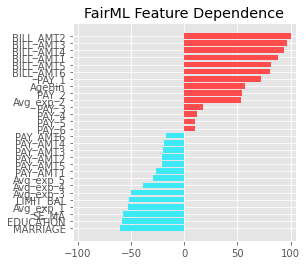

In [181]:
total, _ = audit_model(credit_gridcv_lgb.predict, Xtest_credit)

fig = plot_dependencies(
    total.median(),
    reverse_values=False,
    title="FairML Feature Dependence")
plt.show()

### LIME - CCD LGB

In [178]:
%matplotlib inline
predict_ccd_lgb = lambda x: credit_gridcv_lgb.predict_proba(x).astype(float)
X = Xtrain_credit.values
ccd_lgb_explainer = lime_tabular.LimeTabularExplainer(X, feature_names = Xtrain_credit.columns, class_names=['Default','Not Default'], kernel_width=5)

chosen_inst = Xtest_credit.iloc[[500]].values[0]
ccd_lgb_exp = ccd_lgb_explainer.explain_instance(chosen_inst, predict_ccd_lgb, num_features = 10)
ccd_lgb_exp.show_in_notebook(show_all=False)

### 8.2 Diabetes Readmission FM
### 8.2.1 DR Random Forest Final Model
[Summary of Contents](#Summary-of-Contents)

In [115]:
diab_gridcv_rf = RandomForestClassifier(bootstrap = True,
 max_depth = 70, max_features = 'sqrt',
 min_samples_leaf = 3, min_samples_split = 6, n_estimators = 500)

diab_gridcv_rf.fit(Xtrain_diab, ytrain_diab)

AUC: 0.621
Accuracy: 0.620
Recall: 0.622
Precision: 0.172
F1-score: 0.269
Specificity: 0.619
 
              precision    recall  f1-score   support

           0       0.93      0.62      0.74     17631
           1       0.17      0.62      0.27      2237

    accuracy                           0.62     19868
   macro avg       0.55      0.62      0.51     19868
weighted avg       0.84      0.62      0.69     19868

Confusion Matrix 
 [[0.6193069  0.3806931 ]
 [0.37818507 0.62181493]]


### Feature Importance - DR RF

Text(0, 0.5, 'Feature Names')

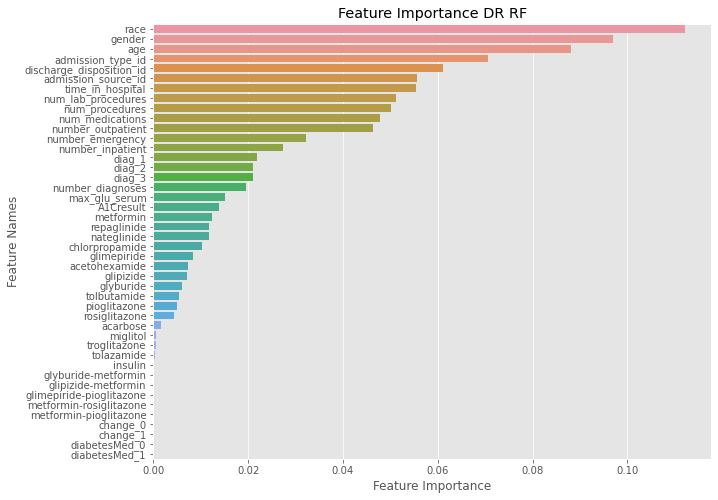

In [284]:
importances = diab_gridcv_rf.feature_importances_
forest_importances = pd.Series(importances, index=Xtrain_diab.columns).sort_values(ascending=False)

plt.figure(figsize=(10,8))
sns.barplot(x = forest_importances, y = Xtrain_diab.columns)
plt.title('Feature Importance DR RF')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')

### Feature Importance & Mutual Info - DR RF

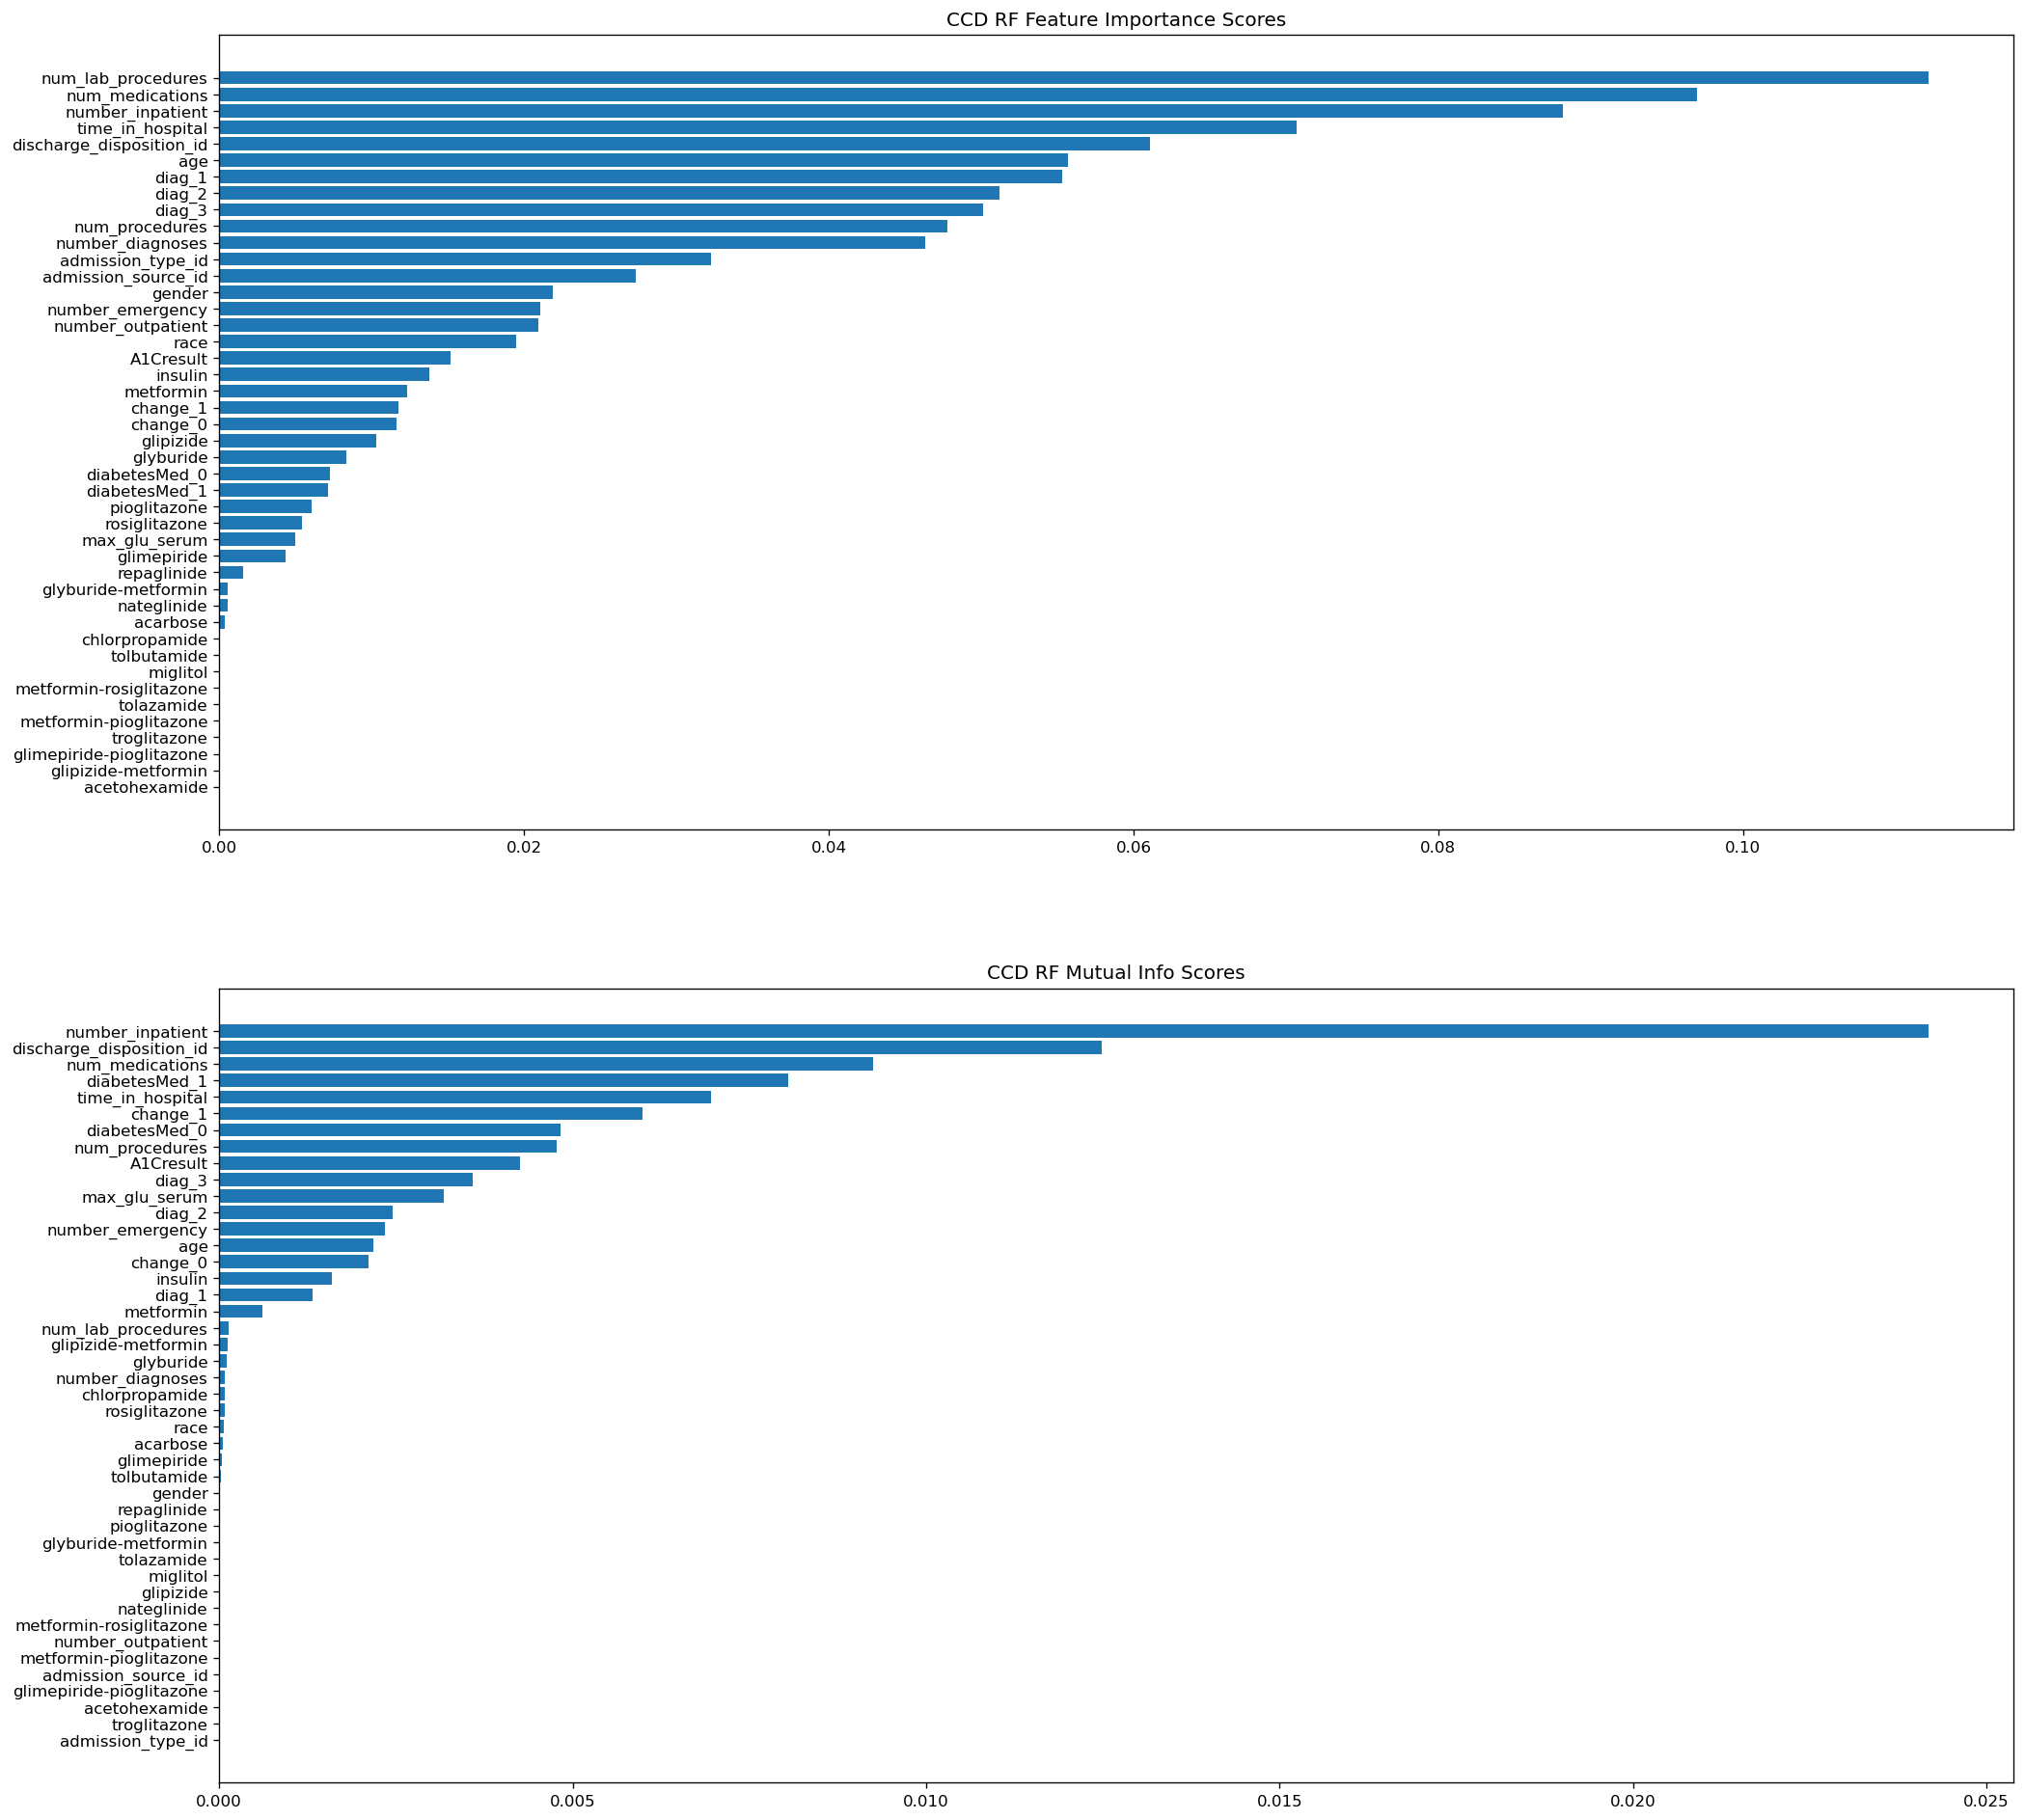

In [134]:
FI_diab_rf = pd.Series(diab_gridcv_rf.feature_importances_, index = Xtrain_diab.columns).sort_values(ascending = False)
MI_diab_rf = mutual_info_classif(Xtrain_diab, ytrain_diab, discrete_features=Xtrain_diab.dtypes == int)
MI_diab_rf = pd.Series(MI_diab_rf, name='MI Scores', index=Xtrain_diab.columns).sort_values(ascending = False)

figure(figsize=(20,20), dpi = 120)
plt.subplot(2,1,1)
plt.title("CCD RF Feature Importance Scores")
plot_scores(FI_diab_rf)

plt.subplot(2,1,2)
plt.title("CCD RF Mutual Info Scores")
plot_scores(MI_diab_rf)

plt.show()

### Performance across Label - DR RF

In [158]:
predict_diab_rf = diab_gridcv_rf.predict(Xtest_diab)
y_diab_rf = (pd.DataFrame(predict_diab_rf, columns = ['readmitted'])).copy()
diab_rf = Xtest_diab.join(y_diab_rf)

In [ ]:
predict_diab_rf

#### Label = 0

In [159]:
diab_rf_0 = diab_rf[diab_rf['readmitted'] == 0.0]
diab_rf_0.describe().T

count       mean        std   min   25%   50%  \
race                      2317.0   0.322831   0.668345   0.0   0.0   0.0   
gender                    2317.0   0.529996   0.499207   0.0   0.0   1.0   
age                       2317.0   5.756150   1.718188   0.0   5.0   6.0   
admission_type_id         2317.0   2.334916   1.729320   1.0   1.0   2.0   
discharge_disposition_id  2317.0   5.695727   7.184783   1.0   1.0   1.0   
admission_source_id       2317.0   6.697454   5.045087   1.0   2.0   7.0   
time_in_hospital          2317.0   4.769530   3.219310   1.0   2.0   4.0   
num_lab_procedures        2317.0  45.096677  18.164409   1.0  34.0  46.0   
num_procedures            2317.0   1.432024   1.744785   0.0   0.0   1.0   
num_medications           2317.0  15.166163   8.177992   1.0  10.0  14.0   
number_outpatient         2317.0   0.120846   0.601582   0.0   0.0   0.0   
number_emergency          2317.0   0.055244   0.362852   0.0   0.0   0.0   
number_inpatient          2317.0   0.566681   1.110662   0.0   0.0   0.0   
diag_1                    2317.0   4.309452   3.654978   0.0   0.0   4.0   
diag_2                    2317.0   4.152352   3.755895   0.0   0.0   3.0   
diag_3                    2317.0   4.185585   3.677653   0.0   0.0   3.0   
number_diagnoses          2317.0   6.711696   2.054253   1.0   5.0   7.0   
max_glu_serum             2317.0 -88.948209  29.997149 -99.0 -99.0 -99.0   
A1Cresult                 2317.0 -80.049202  39.149973 -99.0 -99.0 -99.0   
metformin                 2317.0   0.182564   0.386392   0.0   0.0   0.0   
repaglinide               2317.0   0.008632   0.092526   0.0   0.0   0.0   
nateglinide               2317.0   0.001295   0.035967   0.0   0.0   0.0   
chlorpropamide            2317.0   0.002590   0.050833   0.0   0.0   0.0   
glimepiride               2317.0   0.038412   0.192230   0.0   0.0   0.0   
acetohexamide             2317.0   0.000000   0.000000   0.0   0.0   0.0   
glipizide                 2317.0   0.128615   0.334845   0.0   0.0   0.0   
glyburide                 2317.0   0.156668   0.363566   0.0   0.0   0.0   
tolbutamide               2317.0   0.000863   0.029374   0.0   0.0   0.0   
pioglitazone              2317.0   0.036685   0.188029   0.0   0.0   0.0   
rosiglitazone             2317.0   0.058697   0.235107   0.0   0.0   0.0   
acarbose                  2317.0   0.003884   0.062217   0.0   0.0   0.0   
miglitol                  2317.0   0.000000   0.000000   0.0   0.0   0.0   
troglitazone              2317.0   0.000000   0.000000   0.0   0.0   0.0   
tolazamide                2317.0   0.001295   0.035967   0.0   0.0   0.0   
insulin                   2317.0   0.444109   0.496974   0.0   0.0   0.0   
glyburide-metformin       2317.0   0.000863   0.029374   0.0   0.0   0.0   
glipizide-metformin       2317.0   0.000000   0.000000   0.0   0.0   0.0   
glimepiride-pioglitazone  2317.0   0.000000   0.000000   0.0   0.0   0.0   
metformin-rosiglitazone   2317.0   0.000000   0.000000   0.0   0.0   0.0   
metformin-pioglitazone    2317.0   0.000000   0.000000   0.0   0.0   0.0   
change_0                  2317.0   0.633578   0.481931   0.0   0.0   1.0   
change_1                  2317.0   0.366422   0.481931   0.0   0.0   0.0   
diabetesMed_0             2317.0   0.258524   0.437918   0.0   0.0   0.0   
diabetesMed_1             2317.0   0.741476   0.437918   0.0   0.0   1.0   
readmitted                2317.0   0.000000   0.000000   0.0   0.0   0.0   

                           75%    max  
race                       1.0    4.0  
gender                     1.0    1.0  
age                        7.0    9.0  
admission_type_id          3.0    8.0  
discharge_disposition_id   6.0   25.0  
admission_source_id        7.0   20.0  
time_in_hospital           7.0   14.0  
num_lab_procedures        58.0  111.0  
num_procedures             2.0    6.0  
num_medications           19.0   62.0  
number_outpatient          0.0   12.0  
number_emergency           0.0    7.0  
number_inp

#### Label = 1

In [160]:
diab_rf_1 = diab_rf[diab_rf['readmitted'] == 1.0]
diab_rf_1.describe().T

count       mean        std   min   25%   50%  \
race                      1591.0   0.323067   0.645226   0.0   0.0   0.0   
gender                    1591.0   0.541798   0.498407   0.0   0.0   1.0   
age                       1591.0   5.802640   1.681200   0.0   5.0   6.0   
admission_type_id         1591.0   2.312382   1.754015   1.0   1.0   1.0   
discharge_disposition_id  1591.0   6.381521   7.689142   1.0   1.0   1.0   
admission_source_id       1591.0   6.635449   4.836871   1.0   2.0   7.0   
time_in_hospital          1591.0   4.815211   3.159061   1.0   2.0   4.0   
num_lab_procedures        1591.0  46.407291  18.425203   1.0  34.0  46.0   
num_procedures            1591.0   1.499686   1.795478   0.0   0.0   1.0   
num_medications           1591.0  15.470145   8.550123   1.0  10.0  14.0   
number_outpatient         1591.0   0.120050   0.679470   0.0   0.0   0.0   
number_emergency          1591.0   0.072282   0.500746   0.0   0.0   0.0   
number_inpatient          1591.0   0.600251   1.216180   0.0   0.0   0.0   
diag_1                    1591.0   4.185418   3.727199   0.0   0.0   4.0   
diag_2                    1591.0   4.034569   3.749641   0.0   0.0   3.0   
diag_3                    1591.0   4.237586   3.701113   0.0   0.0   4.0   
number_diagnoses          1591.0   6.736015   2.068501   1.0   5.0   7.0   
max_glu_serum             1591.0 -89.808297  28.817977 -99.0 -99.0 -99.0   
A1Cresult                 1591.0 -78.861094  40.070600 -99.0 -99.0 -99.0   
metformin                 1591.0   0.191703   0.393765   0.0   0.0   0.0   
repaglinide               1591.0   0.010057   0.099808   0.0   0.0   0.0   
nateglinide               1591.0   0.001886   0.043396   0.0   0.0   0.0   
chlorpropamide            1591.0   0.001257   0.035444   0.0   0.0   0.0   
glimepiride               1591.0   0.025770   0.158498   0.0   0.0   0.0   
acetohexamide             1591.0   0.000000   0.000000   0.0   0.0   0.0   
glipizide                 1591.0   0.128221   0.334441   0.0   0.0   0.0   
glyburide                 1591.0   0.169705   0.375491   0.0   0.0   0.0   
tolbutamide               1591.0   0.000000   0.000000   0.0   0.0   0.0   
pioglitazone              1591.0   0.044626   0.206546   0.0   0.0   0.0   
rosiglitazone             1591.0   0.068510   0.252699   0.0   0.0   0.0   
acarbose                  1591.0   0.003771   0.061314   0.0   0.0   0.0   
miglitol                  1591.0   0.000000   0.000000   0.0   0.0   0.0   
troglitazone              1591.0   0.000629   0.025071   0.0   0.0   0.0   
tolazamide                1591.0   0.000629   0.025071   0.0   0.0   0.0   
insulin                   1591.0   0.456317   0.498245   0.0   0.0   0.0   
glyburide-metformin       1591.0   0.000000   0.000000   0.0   0.0   0.0   
glipizide-metformin       1591.0   0.000000   0.000000   0.0   0.0   0.0   
glimepiride-pioglitazone  1591.0   0.000000   0.000000   0.0   0.0   0.0   
metformin-rosiglitazone   1591.0   0.000000   0.000000   0.0   0.0   0.0   
metformin-pioglitazone    1591.0   0.000000   0.000000   0.0   0.0   0.0   
change_0                  1591.0   0.593966   0.491245   0.0   0.0   1.0   
change_1                  1591.0   0.406034   0.491245   0.0   0.0   0.0   
diabetesMed_0             1591.0   0.250157   0.433240   0.0   0.0   0.0   
diabetesMed_1             1591.0   0.749843   0.433240   0.0   0.5   1.0   
readmitted                1591.0   1.000000   0.000000   1.0   1.0   1.0   

                           75%   max  
race                       1.0   4.0  
gender                     1.0   1.0  
age                        7.0   9.0  
admission_type_id          3.0   8.0  
discharge_disposition_id   7.0  25.0  
admission_source_id        7.0  20.0  
time_in_hospital           6.0  14.0  
num_lab_procedures        59.0  98.0  
num_procedures             2.0   6.0  
num_medications           19.0  63.0  
number_outpatient          0.0  15.0  
number_emergency           0.0   9.0  
number_inpatient       

### FairML - DR RF

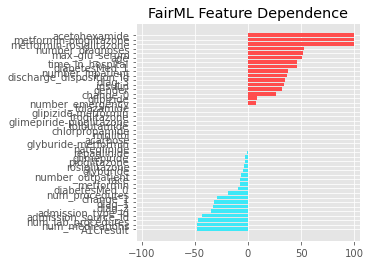

In [216]:
with mock.patch("sklearn.utils.validation._assert_all_finite"):
    total, _ = audit_model(diab_gridcv_rf.predict, Xtest_diab, include_interactions=True)
    
fig = plot_dependencies(
    total.median(),
    reverse_values=False,
    title="FairML Feature Dependence")
plt.show()

### LIME - DR RF

In [179]:
%matplotlib inline
predict_dr_rf = lambda x: diab_gridcv_rf.predict_proba(x).astype(float)
X = Xtrain_diab.values
dr_rf_explainer = lime_tabular.LimeTabularExplainer(X, feature_names = Xtrain_diab.columns, class_names=['Admitted','Not Admitted'], kernel_width=5)

chosen_inst = Xtest_diab.iloc[[500]].values[0]
dr_rf_exp = dr_rf_explainer.explain_instance(chosen_inst, predict_dr_rf, num_features = 10)
dr_rf_exp.show_in_notebook(show_all=False)

### 8.2.2 DR LGBM Final Model

In [114]:
diab_gridcv_lgb = lgb.LGBMClassifier(colsample_bytree = 1,
 min_child_samples = 200, min_child_weight = 0.1,
 num_leaves = 20, reg_alpha = 2,
 reg_lambda = 10, subsample = 0.2)

diab_gridcv_lgb.fit(Xtrain_diab, ytrain_diab)

AUC: 0.623
Accuracy: 0.631
Recall: 0.613
Precision: 0.175
F1-score: 0.272
Specificity: 0.633
 
              precision    recall  f1-score   support

           0       0.93      0.63      0.75     17631
           1       0.18      0.61      0.27      2237

    accuracy                           0.63     19868
   macro avg       0.55      0.62      0.51     19868
weighted avg       0.84      0.63      0.70     19868

Confusion Matrix 
 [[0.63348647 0.36651353]
 [0.38712561 0.61287439]]


### Feature Importance - DR LGB

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

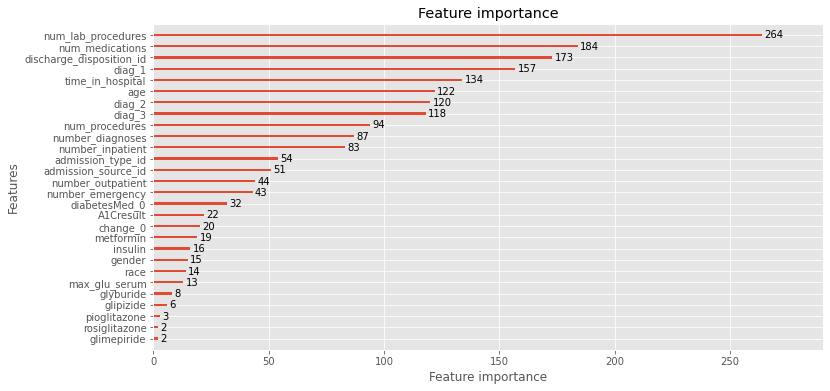

In [275]:
plot_importance(diab_gridcv_lgb)

### Feature Importance & Mutual Info - DR LGB

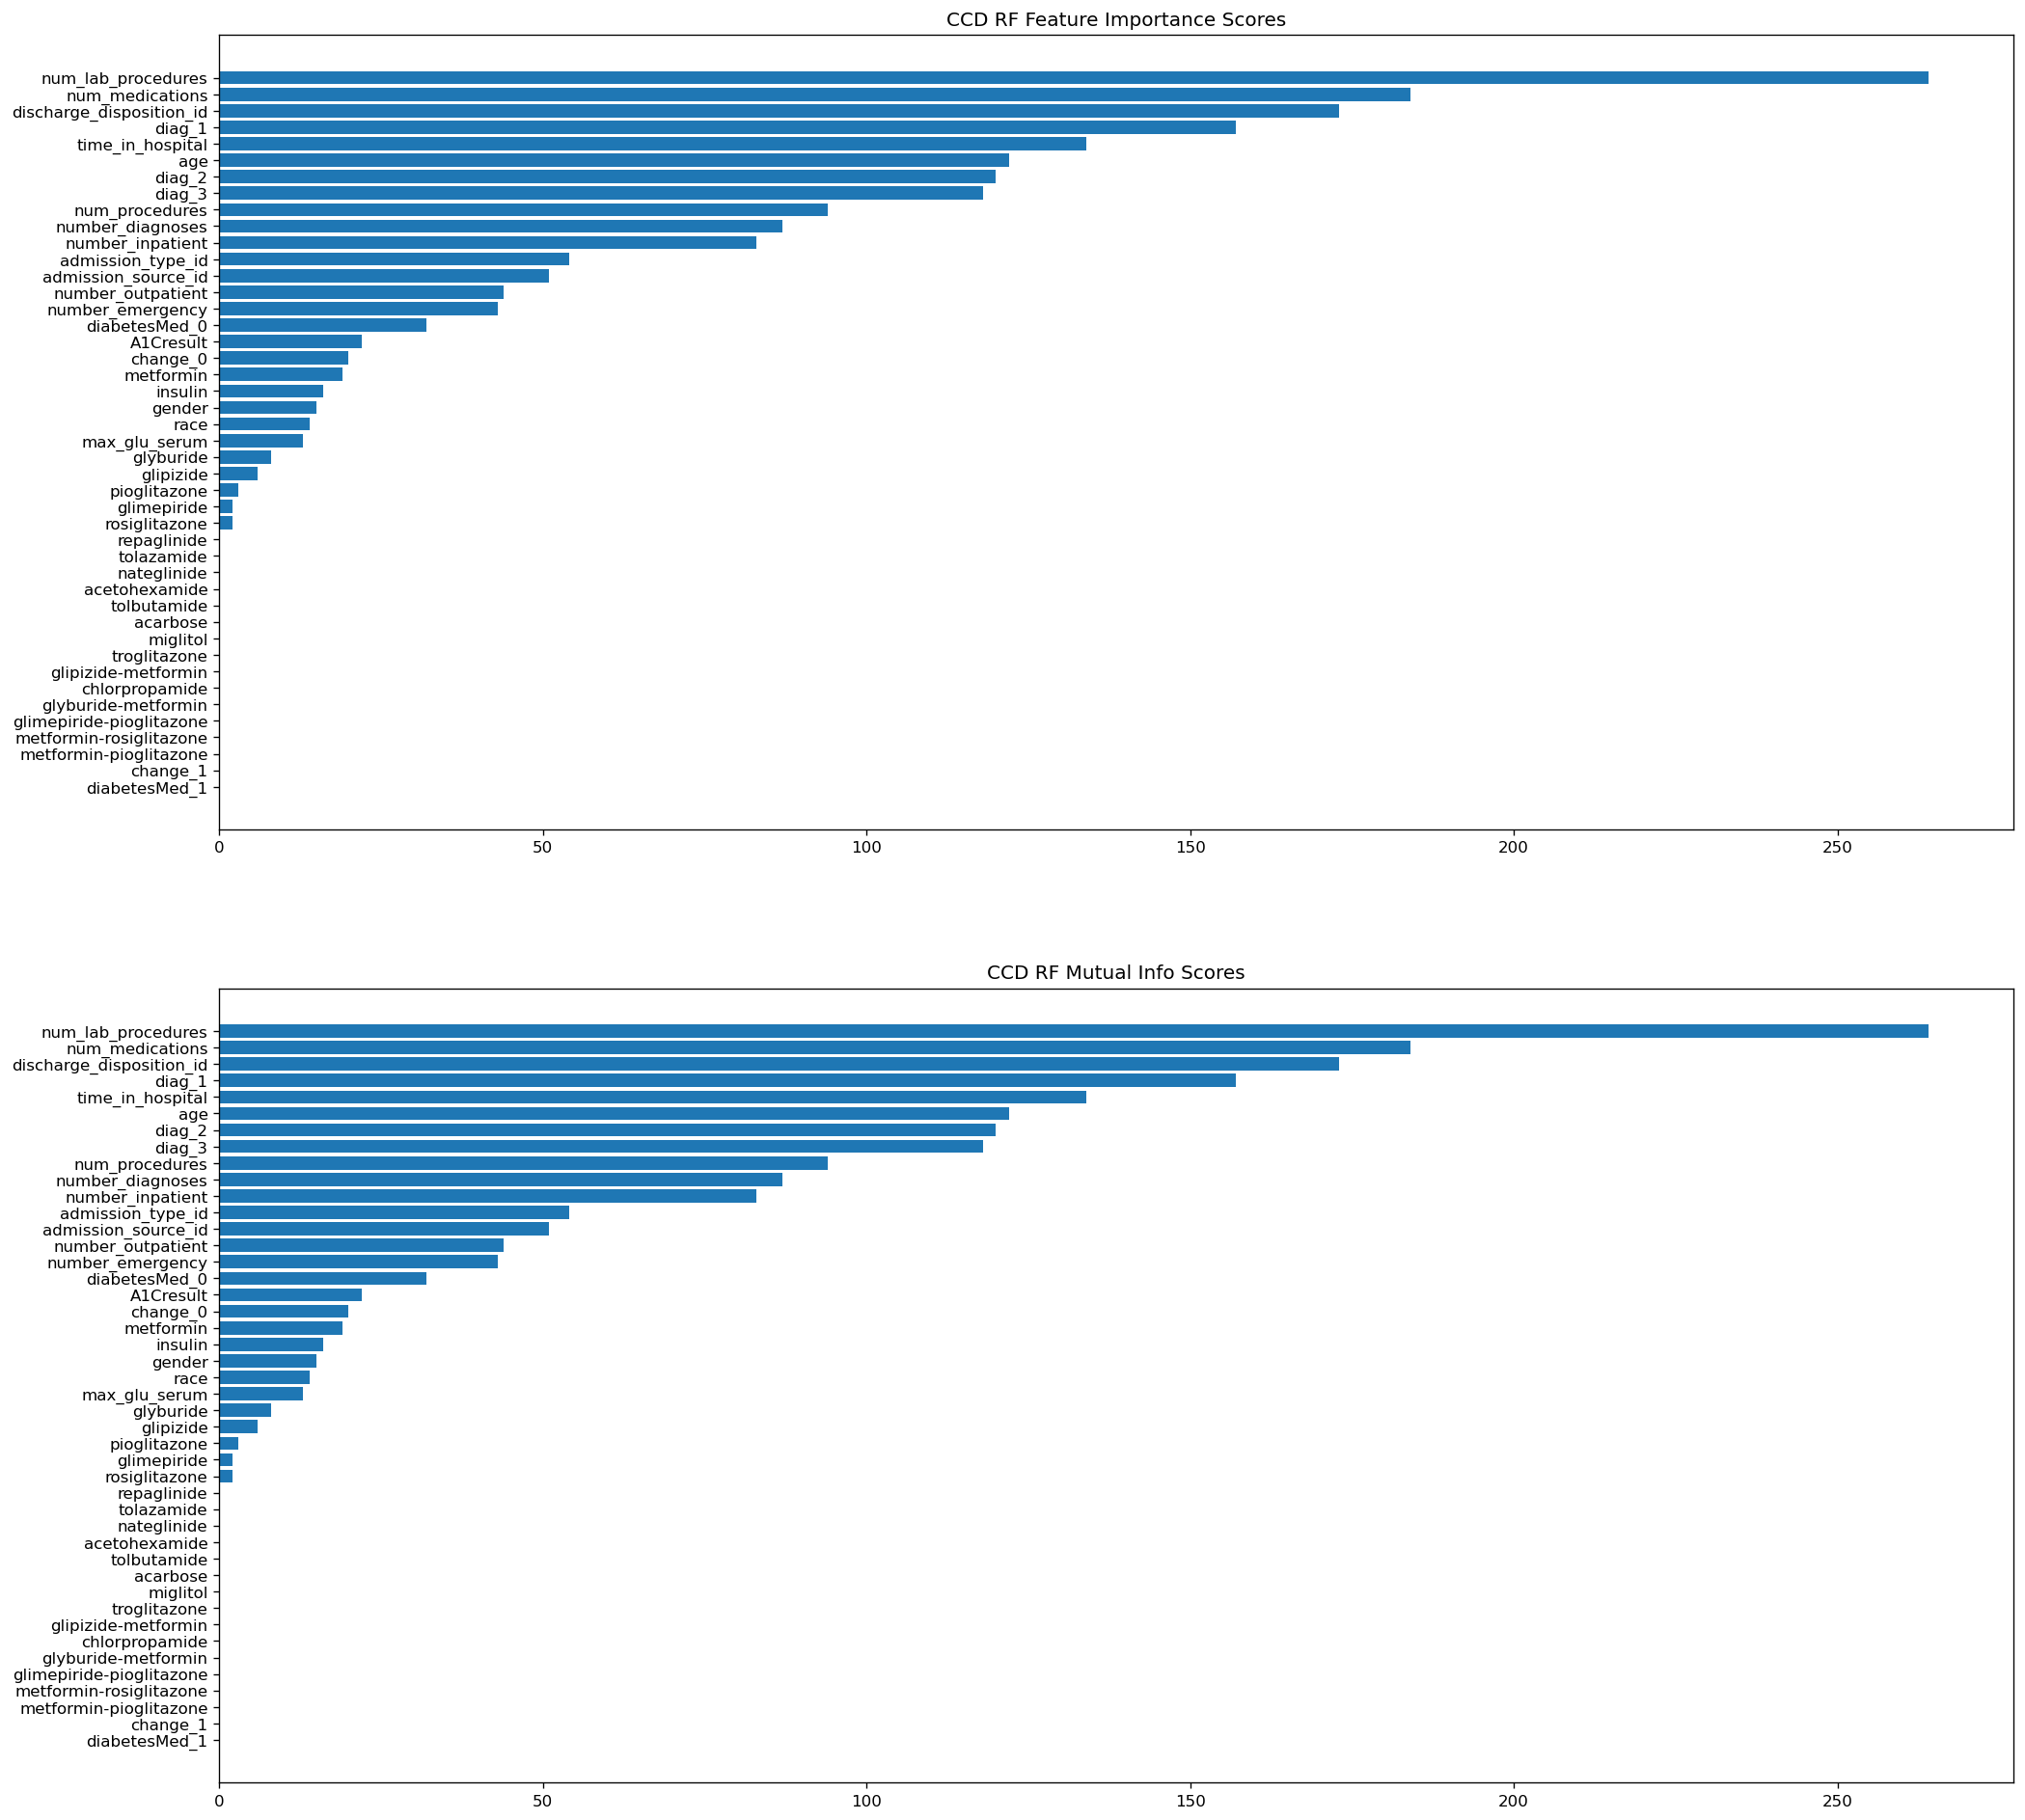

In [135]:
FI_diab_lgbm = pd.Series(diab_gridcv_lgb.feature_importances_, index = Xtrain_diab.columns).sort_values(ascending = False)
MI_diab_lgbm = mutual_info_classif(Xtrain_diab, ytrain_diab, discrete_features=Xtrain_diab.dtypes == int)
MI_diab_lgbm = pd.Series(MI_diab_lgbm, name='MI Scores', index=Xtrain_diab.columns).sort_values(ascending = False)

figure(figsize=(20,20), dpi = 120)
plt.subplot(2,1,1)
plt.title("CCD RF Feature Importance Scores")
plot_scores(FI_diab_lgbm)

plt.subplot(2,1,2)
plt.title("CCD RF Mutual Info Scores")
plot_scores(FI_diab_lgbm)

plt.show()

### Performance across Label - DR LGB

In [162]:
predict_diab_lgb = diab_gridcv_lgb.predict(Xtest_diab)
y_diab_lgb = (pd.DataFrame(predict_diab_lgb, columns = ['readmitted'])).copy()
diab_lgb = Xtest_diab.join(y_diab_lgb)

#### Label = 0

In [164]:
diab_lgb_0 = diab_lgb[diab_lgb['readmitted'] == 0.0]
diab_lgb_0.describe().T

count       mean        std   min   25%   50%  \
race                      2355.0   0.324841   0.668663   0.0   0.0   0.0   
gender                    2355.0   0.534607   0.498907   0.0   0.0   1.0   
age                       2355.0   5.763482   1.710736   0.0   5.0   6.0   
admission_type_id         2355.0   2.328662   1.730777   1.0   1.0   2.0   
discharge_disposition_id  2355.0   5.736730   7.222486   1.0   1.0   1.0   
admission_source_id       2355.0   6.680255   4.984779   1.0   2.0   7.0   
time_in_hospital          2355.0   4.816136   3.237773   1.0   2.0   4.0   
num_lab_procedures        2355.0  45.414862  18.257663   1.0  34.0  46.0   
num_procedures            2355.0   1.442463   1.748036   0.0   0.0   1.0   
num_medications           2355.0  15.244161   8.313592   1.0  10.0  14.0   
number_outpatient         2355.0   0.123142   0.602420   0.0   0.0   0.0   
number_emergency          2355.0   0.056900   0.384699   0.0   0.0   0.0   
number_inpatient          2355.0   0.584289   1.140514   0.0   0.0   0.0   
diag_1                    2355.0   4.339278   3.653417   0.0   0.0   4.0   
diag_2                    2355.0   4.191507   3.753029   0.0   0.0   3.0   
diag_3                    2355.0   4.210616   3.678656   0.0   0.0   3.0   
number_diagnoses          2355.0   6.707431   2.066998   1.0   5.0   7.0   
max_glu_serum             2355.0 -89.405096  29.384059 -99.0 -99.0 -99.0   
A1Cresult                 2355.0 -79.760934  39.377098 -99.0 -99.0 -99.0   
metformin                 2355.0   0.190658   0.392904   0.0   0.0   0.0   
repaglinide               2355.0   0.008917   0.094029   0.0   0.0   0.0   
nateglinide               2355.0   0.001274   0.035676   0.0   0.0   0.0   
chlorpropamide            2355.0   0.002548   0.050422   0.0   0.0   0.0   
glimepiride               2355.0   0.038217   0.191759   0.0   0.0   0.0   
acetohexamide             2355.0   0.000000   0.000000   0.0   0.0   0.0   
glipizide                 2355.0   0.126964   0.333003   0.0   0.0   0.0   
glyburide                 2355.0   0.157113   0.363984   0.0   0.0   0.0   
tolbutamide               2355.0   0.000849   0.029136   0.0   0.0   0.0   
pioglitazone              2355.0   0.039915   0.195801   0.0   0.0   0.0   
rosiglitazone             2355.0   0.059873   0.237301   0.0   0.0   0.0   
acarbose                  2355.0   0.003822   0.061714   0.0   0.0   0.0   
miglitol                  2355.0   0.000000   0.000000   0.0   0.0   0.0   
troglitazone              2355.0   0.000425   0.020607   0.0   0.0   0.0   
tolazamide                2355.0   0.001274   0.035676   0.0   0.0   0.0   
insulin                   2355.0   0.447134   0.497303   0.0   0.0   0.0   
glyburide-metformin       2355.0   0.000425   0.020607   0.0   0.0   0.0   
glipizide-metformin       2355.0   0.000000   0.000000   0.0   0.0   0.0   
glimepiride-pioglitazone  2355.0   0.000000   0.000000   0.0   0.0   0.0   
metformin-rosiglitazone   2355.0   0.000000   0.000000   0.0   0.0   0.0   
metformin-pioglitazone    2355.0   0.000000   0.000000   0.0   0.0   0.0   
change_0                  2355.0   0.626752   0.483770   0.0   0.0   1.0   
change_1                  2355.0   0.373248   0.483770   0.0   0.0   0.0   
diabetesMed_0             2355.0   0.253503   0.435109   0.0   0.0   0.0   
diabetesMed_1             2355.0   0.746497   0.435109   0.0   0.0   1.0   
readmitted                2355.0   0.000000   0.000000   0.0   0.0   0.0   

                           75%    max  
race                       1.0    4.0  
gender                     1.0    1.0  
age                        7.0    9.0  
admission_type_id          3.0    8.0  
discharge_disposition_id   6.0   25.0  
admission_source_id        7.0   20.0  
time_in_hospital           7.0   14.0  
num_lab_procedures        58.0  111.0  
num_procedures             2.0    6.0  
num_medications           19.0   62.0  
number_outpatient          0.0   12.0  
number_emergency           0.0    7.0  
number_inp

### Label = 1

In [165]:
diab_lgb_1 = diab_lgb[diab_lgb['readmitted'] == 1.0]
diab_lgb_1.describe().T

count       mean        std   min   25%   50%  \
race                      1553.0   0.320026   0.644139   0.0   0.0   0.0   
gender                    1553.0   0.535093   0.498928   0.0   0.0   1.0   
age                       1553.0   5.792659   1.692014   0.0   5.0   6.0   
admission_type_id         1553.0   2.321314   1.752514   1.0   1.0   1.0   
discharge_disposition_id  1553.0   6.336124   7.651921   1.0   1.0   1.0   
admission_source_id       1553.0   6.660013   4.925900   1.0   2.0   7.0   
time_in_hospital          1553.0   4.745654   3.128532   1.0   2.0   4.0   
num_lab_procedures        1553.0  45.956858  18.314937   1.0  34.0  47.0   
num_procedures            1553.0   1.485512   1.792367   0.0   0.0   1.0   
num_medications           1553.0  15.359305   8.361420   1.0  10.0  14.0   
number_outpatient         1553.0   0.116549   0.680123   0.0   0.0   0.0   
number_emergency          1553.0   0.070187   0.478500   0.0   0.0   0.0   
number_inpatient          1553.0   0.574372   1.176351   0.0   0.0   0.0   
diag_1                    1553.0   4.137154   3.729220   0.0   0.0   4.0   
diag_2                    1553.0   3.972312   3.751100   0.0   0.0   3.0   
diag_3                    1553.0   4.200901   3.700386   0.0   0.0   3.0   
number_diagnoses          1553.0   6.743078   2.049404   1.0   5.0   7.0   
max_glu_serum             1553.0 -89.136510  29.738910 -99.0 -99.0 -99.0   
A1Cresult                 1553.0 -79.269156  39.763034 -99.0 -99.0 -99.0   
metformin                 1553.0   0.179652   0.384021   0.0   0.0   0.0   
repaglinide               1553.0   0.009659   0.097835   0.0   0.0   0.0   
nateglinide               1553.0   0.001932   0.043923   0.0   0.0   0.0   
chlorpropamide            1553.0   0.001288   0.035875   0.0   0.0   0.0   
glimepiride               1553.0   0.025757   0.158459   0.0   0.0   0.0   
acetohexamide             1553.0   0.000000   0.000000   0.0   0.0   0.0   
glipizide                 1553.0   0.130715   0.337197   0.0   0.0   0.0   
glyburide                 1553.0   0.169350   0.375181   0.0   0.0   0.0   
tolbutamide               1553.0   0.000000   0.000000   0.0   0.0   0.0   
pioglitazone              1553.0   0.039923   0.195841   0.0   0.0   0.0   
rosiglitazone             1553.0   0.066967   0.250046   0.0   0.0   0.0   
acarbose                  1553.0   0.003863   0.062057   0.0   0.0   0.0   
miglitol                  1553.0   0.000000   0.000000   0.0   0.0   0.0   
troglitazone              1553.0   0.000000   0.000000   0.0   0.0   0.0   
tolazamide                1553.0   0.000644   0.025375   0.0   0.0   0.0   
insulin                   1553.0   0.452028   0.497854   0.0   0.0   0.0   
glyburide-metformin       1553.0   0.000644   0.025375   0.0   0.0   0.0   
glipizide-metformin       1553.0   0.000000   0.000000   0.0   0.0   0.0   
glimepiride-pioglitazone  1553.0   0.000000   0.000000   0.0   0.0   0.0   
metformin-rosiglitazone   1553.0   0.000000   0.000000   0.0   0.0   0.0   
metformin-pioglitazone    1553.0   0.000000   0.000000   0.0   0.0   0.0   
change_0                  1553.0   0.603348   0.489360   0.0   0.0   1.0   
change_1                  1553.0   0.396652   0.489360   0.0   0.0   0.0   
diabetesMed_0             1553.0   0.257566   0.437435   0.0   0.0   0.0   
diabetesMed_1             1553.0   0.742434   0.437435   0.0   0.0   1.0   
readmitted                1553.0   1.000000   0.000000   1.0   1.0   1.0   

                           75%   max  
race                       1.0   4.0  
gender                     1.0   1.0  
age                        7.0   9.0  
admission_type_id          3.0   8.0  
discharge_disposition_id   7.0  25.0  
admission_source_id        7.0  20.0  
time_in_hospital           6.0  14.0  
num_lab_procedures        59.0  95.0  
num_procedures             2.0   6.0  
num_medications           19.0  63.0  
number_outpatient          0.0  15.0  
number_emergency           0.0   9.0  
number_inpatient       

### FairML - DR LGB

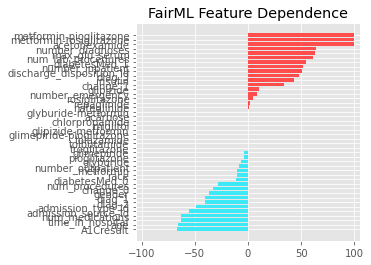

In [214]:
total, _ = audit_model(diab_gridcv_lgb.predict, Xtest_diab)

fig = plot_dependencies(
    total.median(),
    reverse_values=False,
    title="FairML Feature Dependence")
plt.show()

### LIME - DR LGB

In [176]:
predict_dr_lgb = lambda x: diab_gridcv_lgb.predict_proba(x).astype(float)
X = Xtrain_diab.values
dr_lgb_explainer = lime_tabular.LimeTabularExplainer(X, feature_names = Xtrain_diab.columns.tolist(), class_names=['Admitted','Not Admitted'], kernel_width=5)

In [177]:
chosen_inst = Xtest_diab.iloc[[500]].values[0]
dr_lgb_exp = dr_lgb_explainer.explain_instance(chosen_inst, predict_dr_lgb, num_features = 10)
dr_lgb_exp.show_in_notebook(show_all=False)